In [2]:
import glob
import pandas as pd

In [3]:
t1t2 = glob.glob("./data_T1_T2_201909/*")

In [4]:
sorted(t1t2)

['./data_T1_T2_201909/sub-NDARINV003RTV85_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV007W6H7B_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00BD7VDC_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00CY2MDM_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00HEV6HB_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00J52GPG_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00LH735Y_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00LJVZK2_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00NPMHND_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00R4TXET_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00U4FTRU_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00UMK5VC_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV00X2TBWJ_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV010ZM3H9_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV014RTM1V_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV0182J779_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV0191C80U_T1.nii.gz',
 './data_T1_T2_201909/sub-NDARINV019DXLU4_T1.nii.gz',
 './data_T1_T2_201909/sub-ND

In [5]:
dti = glob.glob("./data_DTI_tensor/*")

In [7]:
len(dti)

53162

In [7]:
sorted(dti)

['./data_DTI_tensor/sub-NDARINV003RTV85_DTI_tensor_mr_DTI_AD.nii.gz',
 './data_DTI_tensor/sub-NDARINV003RTV85_DTI_tensor_mr_DTI_FA.nii.gz',
 './data_DTI_tensor/sub-NDARINV003RTV85_DTI_tensor_mr_DTI_MD.nii.gz',
 './data_DTI_tensor/sub-NDARINV003RTV85_DTI_tensor_mr_DTI_RD.nii.gz',
 './data_DTI_tensor/sub-NDARINV003RTV85_WM_FODs_upsample125_norm_peaks3.nii.gz',
 './data_DTI_tensor/sub-NDARINV007W6H7B_DTI_tensor_mr_DTI_AD.nii.gz',
 './data_DTI_tensor/sub-NDARINV007W6H7B_DTI_tensor_mr_DTI_FA.nii.gz',
 './data_DTI_tensor/sub-NDARINV007W6H7B_DTI_tensor_mr_DTI_MD.nii.gz',
 './data_DTI_tensor/sub-NDARINV007W6H7B_DTI_tensor_mr_DTI_RD.nii.gz',
 './data_DTI_tensor/sub-NDARINV007W6H7B_WM_FODs_upsample125_norm_peaks3.nii.gz',
 './data_DTI_tensor/sub-NDARINV00BD7VDC_DTI_tensor_mr_DTI_AD.nii.gz',
 './data_DTI_tensor/sub-NDARINV00BD7VDC_DTI_tensor_mr_DTI_FA.nii.gz',
 './data_DTI_tensor/sub-NDARINV00BD7VDC_DTI_tensor_mr_DTI_MD.nii.gz',
 './data_DTI_tensor/sub-NDARINV00BD7VDC_DTI_tensor_mr_DTI_RD.nii.gz'

In [8]:
def extract_subject_id(text):
    text_split = text.split('sub-')[1]
    text_split = text_split.split('_', 1)
    return(text_split)

In [9]:
idsall = [extract_subject_id(x) for x in dti] + [extract_subject_id(x) for x in t1t2]

In [10]:
df = pd.DataFrame(idsall)
df.columns = ['id', 'filetype']

In [13]:
df.to_csv('all_ids_filetypes.csv')

In [14]:
t1_subsampled = glob.glob("./data_T1_lowerres/*")

In [15]:
t2_subsampled = glob.glob("./data_T2_lowerres/*")

In [19]:
pd.DataFrame([extract_subject_id(x) for x in t1_subsampled]).to_csv('t1_subsampled.csv')

In [20]:
pd.DataFrame([extract_subject_id(x) for x in t2_subsampled]).to_csv('t2_subsampled.csv')

In [11]:
df_grouped = df.groupby(['id']).count().reset_index()

In [12]:
df.groupby(['filetype']).count().reset_index()

,filetype,id
0,DTI_tensor_mr_DTI_AD.nii.gz,10638
1,DTI_tensor_mr_DTI_FA.nii.gz,10638
2,DTI_tensor_mr_DTI_MD.nii.gz,10638
3,DTI_tensor_mr_DTI_RD.nii.gz,10638
4,T1.nii.gz,11373
5,T2.nii.gz,9825
6,WM_FODs_upsample125_norm_peaks3.nii.gz,10610


In [13]:
df_grouped_grouped = df_grouped.groupby(['filetype']).count().reset_index()
df_grouped_grouped

,filetype,id
0,1,329
1,2,428
2,4,19
3,5,8
4,6,1218
5,7,9393


In [74]:
df_grouped.sort_values('filetype', ascending=False).to_csv('subject_files.csv')

In [26]:
def get_filenames(sub, t1t2, dti):
    return([x for x in t1t2 if sub in x] + [x for x in dti if sub in x])

In [52]:
filenames = get_filenames('NDARINVL7ZXH7GM', t1t2, dti)

In [53]:
import nibabel as nib
import numpy as np
import glob

import matplotlib.pyplot as plt

In [54]:
for file in filenames:
    img = nib.load(file)
    data = np.array(img.dataobj)
    print(file)
    print(data.shape)

./data_T1_T2_201909/sub-NDARINVL7ZXH7GM_T1.nii.gz
(256, 256, 256)
./data_T1_T2_201909/sub-NDARINVL7ZXH7GM_T2.nii.gz
(256, 256, 256)
./data_DTI_tensor/sub-NDARINVL7ZXH7GM_DTI_tensor_mr_DTI_FA.nii.gz
(190, 190, 190)
./data_DTI_tensor/sub-NDARINVL7ZXH7GM_DTI_tensor_mr_DTI_AD.nii.gz
(190, 190, 190)
./data_DTI_tensor/sub-NDARINVL7ZXH7GM_DTI_tensor_mr_DTI_MD.nii.gz
(190, 190, 190)
./data_DTI_tensor/sub-NDARINVL7ZXH7GM_DTI_tensor_mr_DTI_RD.nii.gz
(190, 190, 190)
./data_DTI_tensor/sub-NDARINVL7ZXH7GM_WM_FODs_upsample125_norm_peaks3.nii.gz
(190, 190, 190, 9)


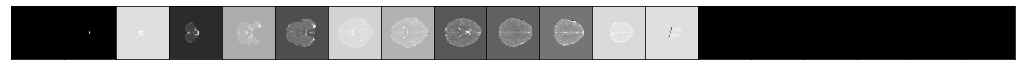

In [62]:
step = 10
n_slices = int(190/10)
n_examples = 1

filename = './data_DTI_tensor/sub-NDARINVFYPMHB9X_DTI_tensor_mr_DTI_RD.nii.gz'
fig, ax = plt.subplots(1, n_slices, figsize=[18, 1.2*n_examples])

img = nib.load(filename)
data = np.array(img.dataobj)
data.shape
n = 0
slice = 0
i = 1
for _ in range(n_slices):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    if i == 0:
        ax[n].set_title(str(slice), color='r')
    else:
        ax[n].set_title('', color='r')
    n += 1
    slice += step

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

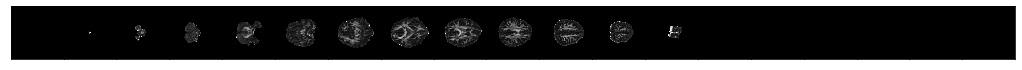

In [56]:
step = 10
n_slices = int(190/10)
n_examples = 1

filename = './data_DTI_tensor/sub-NDARINVFYPMHB9X_DTI_tensor_mr_DTI_FA.nii.gz'
fig, ax = plt.subplots(1, n_slices, figsize=[18, 1.2*n_examples])

img = nib.load(filename)
data = np.array(img.dataobj)
data.shape
n = 0
slice = 0
i = 1
for _ in range(n_slices):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    if i == 0:
        ax[n].set_title(str(slice), color='r')
    else:
        ax[n].set_title('', color='r')
    n += 1
    slice += step

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

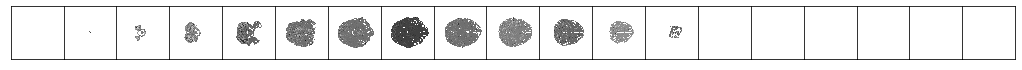

In [73]:
step = 10
n_slices = int(190/10)
n_examples = 1

filename = './data_DTI_tensor/sub-NDARINVFYPMHB9X_WM_FODs_upsample125_norm_peaks3.nii.gz'
fig, ax = plt.subplots(1, n_slices, figsize=[18, 1.2*n_examples])

img = nib.load(filename)
data = np.array(img.dataobj)
data.shape
n = 0
slice = 0
i = 1
for _ in range(n_slices):
    ax[n].imshow(data[:, :, slice, 8], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    if i == 0:
        ax[n].set_title(str(slice), color='r')
    else:
        ax[n].set_title('', color='r')
    n += 1
    slice += step

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

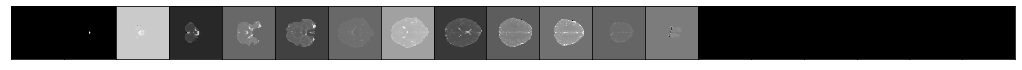

In [58]:
step = 10
n_slices = int(190/10)
n_examples = 1

filename = './data_DTI_tensor/sub-NDARINVFYPMHB9X_DTI_tensor_mr_DTI_MD.nii.gz'
fig, ax = plt.subplots(1, n_slices, figsize=[18, 1.2*n_examples])

img = nib.load(filename)
data = np.array(img.dataobj)
data.shape
n = 0
slice = 0
i = 1
for _ in range(n_slices):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    if i == 0:
        ax[n].set_title(str(slice), color='r')
    else:
        ax[n].set_title('', color='r')
    n += 1
    slice += step

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

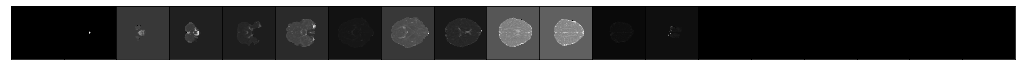

In [59]:
step = 10
n_slices = int(190/10)
n_examples = 1

filename = './data_DTI_tensor/sub-NDARINVFYPMHB9X_DTI_tensor_mr_DTI_AD.nii.gz'
fig, ax = plt.subplots(1, n_slices, figsize=[18, 1.2*n_examples])

img = nib.load(filename)
data = np.array(img.dataobj)
data.shape
n = 0
slice = 0
i = 1
for _ in range(n_slices):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    if i == 0:
        ax[n].set_title(str(slice), color='r')
    else:
        ax[n].set_title('', color='r')
    n += 1
    slice += step

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

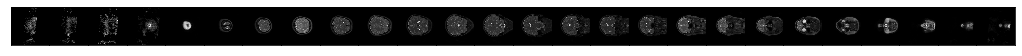

In [64]:
step = 10
n_slices = int(260/10)
n_examples = 1

filename = './data_T1_T2_201909/sub-NDARINVFYPMHB9X_T2.nii.gz'
fig, ax = plt.subplots(1, n_slices, figsize=[18, 1.2*n_examples])

img = nib.load(filename)
data = np.array(img.dataobj)
data.shape
n = 0
slice = 0
i = 1
for _ in range(n_slices):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    if i == 0:
        ax[n].set_title(str(slice), color='r')
    else:
        ax[n].set_title('', color='r')
    n += 1
    slice += step

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

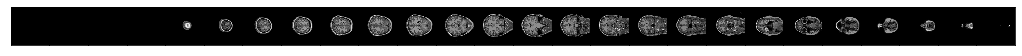

In [61]:
step = 10
n_slices = int(260/10)
n_examples = 1

filename = './data_T1_T2_201909/sub-NDARINVFYPMHB9X_T1.nii.gz'
fig, ax = plt.subplots(1, n_slices, figsize=[18, 1.2*n_examples])

img = nib.load(filename)
data = np.array(img.dataobj)
data.shape
n = 0
slice = 0
i = 1
for _ in range(n_slices):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    if i == 0:
        ax[n].set_title(str(slice), color='r')
    else:
        ax[n].set_title('', color='r')
    n += 1
    slice += step

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [21]:
subjects = ['NDARINVAED2T8J0',
'NDARINVR268FVXE',
'NDARINV8F2LUFUR',
'NDARINVA6PN17HD',
'NDARINVJH22CRH8',
'NDARINV2JRRX50R',
'NDARINV1K1285TU',
'NDARINVHYGVPZZX',
'NDARINVGV7AT23A',
'NDARINVKFU5W0JJ',
'NDARINV73VBCJUJ',
'NDARINVN1VPLV83',
'NDARINVWRCZDDAY',
'NDARINV84AEJJN9',
'NDARINVMUJR2Y8Y',
'NDARINV1P46E6AP',
'NDARINVHJDFAMYD',
'NDARINVWF7C1DEL',
'NDARINVUL9WW7ET',
'NDARINVBMKV8MN1',
'NDARINVRRUM0E9U',
'NDARINVYXVML8U8',
'NDARINV51VNYKL7',
'NDARINVTELF8WZW',
'NDARINVJU3HYU5L',
'NDARINVUYZD19PV',
'NDARINV86X5Z1TX',
'NDARINV9Y43MGV3',
'NDARINV8TYGH2JB',
'NDARINV7ZEYLEV6',
'NDARINVAN0BA3ZM',
'NDARINVE6ECWB2T',
'NDARINV25ANBT4A',
'NDARINVEL2DU62H',
'NDARINVBMFRB748',
'NDARINVDX53W9GM',
'NDARINVJKFPZ3RV',
'NDARINVKXJ9P10B',
'NDARINVDCRLF3FV',
'NDARINVK5PEZ25W',
'NDARINVK7641TXT',
'NDARINVX5JNFW1C',
'NDARINVZLP46GRP',
'NDARINVM8P79888',
'NDARINVBB7E1VW5',
'NDARINVLKF7L58W',
'NDARINV1R4KE1UN',
'NDARINV0NR55WME',
'NDARINVNLN4DGBT',
'NDARINVNZ57LLN6',
'NDARINVGWG4RUR9',
'NDARINV47N6G712',
'NDARINV2KA8EUUR',
'NDARINVCJ5UYUBX',
'NDARINVVLP88ED7',
'NDARINVH83KP4EM',
'NDARINVXUHXEJTR',
'NDARINVTWB035Y1',
'NDARINVKKY0ZZXD',
'NDARINVPE6W1Y3P',
'NDARINVH13A9F8Y',
'NDARINVLVJNK52B',
'NDARINVD9ZEJ36L',
'NDARINVVWH7ZJJR',
'NDARINV9ACM4FBA',
'NDARINVK0AGJP6T',
'NDARINVR9ACLAJX',
'NDARINVBT1JM1WA',
'NDARINVU103BUTM',
'NDARINV7U8TPCF1',
'NDARINV1NJVJ6VN',
'NDARINVGN73K7M2',
'NDARINVRFGCXLTN',
'NDARINVHEM6RAEH',
'NDARINVXR9J4J3Y',
'NDARINVGM7YJH08',
'NDARINVZXF5C635',
'NDARINVE5K3E4XA',
'NDARINVZD57Y0V7',
'NDARINV1LMYDNRY',
'NDARINV7P9PRTBA',
'NDARINV9Z5XDTG9',
'NDARINVG0E0L3HV',
'NDARINV3H54D8DK',
'NDARINVMHDDJ00W',
'NDARINV5JE05DJK',
'NDARINVAG3VM3CR',
'NDARINVT61FZXTW',
'NDARINVPRDYVE4C',
'NDARINV355PUM5E',
'NDARINVT5FHG38C',
'NDARINVRN93HUJE',
'NDARINV8V5WVRJ3',
'NDARINVLKEDD3PV',
'NDARINVKTMZN9M9',
'NDARINVUFJX48LE',
'NDARINVK0RATU99',
'NDARINVY2WV0MYN',
'NDARINVETR322Y3',
'NDARINV5P7MAKXF',
'NDARINV7N9P7K46',
'NDARINVRMV0P0FV',
'NDARINV8JAU83XJ',
'NDARINVDPMB558X',
'NDARINVUXWUN73X',
'NDARINVE2755CEH',
'NDARINVEGER8LYM',
'NDARINVW4HWHZAF',
'NDARINVXZ3MMX6M',
'NDARINVFP7WAK5D',
'NDARINV145EPB4G',
'NDARINV5FBJ0AJ1',
'NDARINVEH51X272',
'NDARINVV381L7JK',
'NDARINVANZ68BY0',
'NDARINVBZ0JV1FF',
'NDARINVR3GH8J7X',
'NDARINVFRT7F0C9',
'NDARINVFP26FE4K',
'NDARINVZZ35KHXP',
'NDARINVKMNLLDKK',
'NDARINV8EJT0HF6',
'NDARINV3A7MX0D3',
'NDARINV2Y5DW30Z',
'NDARINVWDG85F4T',
'NDARINVZGLD1V00',
'NDARINVHNR4UJ6G',
'NDARINVB5VJ3KEG',
'NDARINVRLP5AH5E',
'NDARINVP0WKD3JY',
'NDARINV4CKYEHYL',
'NDARINV6FD78Z13',
'NDARINVYME882GP',
'NDARINVDCE53AYC',
'NDARINVJXT9LVJP',
'NDARINVC4GYKW12',
'NDARINV46B8VBDT',
'NDARINVEF5MBMJF',
'NDARINVH2LEDF77',
'NDARINV58VGXCL7',
'NDARINVVZ1LY5EP',
'NDARINVPWWHBBJV',
'NDARINVRLV2KEJP',
'NDARINV7L87171T',
'NDARINVUWTWYGD1',
'NDARINV2X9JB86Z',
'NDARINVBTCDDVU1',
'NDARINVJR7AD66J',
'NDARINVFJ2WR5PF',
'NDARINVTFJ2LGCD',
'NDARINVJJWR8W0W',
'NDARINVDHDLJ5CV',
'NDARINVLPXG0D4J',
'NDARINVLXC3WJW0',
'NDARINVV5WEC3Y1',
'NDARINVG86EJHZD',
'NDARINVR6V7FU8U',
'NDARINVV104HFJY',
'NDARINVXPZ66T25',
'NDARINVLMAAJ8JJ',
'NDARINVABT9X85F',
'NDARINVDGTRNE7V',
'NDARINVEBVE1NF9',
'NDARINV7DUJG7N2',
'NDARINVL34RDCRR',
'NDARINVGVJG7AME',
'NDARINVT4XN7N6T',
'NDARINVH8KHAFL7',
'NDARINV5MHT9RR4',
'NDARINVWNGRHP6V',
'NDARINV5HH9FDM1',
'NDARINVAX3TU7RA',
'NDARINVNDTCY532',
'NDARINVLPUBRVKK',
'NDARINV3P7CNL7H',
'NDARINVVKF7FYHA',
'NDARINV36KR4T19',
'NDARINVUHXC5TRD',
'NDARINVYNRJ8UU6',
'NDARINV4KMCR8NT',
'NDARINVJAGE8DBX',
'NDARINV8666P5JN',
'NDARINVERU8ZJKV',
'NDARINVA0KZT97H',
'NDARINV2ZJXDTEL',
'NDARINVRDJX9GRE',
'NDARINV5C6NT3K7',
'NDARINV57F63WRL',
'NDARINV6U1YT1NL',
'NDARINVR3ABLBEY',
'NDARINVVN0L0E6W',
'NDARINVYMMRDKJW',
'NDARINVX0UKVDWM',
'NDARINV9DV0865Y',
'NDARINV5ZKVPJ7T',
'NDARINV8DFF1UZ1',
'NDARINV3DL75W3B',
'NDARINV4Z96NDW1',
'NDARINV32CJUUBP',
'NDARINVBZZ8KWTC',
'NDARINVGMJ49GCH',
'NDARINVELW92005',
'NDARINVR8NY2TWV',
'NDARINV8VJ8LJ3D',
'NDARINVKJWLWK8U',
'NDARINVAZAEEXZ9',
'NDARINVYBXMBLAD',
'NDARINVEA2VND20',
'NDARINV37FTP2A7',
'NDARINVVBGCXHN4',
'NDARINVKB7UD17H',
'NDARINV0PRHUTZA',
'NDARINVJ8A4A9P2',
'NDARINVPFLHJ8G2',
'NDARINVGVMFM94R',
'NDARINVLG5EUWL6',
'NDARINVRR6R4P7W',
'NDARINVPV9BEEKH',
'NDARINVA1KXWA2W',
'NDARINVR2160CB7',
'NDARINVA9E5RPZH',
'NDARINV94N4B0N9',
'NDARINV1CGKKTM5',
'NDARINV2J3D85NJ',
'NDARINVUVP8NKL5',
'NDARINVYJDWCMJA',
'NDARINVL7HUA7J7',
'NDARINVLDK00HZG',
'NDARINV9PTH3VTR',
'NDARINVG6BPNLWU',
'NDARINVCVH6ELRF',
'NDARINVTT0YJG33',
'NDARINVAZL0KJME',
'NDARINVUKEHKCA6',
'NDARINVXBB6NT2L',
'NDARINVAP0L6AHN',
'NDARINVRF2ULZ5M',
'NDARINVGHL1WZCU',
'NDARINV7FC40YZ3',
'NDARINVY539E129',
'NDARINVVULYL2L9',
'NDARINVXMWLDC53',
'NDARINV7B2CAC25',
'NDARINVEPEE5V5J',
'NDARINV3PH1L2C3',
'NDARINV8H756ZWX',
'NDARINVJG3B0A5J',
'NDARINVP70KAX7U',
'NDARINVNTAR3TAF',
'NDARINV7FGBBTWL',
'NDARINVZLL8B2MA',
'NDARINV71N5JHR2',
'NDARINVNCEUKV27',
'NDARINV4Z38T1RY',
'NDARINVF6553H6E',
'NDARINVHPVL425U',
'NDARINVDA6VVDEG',
'NDARINVBDAMTERV',
'NDARINVD9LT4A11',
'NDARINVUWLUMMVY',
'NDARINVJPKAU189',
'NDARINVMHR6ZFBJ',
'NDARINVMZZT8FFB',
'NDARINVTZM2XE2H',
'NDARINVUKDUJYJH',
'NDARINVCZ5MFAJL',
'NDARINVN2MD051W',
'NDARINVFZC8ZGMR',
'NDARINVDPM9DWBB',
'NDARINVUB376762',
'NDARINVHC96P1XH',
'NDARINV0VF0JVNL',
'NDARINVTRGFZFT8',
'NDARINVPJP1641H',
'NDARINVDE17JJG5',
'NDARINV26AW8K7K',
'NDARINVC6Z9A3VP',
'NDARINV4PKFHBXH',
'NDARINV8HV180YG',
'NDARINV3R9J4MH0',
'NDARINVTAPZKUPL',
'NDARINVVZXGPU1H',
'NDARINVY0K5P3XF',
'NDARINV74B0CYN6',
'NDARINV3P7MECT8',
'NDARINVCZGRXUKT',
'NDARINVD7KE07MF',
'NDARINVYY5C98J4',
'NDARINV3ZPCUAK0',
'NDARINV6KZ6GTEJ',
'NDARINVP9P9YUVH',
'NDARINV3CLUDH6D',
'NDARINV8P2LE3UR',
'NDARINVLZEPNXZU',
'NDARINVFF0AUTMG',
'NDARINVX8PYAJ0A',
'NDARINVCYFCWE6X',
'NDARINVWVVCYC6W',
'NDARINVKU7P8BC5',
'NDARINVA06511K8',
'NDARINVEFZDW1ZR',
'NDARINVXPY9ELR7',
'NDARINVRGR9NG5T',
'NDARINVMXNTYPJU',
'NDARINVG1CR55JE',
'NDARINVMTVTFDC0',
'NDARINVAN03AH80',
'NDARINVA1CW8FGN',
'NDARINVFRW1F9MA',
'NDARINV47FFMT85',
'NDARINVX718NUYK',
'NDARINVXCLJFBW4',
'NDARINV8CBT9W65',
'NDARINVVCKR7V40',
'NDARINV1ZK55NV1',
'NDARINVMMRPRU94',
'NDARINV956TANLH',
'NDARINVX9N847R2',
'NDARINVMRTV76E4',
'NDARINV6DKE68K2',
'NDARINVN5HX249Z',
'NDARINVDT85NUFE',
'NDARINVMC1L92VA',
'NDARINVA0BVG0DF',
'NDARINVFPDZ4C13',
'NDARINV9GXYL3HL',
'NDARINVTTFR6F0H',
'NDARINVC76VKX00',
'NDARINVJGLXMGJ2',
'NDARINV66TNJAWV',
'NDARINVD9WZ5K8Y',
'NDARINVTTB355AR',
'NDARINVTXDDBHFX',
'NDARINV3TG667EC',
'NDARINVLZVJ5RNK',
'NDARINVXAAY5W2J',
'NDARINVP74XG4NJ',
'NDARINVU7UB0WTJ',
'NDARINVRGP7HTB4',
'NDARINVA067FHRN',
'NDARINVBUZ6HVF0',
'NDARINVX6MBE8T4',
'NDARINVGNBTJYEB',
'NDARINVAA78REX1',
'NDARINV5F61GNU7',
'NDARINV248BF2KE',
'NDARINVKGN17CBU',
'NDARINV6EJF2KCZ',
'NDARINV0U317B9P',
'NDARINVWY8VJ509',
'NDARINVANEX1Y2H',
'NDARINVAV4XUTD7',
'NDARINVYDMW8MYL',
'NDARINVK3DP06LU',
'NDARINVNGNVU013',
'NDARINVL456T3RZ',
'NDARINVD9BC5CUY',
'NDARINV95EC7CAZ',
'NDARINVJG2VGPZN',
'NDARINVVPNP73C4',
'NDARINVC29KYLLN',
'NDARINVW482U9L4',
'NDARINVR9AJ27WZ',
'NDARINV4TG8X5LW',
'NDARINVT3Z5YXE1',
'NDARINVPNJ3GVUY',
'NDARINVBWR1WXUG',
'NDARINVERNB4DT2',
'NDARINV1JWGJFFK',
'NDARINVNVZEHYV5',
'NDARINVGBTXFJC6',
'NDARINV2W7FBDN4',
'NDARINVX7GTH1Y9',
'NDARINV9JFKBC3X',
'NDARINVRGJHW57A',
'NDARINVM05MNA24',
'NDARINV824JDLTM',
'NDARINV7CBUV9AY',
'NDARINVXUKXXT12',
'NDARINV2E8R4820',
'NDARINV6V5YH922',
'NDARINVM1K9YXUG',
'NDARINVLABCHP1W',
'NDARINVZTEBGFLA',
'NDARINVKWKW8PLC',
'NDARINV9EFM2PFZ',
'NDARINV8KD4PFH7',
'NDARINVC2ZLETPN',
'NDARINVGGLZ1NPJ',
'NDARINV3B70AX8C',
'NDARINVUGP8FHFC',
'NDARINV0WELU60J',
'NDARINV7B7LHAU0',
'NDARINVURYDCKP1',
'NDARINV3JYXAP1H',
'NDARINVA9GJMD11',
'NDARINVG25GUYN2',
'NDARINVGFCRX7YW',
'NDARINV6PYRR639',
'NDARINV7W4K75L0',
'NDARINVUF706YA2',
'NDARINVHM08N3Y0',
'NDARINVLBK0GFNR',
'NDARINVDXEP8X66',
'NDARINV64EVZUTB',
'NDARINVLG9JZFNH',
'NDARINV2EENVRH9',
'NDARINV2V8997BF',
'NDARINVYJA9K9F8',
'NDARINVLBXNVNEW',
'NDARINVNWYV2A50',
'NDARINV5L7AU3X8',
'NDARINVUW2UNAF1',
'NDARINVY4HM7X4C',
'NDARINVXVT1UD9C',
'NDARINVT27UF3XK',
'NDARINVV6KFJX12',
'NDARINVJ16BUDG7',
'NDARINVP3748X5Y',
'NDARINVXVUGTFV5',
'NDARINVMMLVDCJH',
'NDARINVXKYUY7PR',
'NDARINVVH22P5KB',
'NDARINVMN4MAMYN',
'NDARINV3C0FHDGM',
'NDARINVWE23RAXV',
'NDARINVKKXA5H12',
'NDARINVJF85FC7L',
'NDARINV3MTFEAAU',
'NDARINV5Y3DK6GX',
'NDARINV2CL5C6NJ',
'NDARINVZNBBEXEJ',
'NDARINVE06V8Y23',
'NDARINVFEFFUF2J',
'NDARINVD8490T5J',
'NDARINVGE3NT7ZK',
'NDARINVD9L81NY5',
'NDARINVDBHYPZ31',
'NDARINVXTX68JRW',
'NDARINV185KY7W3',
'NDARINV3KCBT1UJ',
'NDARINVVRATUJUU',
'NDARINVF2KR1Y5T',
'NDARINVL0AE80Z3',
'NDARINV5TT0JL6Z',
'NDARINVZC6LB4FJ',
'NDARINVCP2K1NFW',
'NDARINV2XDH23JX',
'NDARINVM53DBA1M',
'NDARINVVAPJ5TBV',
'NDARINV2XGC3LN5',
'NDARINV1X8K8NC3',
'NDARINVDXVYN6W5',
'NDARINVJDXAJTX3',
'NDARINVA4GBE30B',
'NDARINV3BLPP0EZ',
'NDARINVYVPGALZD',
'NDARINV16FHYZYY',
'NDARINV82L824HF',
'NDARINVD32LCBUY',
'NDARINVW2CN6FA3',
'NDARINVU316NYRT',
'NDARINVB9VMNMMZ',
'NDARINVPZE8ABE3',
'NDARINV3VNNK2J3',
'NDARINV53BA6MNE',
'NDARINVNMJZEZRD',
'NDARINV4UZ5M3N6',
'NDARINV8M3DC6NP',
'NDARINVT5RV9MLG',
'NDARINV3J93N0EH',
'NDARINVBYRNRHA1',
'NDARINVUN80YW88',
'NDARINVT90P7NTW',
'NDARINVBC7FZ0GR',
'NDARINVYZGRYL84',
'NDARINVEY3GRANZ',
'NDARINVB9VLJHR0',
'NDARINVPC72NTBK',
'NDARINV67W1B7DK',
'NDARINV8ETUUHCN',
'NDARINV19GEFHUC',
'NDARINV0XDBADBW',
'NDARINVC9N11UXX',
'NDARINVWMBFRZWJ',
'NDARINV81J6U6L2',
'NDARINVAHREHU85',
'NDARINV3MANP3Y8',
'NDARINVJCAMAY91',
'NDARINVG3RUAU07',
'NDARINVHFVEFR9P',
'NDARINV792K6B34',
'NDARINVYG5DUTT0',
'NDARINVCKDH5018',
'NDARINV51ZUKMA3',
'NDARINVEGFEVU9N',
'NDARINVNZZPEY3P',
'NDARINVHDNWHYA8',
'NDARINVNHL7P38J',
'NDARINVNUKK77ZR',
'NDARINVRCE62M22',
'NDARINVE7CFEXUC',
'NDARINVN12PKFR0',
'NDARINVNT25VUY7',
'NDARINVF96WG0CG',
'NDARINV4ZMTGFKA',
'NDARINVJVZE8PZH',
'NDARINVC59Y1E3K',
'NDARINV2UWL3APY',
'NDARINV1AA2VG9C',
'NDARINV0UD3BJFR',
'NDARINVV7Z95HZ1',
'NDARINVKZE4Z6W0',
'NDARINVFLA7T3CM',
'NDARINV29P0F670',
'NDARINVC53FTV59',
'NDARINVMP5HZ1LF',
'NDARINVGXJCR6C7',
'NDARINVNB6EVP2A',
'NDARINVE39X2HV4',
'NDARINVF1585TVY',
'NDARINVY5VUA73W',
'NDARINV4X5HDK0F',
'NDARINVW3WR22PX',
'NDARINVCF5R0X98',
'NDARINVY8CBY4HN',
'NDARINVX6MC634B',
'NDARINV953WUR8C',
'NDARINVY6LMAW7B',
'NDARINVVT14CE3D',
'NDARINV320U3LPD',
'NDARINVWVE3Y12H',
'NDARINVX5L1CX2N',
'NDARINVNWMZAR95',
'NDARINVLDH3YU2R',
'NDARINVAUG6P848',
'NDARINVCVNFXR7V',
'NDARINVH7TVMCPN',
'NDARINVZ6950R7M',
'NDARINV804KTLAN',
'NDARINVHXZMX9JF',
'NDARINVXPLRAK5R',
'NDARINV86PXMUHA',
'NDARINVV0E701P6',
'NDARINVM278A3KW',
'NDARINVP264KPEY',
'NDARINVFBD5A7P9',
'NDARINVJM8AD5VX',
'NDARINVH2K4DCJF',
'NDARINVLGBWLRM4',
'NDARINVEKRGXJZ0',
'NDARINVD8N6RPYP',
'NDARINVA9CA7RPB',
'NDARINVDTWEMX2Z',
'NDARINVEY7BLH33',
'NDARINVMKJWRTG8',
'NDARINVTLEM4F9A',
'NDARINVD5P9PY9L',
'NDARINVN542D50W',
'NDARINVA3G711KJ',
'NDARINVMZ0E548E',
'NDARINV43M1L7PL',
'NDARINV5YHWBYRD',
'NDARINVMP1NHUFC',
'NDARINVBXK5N7Y1',
'NDARINV2GAAH0E9',
'NDARINVVRX7WTKX',
'NDARINVJFTB00J2',
'NDARINVFX6XRA82',
'NDARINVDWRFW2TP',
'NDARINVCGNRE8LG',
'NDARINV6BN8ZZN1',
'NDARINV1FW43D9V',
'NDARINVDVEWNJZ1',
'NDARINVACWHYYFT',
'NDARINVFTL7AL99',
'NDARINVFZ8BBNJK',
'NDARINVXN6HMGK8',
'NDARINVDGP7217P',
'NDARINV2V1TRPDR',
'NDARINVMUG9M7P1',
'NDARINVVB6CJP4C',
'NDARINVKJKYNK5V',
'NDARINVBG7ZM9D2',
'NDARINV58XVZFMC',
'NDARINV4YL383FF',
'NDARINVMF0LLWMJ',
'NDARINVXUPMEDT7',
'NDARINVH3V52378',
'NDARINV5MP2XXGP',
'NDARINVCJW0RAFP',
'NDARINVJKBDRF1B',
'NDARINVMUG529LW',
'NDARINVCUTYZFH7',
'NDARINV7ZM9YYTN',
'NDARINVV9BM1RB5',
'NDARINVVWYK9ZMX',
'NDARINVURPDWTVH',
'NDARINVXUAL3R9B',
'NDARINVKLBUDEGD',
'NDARINV8TWGX6LF',
'NDARINVB9PWRAUA',
'NDARINVYLR06LF1',
'NDARINVE2PWTA4F',
'NDARINVAR90UWGC',
'NDARINVA1A2WJG5',
'NDARINV3072CP0C',
'NDARINVAWR7CA19',
'NDARINV4JV61LZE',
'NDARINV91EWHTJ4',
'NDARINV2547FH92',
'NDARINV4PYRUPX6',
'NDARINVHPDP068K',
'NDARINVPKBPM221',
'NDARINV0WAF57A4',
'NDARINVHD5LEW4G',
'NDARINVWG4ZLXZY',
'NDARINVB1T0LLC8',
'NDARINVH5LXH4TB',
'NDARINV915YKBPY',
'NDARINV6N1XNYN7',
'NDARINVHRZ430EB',
'NDARINVW01VXPJ7',
'NDARINVKBGNJEVP',
'NDARINV6JAHU3DT',
'NDARINVZPRTF377',
'NDARINV90RDFNXK',
'NDARINV8VY66V2D',
'NDARINVU100FWU2',
'NDARINV15VX8FJL',
'NDARINVXHEEJUKX',
'NDARINVH83UP7ZT',
'NDARINV60JX28L4',
'NDARINV2C2HN3CL',
'NDARINV5WE268D9',
'NDARINVH7KK6965',
'NDARINVYNUX7UZJ',
'NDARINV3YXV3Y6W',
'NDARINV3933Z8FN',
'NDARINVB94P392H',
'NDARINV9K595FHA',
'NDARINVAMLLW49U',
'NDARINVZVYCX57J',
'NDARINVTEZ4278H',
'NDARINVFHNEW93L',
'NDARINV4KRWWP18',
'NDARINVE3MEFJL5',
'NDARINVNP2BVPR0',
'NDARINVE8FNCVCL',
'NDARINV1PN1MPWF',
'NDARINV6045WTHJ',
'NDARINVF59ZM3ZJ',
'NDARINVV7F3YE27',
'NDARINVG29BXF0A',
'NDARINVPGR93KR4',
'NDARINVTAV7MB4T',
'NDARINVND6DPGMT',
'NDARINVG88720Z7',
'NDARINVJ60R0EK4',
'NDARINV73P1LVTY',
'NDARINV0R696YJR',
'NDARINV13BCLD41',
'NDARINVJZRPKRLG',
'NDARINVVRZMJVUZ',
'NDARINVJRZMV890',
'NDARINV93AY6461',
'NDARINVEYTXWY7X',
'NDARINVJ92RNHLE',
'NDARINVCYA7HWRK',
'NDARINVVW7UWF8E',
'NDARINVF2BU99TZ',
'NDARINV2051NM7L',
'NDARINV4N77M6YN',
'NDARINVATM516LE',
'NDARINVH3MZK10Z',
'NDARINVMXLXZNG2',
'NDARINV702TNTVC',
'NDARINVUJ5L5PCB',
'NDARINVJ74CGJ37',
'NDARINV10KHJFTG',
'NDARINVNB7DWNKK',
'NDARINV4JRV7N68',
'NDARINVV49BV0FE',
'NDARINVJ2Z7HTR6',
'NDARINVERWG31K7',
'NDARINV32P8UGE7',
'NDARINVR121BX0F',
'NDARINVB18N983V',
'NDARINVU11WDWJ8',
'NDARINV8V6BU6UP',
'NDARINV5LX6W948',
'NDARINV6ARV4JZP',
'NDARINV589PDMA0',
'NDARINV2U3P6G9H',
'NDARINV74U01GZR',
'NDARINVKKC98J6W',
'NDARINVD1PL1RD3',
'NDARINVMAFGTMLE',
'NDARINVY98NL5JN',
'NDARINVYWEY5YL9',
'NDARINVCBRAKW03',
'NDARINVUHDE0LEV',
'NDARINVZRHTXMXD',
'NDARINV8CHKACUM',
'NDARINVB0557YW8',
'NDARINV3DMNEA3Z',
'NDARINV6FH1EZP6',
'NDARINVTUH09WJW',
'NDARINVNEJ8RBUG',
'NDARINVEXAKNZ18',
'NDARINV6PWHXMEW',
'NDARINV18KWP8N1',
'NDARINVXTN3RGA3',
'NDARINVEY5NUHNA',
'NDARINVTHF11PAH',
'NDARINVLFX8PTZ6',
'NDARINVJ586JN4M',
'NDARINVBZ1YG32T',
'NDARINVXECRNL56',
'NDARINVK638E3TP',
'NDARINVZBH4VPZJ',
'NDARINV7CAPEPP7',
'NDARINVJFC8DZWR',
'NDARINV625BWGDB',
'NDARINVKT7E0NA1',
'NDARINVEY67B030',
'NDARINVKY9F1VHN',
'NDARINVY5XMUWB0',
'NDARINVL6MBKZ9X',
'NDARINVAV0XTVFA',
'NDARINV27CF9R4C',
'NDARINVURJ3XK7W',
'NDARINV3AY9C1RJ',
'NDARINVAPJKJ5KB',
'NDARINVYRX2FJ7L',
'NDARINVJTR7TBEP',
'NDARINVPXA96T93',
'NDARINV6NRB61V1',
'NDARINV5TB3M4RT',
'NDARINVL5EAF5N9',
'NDARINVK9A553B8',
'NDARINVAKG9Z7UN',
'NDARINVJ3CDYG3J',
'NDARINVCP9MXC42',
'NDARINVW8HHGURF',
'NDARINV3YDKCAH1',
'NDARINVVR8GJJYB',
'NDARINVXDUPZ8ZL',
'NDARINV7EGEBVF3',
'NDARINVTL901BED',
'NDARINVJ64MJXHT',
'NDARINVXZYM6JMK',
'NDARINVLRTEWBMH',
'NDARINV82HYA45D',
'NDARINVPXKBKXC1',
'NDARINVVEMXZMTT',
'NDARINVP3MH0EFB',
'NDARINVZT7CGM7G',
'NDARINVCJ0YPLW6',
'NDARINV8Z3XXD69',
'NDARINV4R9BND6G',
'NDARINVTF4Z1FJ3',
'NDARINV81M94TWZ',
'NDARINVJD1F4PXK',
'NDARINV5BJZW7MU',
'NDARINVN7UFARMD',
'NDARINV84V3NTN5',
'NDARINV1T4GDEXG',
'NDARINVTMVWP642',
'NDARINV24K5YJBG',
'NDARINVZ1Z285F2',
'NDARINVZJD4XU1U',
'NDARINV2U59DP6L',
'NDARINV0Y712XLV',
'NDARINVJ37ZWA6X',
'NDARINVJ6F8W2G1',
'NDARINVD5RCMNJU',
'NDARINVFHUW50NF',
'NDARINVR17JHZRJ',
'NDARINV2FXB1E4J',
'NDARINVZJ7AEU7T',
'NDARINV9NAL2XKV',
'NDARINVL11MWFC2',
'NDARINVLP57P64D',
'NDARINVJR0F0ERZ',
'NDARINVH4UTCCY9',
'NDARINVKWBVX0UU',
'NDARINVUK58FDWG',
'NDARINVL8MTLH03',
'NDARINV6WH2N8P4',
'NDARINV24KDRDL2',
'NDARINVA7WZE75W',
'NDARINVNB7FB7HX',
'NDARINVCXW3Y64K',
'NDARINVPX3YX562',
'NDARINV8Z9E3H2C',
'NDARINVCFPHXFHE',
'NDARINVMKC6DKGG',
'NDARINVUELN86MB',
'NDARINV9J2GH4BM',
'NDARINVRY96FYZ8',
'NDARINV1CRC8UTU',
'NDARINVX45DG8HN',
'NDARINVYDF2TPMK',
'NDARINVK0L8CUTR',
'NDARINVZV4EUGNG',
'NDARINVV1UUN23J',
'NDARINVUJBHEFTN',
'NDARINVV5Y81HT9',
'NDARINVBLD8K10D',
'NDARINV21EBHGF9',
'NDARINVTRNDDNH4',
'NDARINVRJPAKY38',
'NDARINVL97KGCAC',
'NDARINVN6MYRELB',
'NDARINV6WXU5DEY',
'NDARINV52ZXUXVJ',
'NDARINVNNNX0496',
'NDARINVY2EP0J7T',
'NDARINVWTZBXDFP',
'NDARINVP96GJ0M8',
'NDARINV72J2GA95',
'NDARINVL3258K1X',
'NDARINVMXZ3JJ2G',
'NDARINV3NT6ML17',
'NDARINVZ1B2P1NH',
'NDARINVVZJMVTTC',
'NDARINVTL72NEA6',
'NDARINV0PDYPPJ7',
'NDARINVABY2MJRN',
'NDARINV2MH3HPHP',
'NDARINVWXP08CYK',
'NDARINVXVA5ENX1',
'NDARINVF858E5X6',
'NDARINVLEZ3NP32',
'NDARINVR44LUUEZ',
'NDARINVKUWH9WHT',
'NDARINV1P29RX5F',
'NDARINVKN9RD01B',
'NDARINVKN0URLJE',
'NDARINVM3E8EU28',
'NDARINVBKAL413B',
'NDARINVX55N9TMK',
'NDARINVPXF7PDPX',
'NDARINVMZKNKER7',
'NDARINV1PB7CJTH',
'NDARINVXFL1L8T2',
'NDARINVXAV4KY99',
'NDARINVHZR13VNX',
'NDARINVYJ4B8GZJ',
'NDARINVFMV7H24T',
'NDARINVATF43BLA',
'NDARINV53AA4BL6',
'NDARINVUU5A52GN',
'NDARINVRZC3LU8F',
'NDARINVKX00T99C',
'NDARINV1U4C4M56',
'NDARINVXGUFG37J',
'NDARINVKP83AWJ8',
'NDARINV98E4JFTY',
'NDARINVPLP1WVXM',
'NDARINV8Y8A8NU0',
'NDARINVLK2RXTA3',
'NDARINVEHK3MYNR',
'NDARINV2X8P07FC',
'NDARINVMY1X0RAH',
'NDARINV97RLXMF9',
'NDARINVK26AD9R4',
'NDARINVMN0KZ6X8',
'NDARINV8JZYDPH1',
'NDARINVEPMR7U1F',
'NDARINVB96RJ10D',
'NDARINV3GZNM6F8',
'NDARINVPZ9JZHZ4',
'NDARINV63M0TP0H',
'NDARINV22E7G6BN',
'NDARINVFE9E90ZH',
'NDARINVWKC5ATFL',
'NDARINVUYU4JRJA',
'NDARINV624NB85M',
'NDARINVA0V2Y3DD',
'NDARINVF0C1XLZD',
'NDARINV6A0Z6DN6',
'NDARINV1JXDFV9Z',
'NDARINVXMDFPX4L',
'NDARINVJ6EUW017',
'NDARINVYEMDCKWK',
'NDARINVBJPA9DDM',
'NDARINVU73T72AE',
'NDARINVPZ1GC78K',
'NDARINVTFRBC95E',
'NDARINV9LYA6D2J',
'NDARINVL5JWH5WB',
'NDARINV24534L6F',
'NDARINV1164KR5T',
'NDARINVMXXDXPF1',
'NDARINV9X1R94EZ',
'NDARINV6G8X0EP0',
'NDARINVME5WWKGR',
'NDARINVB9RXNJDB',
'NDARINV0PR0WY8F',
'NDARINV3XKBVA63',
'NDARINVF0G439YW',
'NDARINV2YJD21VH',
'NDARINVUF504K04',
'NDARINVGY4WAXPR',
'NDARINVPCCWYX33',
'NDARINVRKD7U24Y',
'NDARINVDCLKDZ6K',
'NDARINVH4DCU3R1',
'NDARINVNNGRWVM6',
'NDARINVL9XK6K7N',
'NDARINVK2KR1DUA',
'NDARINVLP8Z7WGG',
'NDARINVFJ488JJY',
'NDARINV6W30KJMZ',
'NDARINVHLKBLZ33',
'NDARINVJGAM9713',
'NDARINVWMKYTKBW',
'NDARINVT3YD0HU4',
'NDARINV1D8KBZHP',
'NDARINV5XV8TY4W',
'NDARINVC96FRWYB',
'NDARINV1V7XPJKR',
'NDARINVJ1KCU2LN',
'NDARINVLH81TZYY',
'NDARINV4M5JUCT8',
'NDARINVCZ89L9CB',
'NDARINV9314BB14',
'NDARINVBL3B50GW',
'NDARINVD1PRDRJG',
'NDARINV38FX2APW',
'NDARINVVXR1276X',
'NDARINVRFJLGX8M',
'NDARINV868A88PA',
'NDARINV0W00RU2X',
'NDARINV5XJMU584',
'NDARINVNM81RNFR',
'NDARINVFBKHE2PK',
'NDARINVAD301F7N',
'NDARINVEC6F7NL7',
'NDARINVEPU5X40H',
'NDARINVKFZM65LP',
'NDARINV1VVMK6CP',
'NDARINVT77R03AY',
'NDARINVUGNK7ZYA',
'NDARINVKCZZYZB5',
'NDARINVR8EDKZ2W',
'NDARINV26R7MJFV',
'NDARINVGYPFNZZZ',
'NDARINV4D917H14',
'NDARINV3TFEMP67',
'NDARINVF9XWPX7P',
'NDARINVFPDTRJ0D',
'NDARINV9XHNUHUZ',
'NDARINVRFNBVD1U',
'NDARINVC96XA4XL',
'NDARINVANRP1FCF',
'NDARINVENKLYX1L',
'NDARINVW8W3GAH9',
'NDARINV7TB8096T',
'NDARINVACZ024Y5',
'NDARINVCEBCR090',
'NDARINV37AGV6H4',
'NDARINVP4YPBFFH',
'NDARINV0L7K5UMC',
'NDARINVZF3VJWAN',
'NDARINVRC238TRX',
'NDARINVHPHV6ZU8',
'NDARINVBRJ19JN1',
'NDARINVJNGRXG20',
'NDARINV686DFAG4',
'NDARINVJ7GL9B46',
'NDARINV99YDLEBZ',
'NDARINV4HUTD0B9',
'NDARINVHXXXE672',
'NDARINVK5MXZ6UG',
'NDARINVWBLWK0A5',
'NDARINVM50LU9VD',
'NDARINVZNXT0TX2',
'NDARINV3NKZ8EZX',
'NDARINVGUBG700J',
'NDARINVGPH4CP68',
'NDARINV3ZRVGHVN',
'NDARINV2LA00BUD',
'NDARINVTYTK28UK',
'NDARINV6X9N1DLT',
'NDARINVMRUCJEH2',
'NDARINVA354YMUE',
'NDARINV6HTEC707',
'NDARINVH15GJTZX',
'NDARINVR20CKWHP',
'NDARINVD01UZ41P',
'NDARINVUJ7CJMWD',
'NDARINV5D3CU8ML',
'NDARINVDU5LPVRJ',
'NDARINVB3GLY6BU',
'NDARINVC9CUGR6X',
'NDARINVR6PJMZ5P',
'NDARINVB5C9G957',
'NDARINV0YMH4BW6',
'NDARINV1LC1VRP3',
'NDARINVHCCKW1DN',
'NDARINVTNVU9DYV',
'NDARINV59C49NWM',
'NDARINVJVFW1735',
'NDARINV5NPRNJAU',
'NDARINVP3Z2GJ6J',
'NDARINV4GP0WREF',
'NDARINV1AKMLL9A',
'NDARINVR1927JG7',
'NDARINVAANB675J',
'NDARINVC0LET0DU',
'NDARINVWFHFCJHH',
'NDARINVLUJH4U9P',
'NDARINVK6JLBKLR',
'NDARINVPT99PZAU',
'NDARINVWM4B6L05',
'NDARINV138RG20T',
'NDARINVJNHJGKF7',
'NDARINVJ35JMG06',
'NDARINV6G63P8W4',
'NDARINVP4AK4PTK',
'NDARINV28X60X09',
'NDARINVXTKMXAXK',
'NDARINV13LFMTL6',
'NDARINVBDZFGJ3V',
'NDARINVC0LR31N5',
'NDARINV1JLAATTP',
'NDARINVH55KXYRL',
'NDARINVRF8DNN59',
'NDARINVNWZ3R1DL',
'NDARINVHZFXERBU',
'NDARINV9ZNYBPMF',
'NDARINVPUT0KYA5',
'NDARINVL8KH6W61',
'NDARINVZZNX6W2P',
'NDARINVF9ZWE4J9',
'NDARINVM0L87M5X',
'NDARINV86XEMNPW',
'NDARINVAG7ZLEJP',
'NDARINVCXGPDB42',
'NDARINVWFLYAP7P',
'NDARINVB7A2MURD',
'NDARINV52XG9LJ3',
'NDARINVJEEWKCB5',
'NDARINVBCEBWGDG',
'NDARINVBX1Z1PJ9',
'NDARINVJYUGN1PH',
'NDARINVP12BW7UL',
'NDARINVPNMUGJ4F',
'NDARINV5D3CDXCL',
'NDARINV56B953GR',
'NDARINVXVRX9PPJ',
'NDARINVCBLVCZDM',
'NDARINVJGY9JJPW',
'NDARINVV5TKBR0Y',
'NDARINV7JG084UZ',
'NDARINV1LW4GJ4L',
'NDARINV987KVUCX',
'NDARINVDN6HKHAW',
'NDARINVARFAEL21',
'NDARINV85REKKD1',
'NDARINVVK4U0K21',
'NDARINV6CKN3XJT',
'NDARINV95WR5KVA',
'NDARINVU11NYL5H',
'NDARINVL4FAHZRW',
'NDARINVL64HB2ET',
'NDARINVZT1J0KUC',
'NDARINVBZZYL1L5',
'NDARINVP16001A3',
'NDARINV8MD5H3AW',
'NDARINV7GDD5D2D',
'NDARINVVY3ZED85',
'NDARINV9KF0YHH2',
'NDARINV4P5P4UP1',
'NDARINVUCM7Z8R7',
'NDARINVRH5BUPMB',
'NDARINVTLFCPMY2',
'NDARINV5RCURZX7',
'NDARINVMC8MF8RY',
'NDARINV8FZ50F2N',
'NDARINVRLH4F4JA',
'NDARINV897CW9GM',
'NDARINV1VCGLA8W',
'NDARINVRDXFBTYA',
'NDARINVMUN8FEUL',
'NDARINVGD8NMY0B',
'NDARINV1BHHLZ52',
'NDARINVF3Y1JRRP',
'NDARINV5AF8JW1F',
'NDARINVT9F6AYDG',
'NDARINV6LDKEBNM',
'NDARINV43DEA5HT',
'NDARINVWK3JMGX5',
'NDARINVBY68RNKJ',
'NDARINVL18G63XV',
'NDARINV3CVWRF42',
'NDARINVHXVGHWV3',
'NDARINVVC1FVHRL',
'NDARINV9C8A57E7',
'NDARINVHYRM141T',
'NDARINVN6D2HAYA',
'NDARINVY88VF9K2',
'NDARINVDPU8752W',
'NDARINVTRXN38W0',
'NDARINVY84KMFCU',
'NDARINVP6AED57Y',
'NDARINVHBDZY8K2',
'NDARINVVFHZJPYR',
'NDARINVM4MC3HPC',
'NDARINV65TGVETU',
'NDARINVZMMCVRWG',
'NDARINV4JCA65T3',
'NDARINVYY60EGDK',
'NDARINVENK3GEU3',
'NDARINV79ZA5TBC',
'NDARINVTT9JRJDR',
'NDARINVDXFPGCH8',
'NDARINVZ3638RYW',
'NDARINVZXPAWB32',
'NDARINVEMTC5U0K',
'NDARINV93Y14TG4',
'NDARINV583EKH0A',
'NDARINV50411TBC',
'NDARINVUJGNWNMJ',
'NDARINVUL3AET2P',
'NDARINV32ZTA2YU',
'NDARINV3BL9Z315',
'NDARINVJXF3WTN6',
'NDARINV16PJ1RJ6',
'NDARINV16RVU5PF',
'NDARINV9RJGJECN',
'NDARINVJ27L7Z6G',
'NDARINVHMFGD3EC',
'NDARINVKFUK0D3N',
'NDARINVK2PUNWVB',
'NDARINVVG1MF8K5',
'NDARINV515GDP15',
'NDARINV10J5M8LB',
'NDARINVF6784XR4',
'NDARINV4TAHM74X',
'NDARINV4UZ9DDJH',
'NDARINV808X1WYW',
'NDARINVJP53JABE',
'NDARINVWEJMEVJN',
'NDARINVP7NCC1J0',
'NDARINV53LYW9M5',
'NDARINV30BGMG0D',
'NDARINV9E57ARM0',
'NDARINVERTEM0DZ',
'NDARINV420P2HTM',
'NDARINVP8D1V80P',
'NDARINVK6U0AB4B',
'NDARINVDF9XM4YB',
'NDARINVKCPJBCMV',
'NDARINVYE7B0PFZ',
'NDARINVUKT3Y1U0',
'NDARINV3DZTNUP2',
'NDARINV6F6ZH8XT',
'NDARINV5XRG1L4T',
'NDARINVCRU3H91G',
'NDARINVX14LJX8Z',
'NDARINVRG2ZMT9N',
'NDARINV35ZTAGD8',
'NDARINVL5Y8K0JK',
'NDARINVLE8DHVG1',
'NDARINVEPPVZ4F9',
'NDARINVT984W7CU',
'NDARINVYM29ZAGR',
'NDARINV8538BJYN',
'NDARINVGXKPLJZC',
'NDARINVR22TV84L',
'NDARINVMU98HMRL',
'NDARINV4GG3D33R',
'NDARINVF4P23JMZ',
'NDARINVMHCA4296',
'NDARINV9HVP5GZ1',
'NDARINV4G2RL68U',
'NDARINV8D8R2A31',
'NDARINV38RT7JJA',
'NDARINV1UNYCP25',
'NDARINVU325J0ED',
'NDARINVTL570LHZ',
'NDARINVMJ61WEFZ',
'NDARINVZLG67H4Z',
'NDARINV6G6L9NXY',
'NDARINVJJA0RAMJ',
'NDARINV8B420LH2',
'NDARINVA6FR087J',
'NDARINVZMVGC1BU',
'NDARINVAM1DW4J2',
'NDARINV35E15ZE0',
'NDARINVLMU4CC2J',
'NDARINVPZK0NW7K',
'NDARINVGLGJ3Y8X',
'NDARINVYDEWFLED',
'NDARINVETWT6P43',
'NDARINVAX2MYFH9',
'NDARINV8KDDNHZY',
'NDARINVY43H2LJL',
'NDARINVC83JPTL2',
'NDARINVN071F6DW',
'NDARINVDWAKH0W5',
'NDARINVL06P62BN',
'NDARINV9P7FV88J',
'NDARINVAH82J7NB',
'NDARINVV5HEJ9PA',
'NDARINVFLUR44J7',
'NDARINV4G80N2WG',
'NDARINVEB844BJA',
'NDARINVDXUEU10W',
'NDARINVVJKH9K69',
'NDARINVM9VTUE2G',
'NDARINV5XN1DB2X',
'NDARINV7GY7FV6N',
'NDARINV51MR96PG',
'NDARINVKBLHAN4B',
'NDARINVTEB9HYMX',
'NDARINV75EWTV73',
'NDARINVBJYZ741F',
'NDARINV8Z935ZNC',
'NDARINVJPMR9F6J',
'NDARINVA7NXF2HT',
'NDARINV4NHTKK72',
'NDARINVA41WLWNU',
'NDARINV1P7L5P3B',
'NDARINVHG9AE2V9',
'NDARINVCU8K037T',
'NDARINVUUP2MCRU',
'NDARINV3ZHPLD0X',
'NDARINVHA6109FD',
'NDARINV46BR319Y',
'NDARINV75UAC3KM',
'NDARINVN4F57516',
'NDARINV0NGG5VLJ',
'NDARINVY19N2XDD',
'NDARINVJMAK2VV0',
'NDARINVVC2R39EB',
'NDARINVGP88W2WM',
'NDARINV90DJ18JF',
'NDARINVLCYH9EDJ',
'NDARINV7KENV8ZC',
'NDARINV0RHLKA9M',
'NDARINVHAP32VKJ',
'NDARINVRGVY0VAU',
'NDARINV5B0XG3JG',
'NDARINV476NCATP',
'NDARINVD4J6E7PK',
'NDARINVH20YCUCB',
'NDARINVGWVK97F4',
'NDARINV0T5DCF9K',
'NDARINV79LXV51U',
'NDARINVTATNKDNJ',
'NDARINV4C616XF8',
'NDARINV93FRJHXC',
'NDARINVDB28XX06',
'NDARINVG4VG9M98',
'NDARINVGR223RR6',
'NDARINV9VU6KMC8',
'NDARINVP9V9W7UN',
'NDARINVFBEG8E1Z',
'NDARINV9L4P2RJJ',
'NDARINV7J250229',
'NDARINV8U3ZUTV6',
'NDARINV8BKUAN4C',
'NDARINV4TT6ZX1A',
'NDARINV7D8F79P8',
'NDARINVEVGNLB2Y',
'NDARINVMN57ZM5A',
'NDARINVPR3T5MAK',
'NDARINVH9ERT7NK',
'NDARINVGKARWYND',
'NDARINV43VWMCUC',
'NDARINVYMM66RPJ',
'NDARINVJAD86WDH',
'NDARINVCB2Z3BZD',
'NDARINVY5V81D0R',
'NDARINVBD527MYG',
'NDARINVZUN3P64X',
'NDARINVJFMWAJZF',
'NDARINVXLP913HM',
'NDARINVBLX310KU',
'NDARINV69EDG4B6',
'NDARINVW9750ZMA',
'NDARINVPH1KFTJ7',
'NDARINV0UPVEC1J',
'NDARINV439CWGCM',
'NDARINVRFNDEMN8',
'NDARINVXP05C9RL',
'NDARINVG3MW0943',
'NDARINV8ZJDFVDW',
'NDARINVNKBLG2AL',
'NDARINVKUTBPBRE',
'NDARINVH6MRC067',
'NDARINVUDUKRV36',
'NDARINVW7YX6WG3',
'NDARINVC868NEEC',
'NDARINVXF3EU2H1',
'NDARINVPCBB86LH',
'NDARINVPJPT8KRY',
'NDARINVFAM4RN2C',
'NDARINV8MHLZCL8',
'NDARINVJ5JJZDPB',
'NDARINV52UNJAGX',
'NDARINVP3G9ZM2J',
'NDARINVB6N2VN7X',
'NDARINVEB59FX7V',
'NDARINVPUHZMWL7',
'NDARINVTBLPMR08',
'NDARINV21C5BFGC',
'NDARINVTXK16WY8',
'NDARINV3DAXLFDY',
'NDARINVTXGL96R1',
'NDARINVTHW7NT5N',
'NDARINVRXR3PB36',
'NDARINV2DBPLRUD',
'NDARINVTZUFYJ76',
'NDARINVYFRHV339',
'NDARINVR9Z48Y9H',
'NDARINVYPWGL6HJ',
'NDARINV3EX0WR8L',
'NDARINVEBMR55XD',
'NDARINVDU8NAVRN',
'NDARINVRT58LXKV',
'NDARINVCY4X20TC',
'NDARINVFRJ6LFD5',
'NDARINVYEKE87PV',
'NDARINV5PTVY6KC',
'NDARINVNPCKJF8R',
'NDARINV3UZ9X88P',
'NDARINV93KR583V',
'NDARINVRU5A4ZCU',
'NDARINV88RD5H70',
'NDARINV94LUVVX8',
'NDARINVM4649VK1',
'NDARINV0PU19T4K',
'NDARINV8LAK45CG',
'NDARINVY3EWHNRF',
'NDARINVEBK5NFR3',
'NDARINV47W6DHJC',
'NDARINV2MT0XW8T',
'NDARINVGWHUZZZC',
'NDARINVN87U1DM1',
'NDARINVBNXAAKCX',
'NDARINVXHKRJC1C',
'NDARINVTG681ULE',
'NDARINVL8HJ4BVC',
'NDARINV82FT97YR',
'NDARINVL8PY2P4B',
'NDARINVRXYTYPR3',
'NDARINVF8M7HCCK',
'NDARINVABKRZFC9',
'NDARINV2X0UMZF5',
'NDARINVXYBBEBBH',
'NDARINVTAT7LM08',
'NDARINVK0LXC0U4',
'NDARINVUY636PFH',
'NDARINVVUMNAHPB',
'NDARINVWVFZTJX6',
'NDARINV19UPJ1X0',
'NDARINVAA1BAPT1',
'NDARINV6MDP38L0',
'NDARINVWVWWBTF1',
'NDARINVYHC8PGG9',
'NDARINVU9H7T90F',
'NDARINVJ7BJFRDD',
'NDARINV1JZ17724',
'NDARINVF40W150V',
'NDARINVFZ16A6M3',
'NDARINVVAGD75XZ',
'NDARINV2MMMWY0R',
'NDARINV1KP8VFVR',
'NDARINV4LPXB23R',
'NDARINV851T3JYC',
'NDARINV99J6PWJX',
'NDARINVFD93F59C',
'NDARINV956C4ZGG',
'NDARINV8K2UWB1D',
'NDARINV35LVTJCY',
'NDARINVYVJATKX1',
'NDARINVN18KZ8TG',
'NDARINVN6R4KJPT',
'NDARINVBJ0CWVRF',
'NDARINVM3902G6F',
'NDARINVPT3LUUN3',
'NDARINVKRN7CKJV',
'NDARINVEJ1NL7U8',
'NDARINVHZZBYLEW',
'NDARINV2AL204UB',
'NDARINVXVDG45XY',
'NDARINVP023WXRZ',
'NDARINV114VT9DX',
'NDARINVK71K7VF1',
'NDARINVEM2F38BY',
'NDARINVJE2LLWLD',
'NDARINV139PZ31D',
'NDARINVR1JFZ70M',
'NDARINV7GJEUCGE',
'NDARINVXEYPED0K',
'NDARINV618RC28E',
'NDARINVRUVFBX1L',
'NDARINVEAY771YT',
'NDARINVUKT7ETKD',
'NDARINVEU57U8JH',
'NDARINVKC4VTG9N',
'NDARINVKDGX17KZ',
'NDARINVV0LECLBE',
'NDARINV4ZPG6HXX',
'NDARINVM96ND9WX',
'NDARINVBKHXB1E6',
'NDARINVWFL8DCPR',
'NDARINVGTLHXWHH',
'NDARINV1DWXEPTR',
'NDARINV73C9ZTFF',
'NDARINV3ERJWDKZ',
'NDARINVU5U9EYAX',
'NDARINVFKJ7BN1Y',
'NDARINVKW02LRCP',
'NDARINVZZZNB0XC',
'NDARINVXYH60E7L',
'NDARINVJYBB2VH0',
'NDARINV3V253V18',
'NDARINVWL8Y25AK',
'NDARINVCNGUX127',
'NDARINVDLJB7FKL',
'NDARINVYZZDEXDF',
'NDARINVZCDF5310',
'NDARINVVJ5CNTVT',
'NDARINVG0ZNL58U',
'NDARINVE85HG9YD',
'NDARINV0YE7L9KU',
'NDARINV22GRHDPN',
'NDARINVW3GNFYF3',
'NDARINVFDWXNB9B',
'NDARINVN7MH5976',
'NDARINVU14KHR3J',
'NDARINVXLYL6ZUB',
'NDARINV2VJF8M3C',
'NDARINVRRG98LDD',
'NDARINV6ZDALB3F',
'NDARINVPUEXNZJU',
'NDARINVAELAXTM1',
'NDARINVY9FMUL8B',
'NDARINVRH8MPM9J',
'NDARINVAFGG3213',
'NDARINVB14DZFG7',
'NDARINVM9LBHANT',
'NDARINVKGB957MU',
'NDARINV7N4MXK3N',
'NDARINVH6HR9EFA',
'NDARINVL2RJ9HXF',
'NDARINVVYY8ZHN5',
'NDARINVLZF5ZK83',
'NDARINV4X8Z8RG2',
'NDARINVEWXFHLKP',
'NDARINVZ0RUM99Y',
'NDARINV27H5R87Z',
'NDARINVKWZ5L3B4',
'NDARINVAVJXHAEC',
'NDARINVZ48R1346',
'NDARINVAX8FD7BZ',
'NDARINVHXH48HLR',
'NDARINVRWKJCGLY',
'NDARINVH0016MVZ',
'NDARINV9ZY1DGMU',
'NDARINVBKFUY718',
'NDARINVGJB4RF9G',
'NDARINVVB0K1CTL',
'NDARINVKHXDKCB7',
'NDARINVM2KK7E4Y',
'NDARINVAAX7P792',
'NDARINV4XTD87JK',
'NDARINV68YKYYY5',
'NDARINVR3T709BD',
'NDARINVXUXRAN3G',
'NDARINVLUG7X89E',
'NDARINVDMD17V8N',
'NDARINV45HV5L52',
'NDARINV96KLPLFJ',
'NDARINV9NN5G173',
'NDARINVPMWGZ7G1',
'NDARINVHU2D03RY',
'NDARINVLVJCXFZ6',
'NDARINVE6T95560',
'NDARINV9CA16AC9',
'NDARINVWVM2TW33',
'NDARINV9PJ7VRDA',
'NDARINVLMXXGG4U',
'NDARINVDETFEUW4',
'NDARINVHRJNTDPZ',
'NDARINV28VRHGXD',
'NDARINVCVAAN2Y5',
'NDARINV2B9KMD5C',
'NDARINV0NJE7J4R',
'NDARINVCVZ70012',
'NDARINVXD55JXTK',
'NDARINVV9D0WWZM',
'NDARINVLRHY4MJ7',
'NDARINVL3B6LC0Z',
'NDARINVAZPCL56V',
'NDARINVUWNVH2C7',
'NDARINVG2K6ZE55',
'NDARINV14UJARAJ',
'NDARINVELUYAFWW',
'NDARINV704AUHWH',
'NDARINVCZ2UNC0K',
'NDARINV7GYDJXB0',
'NDARINV7L9EAFEX',
'NDARINVWY0RDFB7',
'NDARINVLNF7Y6BR',
'NDARINVWDPW1876',
'NDARINVU6KP4B6G',
'NDARINVYFGMFGYJ',
'NDARINV5U9JTZ3X',
'NDARINV1BR989ED',
'NDARINVR729C1T6',
'NDARINV6JBD5MP2',
'NDARINVMRH2PB50',
'NDARINVAYPCGB15',
'NDARINVZ18FPVFJ',
'NDARINVERCR7XYW',
'NDARINVCUF36WP2',
'NDARINVGXEFPU6Y',
'NDARINVRP0XB0ZR',
'NDARINVD61Y7K88',
'NDARINVY2YCRABT',
'NDARINVU6YMGJ4K',
'NDARINVX14G2VCP',
'NDARINVKT59P3W3',
'NDARINVBH7UHE62',
'NDARINV75E8B1DX',
'NDARINVAPFA98LF',
'NDARINV11UF2ABG',
'NDARINVA1MV25KY',
'NDARINVVTV39VRA',
'NDARINV6WJRAFFM',
'NDARINV43P39GXX',
'NDARINVT5EXYEGX',
'NDARINVXGPKHPUV',
'NDARINVM2FL3HW3',
'NDARINVE7EG3Y66',
'NDARINV3RTWYZX5',
'NDARINVWE1Z3L3H',
'NDARINVFHC1PWLE',
'NDARINVE1DC53WA',
'NDARINVFUH19LTF',
'NDARINV5FTGCUDV',
'NDARINV3MNM0TC6',
'NDARINV4XYEZ86T',
'NDARINVAPL25X3B',
'NDARINVTJJXH8K7',
'NDARINVBWMPM306',
'NDARINVA70NMJZP',
'NDARINVZLEFF9ZA',
'NDARINV2CK4MB02',
'NDARINV6AR8A46Z',
'NDARINVY04AT16M',
'NDARINV6XNN68K1',
'NDARINVHWMBN7Y4',
'NDARINV27BUCF9E',
'NDARINVXWFVHF57',
'NDARINVL542JFCM',
'NDARINVR1TZTUN2',
'NDARINVZ1A6W085',
'NDARINVNTLRZGPK',
'NDARINV6LNG5JWF',
'NDARINV45F6VJ4T',
'NDARINVNUGP1JGD',
'NDARINVP5BX14J7',
'NDARINVDD8PKFLD',
'NDARINVVHRDAP1X',
'NDARINV5VETDCUY',
'NDARINVU2BFUB9N',
'NDARINV7TENJYLH',
'NDARINVGB1LBZ5W',
'NDARINV63H879ZC',
'NDARINV3VFZ2UCE',
'NDARINVAU2AGPUR',
'NDARINVWKNKABEN',
'NDARINVG4ZUCJ38',
'NDARINV7WTD2B6V',
'NDARINVMVPDD8ZG',
'NDARINV7R0TF1TJ',
'NDARINVVLC9RFM1',
'NDARINVFYRF6WEB',
'NDARINVV5XX9GEF',
'NDARINV10F7NTCV',
'NDARINV6CNL0TLZ',
'NDARINVKXT5LX5A',
'NDARINVF5R46XKV',
'NDARINV139EUMUU',
'NDARINVBHNYRR2J',
'NDARINVFJP3171C',
'NDARINV8KX35YHA',
'NDARINV3XL11J4W',
'NDARINVMUWA98AY',
'NDARINV2FL9EYH8',
'NDARINVXV9TRYCZ',
'NDARINVN160DMUM',
'NDARINVFPEWC40T',
'NDARINVGMZBFT9W',
'NDARINVDL8U4ZNT',
'NDARINVFB1H93PN',
'NDARINV2H0H09CW',
'NDARINVNXBPU3GK',
'NDARINVPR6CBWP9',
'NDARINV6NFVRHFA',
'NDARINVFY89NVRT',
'NDARINVVYUL3K3M',
'NDARINVE59K1A64',
'NDARINV5RY4ZHHG',
'NDARINVUZYC1YD6',
'NDARINVM5GN30FZ',
'NDARINV5X077B1L',
'NDARINVG83HUDJ5',
'NDARINVET4W53Z8',
'NDARINVWL1XK1BE',
'NDARINV505DMEMX',
'NDARINVCXTWKWU8',
'NDARINVFBHD500G',
'NDARINVP3HZXZ6B',
'NDARINV2K6WB3XJ',
'NDARINVDGABKCP2',
'NDARINVC7DGN7HA',
'NDARINVU9MU0V55',
'NDARINVXT73HCUT',
'NDARINVGR2EX4NH',
'NDARINVLW36C0X2',
'NDARINVG5PJ5J8K',
'NDARINVY64B3MUG',
'NDARINVM862T2XJ',
'NDARINVG2H30ATD',
'NDARINVMV3VPRF1',
'NDARINVG4Y3RT8P',
'NDARINVD69WPF6G',
'NDARINV38DJNT05',
'NDARINVK427BMWY',
'NDARINVMKWH6RED',
'NDARINV9D4JG706',
'NDARINVPCX7W5JC',
'NDARINVV8VK6RGX',
'NDARINV0VY70352',
'NDARINV3D91RVW4',
'NDARINV54AFKCAX',
'NDARINVFRT17LW2',
'NDARINVDR13TAXK',
'NDARINVJNCTE6EN',
'NDARINVEL8GFR7G',
'NDARINVPBXK8FNA',
'NDARINVD6PPNY0N',
'NDARINVVLDYPNLT',
'NDARINV57R7NE0T',
'NDARINVFJM888KZ',
'NDARINVXHG35TUW',
'NDARINVJB3HWE14',
'NDARINVK8G0M5HW',
'NDARINVGNHB07CM',
'NDARINV5P2UAGPW',
'NDARINV3CJ9GXRL',
'NDARINV8ABZJ66W',
'NDARINVYPRNYTTL',
'NDARINVN4DBED7D',
'NDARINV31RCR67U',
'NDARINVGCDY2UAK',
'NDARINV1Y7RVHYC',
'NDARINVEK9B02NP',
'NDARINVVP326VDY',
'NDARINVP68163M4',
'NDARINV65X59CTR',
'NDARINVJUK1TMPK',
'NDARINV2LHR28JU',
'NDARINVFF516WUR',
'NDARINVUEW7XU6N',
'NDARINVLTFXTGJ0',
'NDARINV7UERCC7T',
'NDARINV8JE4ME3N',
'NDARINVXKA1ABU7',
'NDARINVP0R0G7PW',
'NDARINV7W71JDAD',
'NDARINVY8EW1EXZ',
'NDARINVRZCJ7X42',
'NDARINV1BBV62LH',
'NDARINVW9ETUAG2',
'NDARINVCURLTGW2',
'NDARINVK1CF88CW',
'NDARINVAFZ44PA8',
'NDARINVK0WC1N5P',
'NDARINVMT5RKZJE',
'NDARINV8MYP0F8J',
'NDARINVNMHULM8G',
'NDARINV305693H5',
'NDARINV2AD1P5NV',
'NDARINVMHW8NMD3',
'NDARINVCN1HRZGC',
'NDARINVU8U5U022',
'NDARINVZW88GN71',
'NDARINVCUNJD89E',
'NDARINV8J2PXGLH',
'NDARINVDAMXKG0G',
'NDARINV9V46ARXX',
'NDARINVMXLBV1M3',
'NDARINVN98L0THW',
'NDARINV16C687G5',
'NDARINV533LX1UY',
'NDARINVE4KDYWD0',
'NDARINVBW17AA1F',
'NDARINVARHC5HBJ',
'NDARINVAKLPG0GB',
'NDARINV3220ZV0N',
'NDARINV330E63GH',
'NDARINVV9FYAC4J',
'NDARINV9G641C44',
'NDARINVGH562UEB',
'NDARINV8M3N131W',
'NDARINVMJC3XJ60',
'NDARINVL4GC8H34',
'NDARINV1JERB432',
'NDARINV1VMJZV9V',
'NDARINVNHN8DBMA',
'NDARINV5C9WJ4B3',
'NDARINVM2M5XX56',
'NDARINV7X4CGXMP',
'NDARINV11E1FCZ0',
'NDARINVCDNAUD1U',
'NDARINVX56RV3XT',
'NDARINVYCRTDT3X',
'NDARINV66LWGDCB',
'NDARINVLH3PCFW1',
'NDARINVPU3WY23M',
'NDARINVCGXC468Y',
'NDARINVD5YA5MWR',
'NDARINVGFM1YUKG',
'NDARINV9TC0P493',
'NDARINVL3G085MK',
'NDARINV5CHM4BJG',
'NDARINVVL42KJTZ',
'NDARINVCPYE49R9',
'NDARINVM4LX2X19',
'NDARINV4NV8ABYR',
'NDARINVU830CVT7',
'NDARINV1ZPJCKVC',
'NDARINV5UJ10BMU',
'NDARINV7AB2FTKZ',
'NDARINV3BMMWW3X',
'NDARINVUX8RG3BK',
'NDARINVW32VXLH4',
'NDARINVHMNN9G5J',
'NDARINVDDWUHYTJ',
'NDARINVDNLMD7DZ',
'NDARINVA79CZENJ',
'NDARINVHD7WG7PA',
'NDARINVL4F3ZTF3',
'NDARINVJ897YYVE',
'NDARINVJVHUKF36',
'NDARINV874HFG94',
'NDARINV44K29WLN',
'NDARINVN5VGRRXB',
'NDARINVA1018P2X',
'NDARINV818A39LB',
'NDARINVMKDUT5K4',
'NDARINV4BH3W9Z3',
'NDARINVD13H7C62',
'NDARINVKXFX6UM8',
'NDARINV2YG2VRCX',
'NDARINV3E6J6JJR',
'NDARINVCT6XB4BR',
'NDARINV1BUXN6LH',
'NDARINVKEAY17JB',
'NDARINV5PWUMKR0',
'NDARINVTY5H5PHZ',
'NDARINV2T1G705T',
'NDARINVDZT03PNN',
'NDARINVNXU172XX',
'NDARINVPF4052KB',
'NDARINVHC076FG3',
'NDARINV7ZTZMB99',
'NDARINV5KKUBDAY',
'NDARINVPTM61L43',
'NDARINV0RKF6F11',
'NDARINVFNH524U3',
'NDARINVZEVDMJ6J',
'NDARINVVH6HJA0V',
'NDARINV9E5462Z5',
'NDARINVDZW90FY7',
'NDARINV1EECRFPM',
'NDARINVT1C2GBHB',
'NDARINVCLWMJ2FL',
'NDARINVL9ADL4ZD',
'NDARINV1A1Y0V5X',
'NDARINV0UMM15GY',
'NDARINVU0AFNB1U',
'NDARINVBX3VYZF1',
'NDARINVP93WF83K',
'NDARINVJF4JACN3',
'NDARINV2FV9YY14',
'NDARINV38TUEK9N',
'NDARINVRT64RNWZ',
'NDARINVLW8Z7G7E',
'NDARINV0Y8YJ2UR',
'NDARINVRDM1L34M',
'NDARINVCRM6V6NX',
'NDARINV25D23GPR',
'NDARINVUC3R9484',
'NDARINV47DGFAAJ',
'NDARINVZGEEAXPZ',
'NDARINV2YUK5D0D',
'NDARINVWMPY0NCV',
'NDARINV9N9B1Z7A',
'NDARINVLRWKM99G',
'NDARINVHD61E42V',
'NDARINV7DY4B12E',
'NDARINVBNBF1GWB',
'NDARINVLH8GZ09D',
'NDARINVYT6917JX',
'NDARINV3UCAB3ZC',
'NDARINV891DYM0E',
'NDARINVX2PGR753',
'NDARINVL7GG9GJV',
'NDARINVWLGJB3DZ',
'NDARINV2RB7270C',
'NDARINVMG9REUL8',
'NDARINVG51E0KVR',
'NDARINVC3E7K9A7',
'NDARINVDPYR4KM2',
'NDARINV1W2D4CFP',
'NDARINV8Z59C4WA',
'NDARINVLCHL1WZR',
'NDARINVVZ76D1UR',
'NDARINVN5BG5LUD',
'NDARINV1GL1F6FK',
'NDARINVFYWWBYZH',
'NDARINV5ZAP9LUZ',
'NDARINV80AW193U',
'NDARINVRMNE6ECK',
'NDARINV4XKZTC5R',
'NDARINVF71CL4P2',
'NDARINV880EZ4YA',
'NDARINVHC9R0C16',
'NDARINVH1DMRF2L',
'NDARINVMX882GU3',
'NDARINVY88NVGHP',
'NDARINV7ZGKDCX1',
'NDARINVC6KRAHVE',
'NDARINV5LKV9216',
'NDARINVCKB3W23J',
'NDARINV4D622NWA',
'NDARINVUBV5LDKV',
'NDARINVEZZEG295',
'NDARINV1GK73EHE',
'NDARINVKJ648G0R',
'NDARINV8CNPVNRX',
'NDARINVNDEK4K38',
'NDARINVY62X7UGH',
'NDARINVLRB2Z0NK',
'NDARINVUXTPV7WH',
'NDARINVGATRWLZY',
'NDARINVFBE9UXHG',
'NDARINVKU1J9JFE',
'NDARINV870F1Z1N',
'NDARINVM3VWCXNN',
'NDARINVAMW3EDUZ',
'NDARINVUD08XGWK',
'NDARINVEPPVALP0',
'NDARINVAZ4ZE28H',
'NDARINV7M6BGL3E',
'NDARINVFR2DW1WV',
'NDARINV0RL1BGTN',
'NDARINV22LW15TV',
'NDARINVY2R1V4KT',
'NDARINVUWRM3PWZ',
'NDARINVU390V94C',
'NDARINVKK61BBH5',
'NDARINVLJGRJBFE',
'NDARINVALXUBB3W',
'NDARINVF9496V9W',
'NDARINVYEMHGFJF',
'NDARINVXBX1H8JJ',
'NDARINVF26CU0X0',
'NDARINV9PLKGRTV',
'NDARINVB4G4RPE1',
'NDARINVMJMFXLDG',
'NDARINV7G7KU2PH',
'NDARINVZPTGXKT8',
'NDARINVDACXYF2G',
'NDARINVKR81E1T7',
'NDARINV4YD2ARWH',
'NDARINVKDR815ZJ',
'NDARINVBG59D5MV',
'NDARINVWNKZ5Z4L',
'NDARINV920MEG9V',
'NDARINVY7D03K18',
'NDARINVE9WF3YE7',
'NDARINVLWR6LC0N',
'NDARINVJR23U8DW',
'NDARINVW4J90NFX',
'NDARINVVY8RD656',
'NDARINVWHCJ7UWF',
'NDARINVPCVL3NDJ',
'NDARINVLK15FXWL',
'NDARINVK75DL4FA',
'NDARINVXRP6TZGT',
'NDARINV4Y3D04RT',
'NDARINVFF01R0CH',
'NDARINVEZ9M70BX',
'NDARINVH8RRAUU7',
'NDARINVWPTBB9N7',
'NDARINVPL7L6GEM',
'NDARINVNCUV83U4',
'NDARINVNUNMDE7M',
'NDARINVAF722ZVJ',
'NDARINV4ZAN961T',
'NDARINV77ZRTU6A',
'NDARINV3CR6NXBG',
'NDARINVCD3GLYXK',
'NDARINVRM3KG8PG',
'NDARINV3VX26MGH',
'NDARINVY3LBB0K3',
'NDARINVRW9W1L6Z',
'NDARINV96LJXHD0',
'NDARINVVXHYLDG8',
'NDARINVWJA4R8GC',
'NDARINVJT5AUAK8',
'NDARINV8MMU6YZ0',
'NDARINVP4LTE255',
'NDARINVCNYD3GCA',
'NDARINVMYUP1YJ7',
'NDARINV8JFP0XXH',
'NDARINVAWP77RE3',
'NDARINVA6N6NV10',
'NDARINVVB893JHP',
'NDARINVZZ4XNM65',
'NDARINVAWPM62MM',
'NDARINVPMYB46U3',
'NDARINVH7X044A7',
'NDARINVMREK10C4',
'NDARINV2HLV1V0P',
'NDARINVVR5BRZPY',
'NDARINVHVLKT4A9',
'NDARINVFMFM01J8',
'NDARINVD1DCEAJH',
'NDARINV0Y9GR364',
'NDARINVP5YNWP3D',
'NDARINVL22VUU0E',
'NDARINVRMH1RF1E',
'NDARINVWX5PDY2A',
'NDARINV5BAYCXNM',
'NDARINVJN9PXHA6',
'NDARINVNT7CZNMZ',
'NDARINVWJUF573K',
'NDARINVE48TT5LN',
'NDARINVCF2VRU9R',
'NDARINVMWC4BV86',
'NDARINV857VP9C8',
'NDARINV4GA9CN7W',
'NDARINVG5XLB72Y',
'NDARINV1ZTGYXCP',
'NDARINVGV5N5P10',
'NDARINV18HXV64A',
'NDARINVV0BMK3B8',
'NDARINVVUWVUYDA',
'NDARINVXK6GKFTM',
'NDARINVVNGZMHCX',
'NDARINV9V4WNUEA',
'NDARINVA89JYXF3',
'NDARINVJ3PVPGBF',
'NDARINVK9MXKUUB',
'NDARINVAMY9H571',
'NDARINVMY8D3KPH',
'NDARINV2J19HL2V',
'NDARINVYJPCD59K',
'NDARINV68ZA6HHA',
'NDARINV4XKP2MT1',
'NDARINVBG040P9Z',
'NDARINVKUJ7WV09',
'NDARINVXXKJDH17',
'NDARINVW03T0R3Y',
'NDARINVD1YTW0G6',
'NDARINV88JX7RKX',
'NDARINV3WMHUK7W',
'NDARINVMJKP2NJJ',
'NDARINVXHDAVM50',
'NDARINV5JX1E1YG',
'NDARINV8CY1MFAT',
'NDARINVZZJ3A7BK',
'NDARINVFXG8A4V4',
'NDARINVPM4D70BG',
'NDARINV1510CJF1',
'NDARINV6H4LKF9P',
'NDARINVBW8Y49L6',
'NDARINVELJ01PAA',
'NDARINVENV7F6EZ',
'NDARINVHLBDK2HU',
'NDARINV70FU58C1',
'NDARINVH1WJETZ1',
'NDARINV6RWCZUXZ',
'NDARINVB2DX8YD7',
'NDARINV243VF1J7',
'NDARINVNN1MW2UN',
'NDARINV81EP837V',
'NDARINV98LXLFTV',
'NDARINVWENNTD21',
'NDARINVRJ67E8PE',
'NDARINVD176PR5Y',
'NDARINVBCDX16XF',
'NDARINVBN9W8LXG',
'NDARINVD7969NZ4',
'NDARINVFCJYVJEY',
'NDARINVALLKP7M5',
'NDARINV31CVPC8B',
'NDARINVV6MZ4VB1',
'NDARINVRE21D0R9',
'NDARINVUZMRNA0C',
'NDARINVC4KP3KCA',
'NDARINVURV9HRCM',
'NDARINV85V6822C',
'NDARINVPK1G4FMB',
'NDARINVYU63AVGZ',
'NDARINVN4G2HXY1',
'NDARINVTEV935XF',
'NDARINVPVV52NXT',
'NDARINVDB3KP2VA',
'NDARINVR06BRXTK',
'NDARINVWF49ARG9',
'NDARINV0P2ZCYPM',
'NDARINVGN54BJA4',
'NDARINVD5ZMXFG6',
'NDARINVRKNCRLDD',
'NDARINV1ER3Z8ZF',
'NDARINV6PK3TH3F',
'NDARINVC3A7UBT2',
'NDARINV2N0CBXE8',
'NDARINV85W3GP9V',
'NDARINV7KT820XL',
'NDARINVWYN5XJBL',
'NDARINVFMJCXXYX',
'NDARINV7U0R6TL7',
'NDARINV2RVWB0HM',
'NDARINVLW1RLJYP',
'NDARINVCDP4CRFV',
'NDARINV9FNUYHC2',
'NDARINVTV4KFLNU',
'NDARINVF7TYWYV2',
'NDARINV1KZKJNFD',
'NDARINVD55MXB64',
'NDARINVWNBZJPCU',
'NDARINV5G5KBE3H',
'NDARINVN2TF0U03',
'NDARINV0W4PR2WT',
'NDARINVG4GPJ9B6',
'NDARINV94Y93T1G',
'NDARINV45ZYAREH',
'NDARINVFUL1CNV5',
'NDARINV4F29HZH4',
'NDARINVRWDF8L2R',
'NDARINV2AVRCTAA',
'NDARINV62G4MJ4G',
'NDARINV33FEYMMB',
'NDARINV2TMKUVW7',
'NDARINVLCX3T8HU',
'NDARINVU6LKLMJU',
'NDARINVM6J02DZA',
'NDARINVYXGKVZAY',
'NDARINVKVXP0RJF',
'NDARINV6FJ7M4F7',
'NDARINVC80PK9BL',
'NDARINVD25VAT32',
'NDARINVD1APEXLT',
'NDARINVFBL5N49H',
'NDARINVCRKZ5CYD',
'NDARINVR6CE8KZ5',
'NDARINVR9WMMP2W',
'NDARINVJKYR0UWL',
'NDARINV3ZM8HRKP',
'NDARINVK8HVK50F',
'NDARINVJHJDGEFN',
'NDARINVG7BRDFU8',
'NDARINV1PE0ZVR4',
'NDARINVDKJDWHJH',
'NDARINVPXPY8J3A',
'NDARINVVFY5R1W3',
'NDARINVUZMCUYWY',
'NDARINV4Z9RE0CC',
'NDARINVDAYVFF0J',
'NDARINVNT6BJVLB',
'NDARINV8M1KK4KX',
'NDARINVBVRNBBNL',
'NDARINVY9K2AGV1',
'NDARINVW1M7NAKA',
'NDARINVLK4TZNUP',
'NDARINV8TWNRCGG',
'NDARINV39DK1BKF',
'NDARINV9MAPUA7C',
'NDARINVMCMXCP5T',
'NDARINVDCMG4GTD',
'NDARINVTDN8UFEF',
'NDARINVWBGB46VZ',
'NDARINV6K35WWL0',
'NDARINVDB35KZ07',
'NDARINV512RTCH1',
'NDARINVJGVWMRWU',
'NDARINVCY81EJ52',
'NDARINVTH3T33V5',
'NDARINV1R4G3839',
'NDARINVKE2PDM4E',
'NDARINV9N7VAA7U',
'NDARINVGKUP6C90',
'NDARINVB7440KXP',
'NDARINV0N10CEEL',
'NDARINVUYAENUJR',
'NDARINVRTDZTY9C',
'NDARINVJ46KXBP8',
'NDARINVH89YVA16',
'NDARINV4XF3MZ2T',
'NDARINVE92HH5DM',
'NDARINVK21Y8N4U',
'NDARINVL0M87H37',
'NDARINVPWLFYWTX',
'NDARINVLB1UUZT7',
'NDARINVJRPZT0NB',
'NDARINVZ6ZN350N',
'NDARINVU0T6GWNN',
'NDARINV1RJ51V8K',
'NDARINVRVM5WTB0',
'NDARINVX3MF6X7B',
'NDARINV4T71DFV4',
'NDARINV7F1N85W0',
'NDARINV3XM1RJF0',
'NDARINV7063065M',
'NDARINV1TFVYFMB',
'NDARINV1CTLWW8V',
'NDARINVGD7X7HAX',
'NDARINVZHCK39Y1',
'NDARINVRL863G1R',
'NDARINVH907TWMT',
'NDARINVN3KE0NWT',
'NDARINVR0J4APPX',
'NDARINVPKK4CED4',
'NDARINV8J6JMUXE',
'NDARINVGFA6CWH3',
'NDARINV7MGHKUJM',
'NDARINVVLKDA30M',
'NDARINVEAK38TE7',
'NDARINVDEKRPJ5X',
'NDARINVVUD7L4FZ',
'NDARINVEKUXNRB3',
'NDARINVK8CYP94F',
'NDARINVDZR2Y8PX',
'NDARINVN0XCHU07',
'NDARINVMPG07DEA',
'NDARINVRWZV4MWW',
'NDARINVETBY89H2',
'NDARINVVC1UM0RW',
'NDARINVD0VUNDTN',
'NDARINVVBNV0506',
'NDARINV9F4G1M9E',
'NDARINVHDY4NF78',
'NDARINVTRNZY7N9',
'NDARINVZNJ9JYKC',
'NDARINV5A6YDAY7',
'NDARINV8PH0EZAT',
'NDARINVAYC2PLB5',
'NDARINV8MJUZ27T',
'NDARINVH4XJFFCE',
'NDARINVVXA7EUDY',
'NDARINVW35MKDP0',
'NDARINVCKTT8HAT',
'NDARINVYRCWU5F8',
'NDARINV40J0R30V',
'NDARINVYAPVUADA',
'NDARINV1JB5GWEU',
'NDARINV2KZR1A9A',
'NDARINVZM2Y9JCA',
'NDARINVD505AZ4G',
'NDARINVZL9DL58E',
'NDARINVRC3GEEEJ',
'NDARINV5823E4XG',
'NDARINVX2TWFHMP',
'NDARINVDEVYGDL7',
'NDARINVJXNCXJ3W',
'NDARINVAD527HMC',
'NDARINVZLD0PANU',
'NDARINVXTUP2ECD',
'NDARINVHVAJVTNH',
'NDARINV5ZX89Y3X',
'NDARINV7CC21C8B',
'NDARINVWEEX08F4',
'NDARINVPZDDVLGW',
'NDARINVLBZW40WR',
'NDARINVER4M9TW3',
'NDARINVHK68MTVB',
'NDARINVW5AYJVKM',
'NDARINVA36UUP5T',
'NDARINVG40TP4HF',
'NDARINVTTV73ARA',
'NDARINVZ1KX2326',
'NDARINVHELGE2W9',
'NDARINVCPP81585',
'NDARINV2M968UP1',
'NDARINVUGT2AFVT',
'NDARINVCV5U8ZJ8',
'NDARINVA850LWF0',
'NDARINVBWJKR7B5',
'NDARINVR3VTVCE5',
'NDARINV5TJZTXMY',
'NDARINVUFVGYBER',
'NDARINVB6KYFLDG',
'NDARINV2XU3RAMJ',
'NDARINVAKPAUM7W',
'NDARINVFTJ00JVU',
'NDARINVE5XTBT7L',
'NDARINVH68T1XNB',
'NDARINV9X8VZ9R1',
'NDARINVM89ZJM03',
'NDARINVAWU4PL84',
'NDARINVF8WF9476',
'NDARINVV1F9DNZH',
'NDARINVM505MCHH',
'NDARINVK598LFL1',
'NDARINV82D8H4A0',
'NDARINVAC8KCUT4',
'NDARINV2TRERCDA',
'NDARINVDLG15XM2',
'NDARINVWCV58UKD',
'NDARINV4AGK770Z',
'NDARINVE1F5L504',
'NDARINV8E3TY3RU',
'NDARINV64PVVHP3',
'NDARINV6N503HJZ',
'NDARINV3062KMFL',
'NDARINV6Z8ELWW1',
'NDARINV3041N6ZR',
'NDARINVG7E3X79T',
'NDARINVR2EMBDV7',
'NDARINV1N22H6JR',
'NDARINVPH0R4T6M',
'NDARINVPDUBZC3E',
'NDARINVU3XLKGUY',
'NDARINV5XPN7DR4',
'NDARINV5310Z6E2',
'NDARINV9V9MLV7N',
'NDARINVPAXW8WZB',
'NDARINV8WBV631M',
'NDARINV9CR0L7A7',
'NDARINVTYX16864',
'NDARINVV7BMW1B1',
'NDARINV6XTLR9MW',
'NDARINVZC64FXGK',
'NDARINVRZBKNZ42',
'NDARINVF1HX2W45',
'NDARINV0UV5WZUN',
'NDARINV3ZUH1ZHD',
'NDARINVZRKWPYJL',
'NDARINV1CXXN3K0',
'NDARINV4NVN1B5J',
'NDARINV48LY4MLX',
'NDARINV5TEDV177',
'NDARINV1J2LV4NY',
'NDARINVLK2ZABWM',
'NDARINVM2D7TR38',
'NDARINVJFBNGPAL',
'NDARINVCENTPAJU',
'NDARINVVRZT93M0',
'NDARINV2ZAMNE5F',
'NDARINV7L07LVXR',
'NDARINVHXT4NEXA',
'NDARINV83ZDBYTJ',
'NDARINV5XU9RLTX',
'NDARINVF1W2BTPZ',
'NDARINVRNG7B964',
'NDARINV69NJR4DR',
'NDARINV8JX18G49',
'NDARINV0PANNNLF',
'NDARINVKAKFCN21',
'NDARINVV7JADB47',
'NDARINV8JJXHDK8',
'NDARINV5U7MX7KU',
'NDARINVZHC9WP9J',
'NDARINVTCJV2RMX',
'NDARINVP3Z6VCWP',
'NDARINV68V7T6T1',
'NDARINVBCLYU9UD',
'NDARINVT1RR6C3X',
'NDARINVPKNB0CKK',
'NDARINVEH8JDNG3',
'NDARINVAYKLB2BZ',
'NDARINVR9A6L5EN',
'NDARINVRRR6XT5R',
'NDARINVGV6LZX0T',
'NDARINVVZ37D2G7',
'NDARINVJCC8EVMK',
'NDARINVXCY3781A',
'NDARINV7WETNA45',
'NDARINVMFMZ8KKG',
'NDARINVFGGFCCWJ',
'NDARINVK9DZW93Y',
'NDARINV89WA05NG',
'NDARINVAG81YFMT',
'NDARINVH9U0HZ23',
'NDARINVAHRRU15U',
'NDARINVACZZH8LM',
'NDARINV7BCF45XY',
'NDARINVJTHY8P5B',
'NDARINVJVCY4DWW',
'NDARINVMJ1ZYZDY',
'NDARINVT1UERJMU',
'NDARINVUCTV5WPJ',
'NDARINVFZ97ZA0Z',
'NDARINVFM6CBFTY',
'NDARINVBFWDV2VM',
'NDARINVJTU3X2VF',
'NDARINV3E7ZYR64',
'NDARINVG1ZW4G9G',
'NDARINVC4HPTXKN',
'NDARINVVZ900L8H',
'NDARINV6KKX9JVK',
'NDARINV5KTH90ED',
'NDARINVGM5D6MEW',
'NDARINVKB6F3HGV',
'NDARINVU62X1GAH',
'NDARINV6TAAAJ4F',
'NDARINV9HJW1K36',
'NDARINV3TBTUYZ5',
'NDARINVC25XBH2T',
'NDARINVZ7U9A2DX',
'NDARINVZXL47HRG',
'NDARINVUA1GPU5Z',
'NDARINVF3FYXH1G',
'NDARINVGZRC78EX',
'NDARINVAHHN0B3E',
'NDARINV4NPWH7C3',
'NDARINV5B3Z5K9P',
'NDARINV3ZFZ1WPD',
'NDARINVKZWUWMFK',
'NDARINV3V05U0Z7',
'NDARINVVFCNZHBM',
'NDARINVRJA23JNL',
'NDARINVBUR63H05',
'NDARINVFXF7552N',
'NDARINV7Z8XPB8M',
'NDARINVALAAC3EU',
'NDARINV7N4ED3TP',
'NDARINVC0BDYBKD',
'NDARINVDYNUN0GN',
'NDARINVXMP1CA5E',
'NDARINVD8LWX10X',
'NDARINVUE1M64BU',
'NDARINVZ88J0G50',
'NDARINV50P8MAGW',
'NDARINVPXTT0UB0',
'NDARINVL02ZXJAE',
'NDARINV0TRD5ZK4',
'NDARINVBBKGL2B8',
'NDARINV6ZNTXKJ1',
'NDARINVGYYJH5RH',
'NDARINVW01ZL87U',
'NDARINVJVPFFH8R',
'NDARINVM2JLZJJ1',
'NDARINV0XM20K74',
'NDARINVGFB2AURV',
'NDARINVW51P7H05',
'NDARINVB0ADADN3',
'NDARINVK5GR7ZF4',
'NDARINVVXVWAKTA',
'NDARINV41KABJ1Z',
'NDARINVMU5A4CM4',
'NDARINVAWBNZMY0',
'NDARINV1X4F1YB5',
'NDARINVKC1P8R4F',
'NDARINVRTHVMF0B',
'NDARINVCXN95RV7',
'NDARINVG2LH1Y7Z',
'NDARINV35E50RLA',
'NDARINVKDKW7JF6',
'NDARINVTBJX7XV9',
'NDARINVPWLU6JZY',
'NDARINVTK6XY92L',
'NDARINVE6YNKLXT',
'NDARINVUB6TZMWL',
'NDARINVJCFMFR6E',
'NDARINVRV6MG0XM',
'NDARINVB37AW857',
'NDARINV486UUF4D',
'NDARINVVR0KF4XT',
'NDARINVWAE6MMYC',
'NDARINVU6F8X730',
'NDARINVDT2WNL94',
'NDARINV182YC0D9',
'NDARINVT1YTEV0D',
'NDARINVDJU1GZNN',
'NDARINVUXT483FW',
'NDARINVH1PY8XLG',
'NDARINV1GYJNY83',
'NDARINV2GD9NCMC',
'NDARINVN4800E3M',
'NDARINVEAH0VU8C',
'NDARINV5VRVMVVT',
'NDARINV55NJ5JK5',
'NDARINVM2MMLG2V',
'NDARINVNM82BUZL',
'NDARINVP7UFXE5A',
'NDARINVRCW2KYAP',
'NDARINVBVYD3AAF',
'NDARINVR3NZ8ZKA',
'NDARINVGD58W5N0',
'NDARINVWDLCWZL7',
'NDARINVE5Y0P1DR',
'NDARINVDHJV77RB',
'NDARINVB3VHJDXU',
'NDARINVLFGH7ZZA',
'NDARINVMCTA6E68',
'NDARINVV9B0R8UM',
'NDARINVEJ8M7WJ8',
'NDARINVXAPU8YP9',
'NDARINVFWYFBEK0',
'NDARINVP4RP5HAP',
'NDARINVH925BUDA',
'NDARINVXYGJN5H6',
'NDARINV38MJNWUT',
'NDARINVFL02R0H4',
'NDARINV7M5CVFA6',
'NDARINVKK1AVL1G',
'NDARINVW7D6ATVH',
'NDARINVDU5LEWJK',
'NDARINVBG2Z79LC',
'NDARINVX2915D82',
'NDARINVP69PZ8N4',
'NDARINVLFZ94Y31',
'NDARINV28B5B7EF',
'NDARINV56KML05T',
'NDARINVD3GNFZJJ',
'NDARINVH9G32LJW',
'NDARINV4APZUGR2',
'NDARINVJT2E2T8K',
'NDARINV5D5DENCM',
'NDARINVHAHA8KEB',
'NDARINVX13527KC',
'NDARINVR6TLLPMG',
'NDARINV9T11JN9J',
'NDARINVTAUUUABW',
'NDARINV215XKL9U',
'NDARINVX5152WMR',
'NDARINVLCMDKYGP',
'NDARINVGH27THFL',
'NDARINVBV75E69L',
'NDARINV7BKAZZAM',
'NDARINV4D81LEVG',
'NDARINVCFFWJJ1H',
'NDARINVR24ACBFH',
'NDARINVJGV03V17',
'NDARINVR547JUTN',
'NDARINVP64DNDHT',
'NDARINVM7V41Z3J',
'NDARINVRZ1BPZ6J',
'NDARINV1XXP2KX0',
'NDARINV94V97129',
'NDARINVHYJDHMK3',
'NDARINVCACFMM98',
'NDARINVUHEK7K6F',
'NDARINV5HDBZPE1',
'NDARINVMVB45W2X',
'NDARINVT1GJUT9Z',
'NDARINV6012XAJ6',
'NDARINVAAV56RVU',
'NDARINV4MT8HH02',
'NDARINV7PB55MX2',
'NDARINVPDUZETD1',
'NDARINVKF3MM2R1',
'NDARINVG31B74F8',
'NDARINVETEZAGR2',
'NDARINV10MWD99M',
'NDARINV4JZNJZVZ',
'NDARINV84EPPR51',
'NDARINV4HL4ATJ8',
'NDARINVZRDZ2V00',
'NDARINVX1M23RL5',
'NDARINVV4KUL4N2',
'NDARINV4Y828ZMP',
'NDARINVP4UTAP8V',
'NDARINVG9T6CBP9',
'NDARINVJT03Z8N3',
'NDARINVN8P9M0EX',
'NDARINVRN9A0LAB',
'NDARINVHFKBP9C2',
'NDARINVC861LGDC',
'NDARINVXK3Z24X8',
'NDARINVJX509T01',
'NDARINV8H821RXE',
'NDARINVMF445X55',
'NDARINVZN9E7J06',
'NDARINVK1YTJYND',
'NDARINVR62XCRKN',
'NDARINV5WXD7A7X',
'NDARINV3338JZJG',
'NDARINV4YF8CTPA',
'NDARINVJXWWYJBU',
'NDARINVC3AKNY6Y',
'NDARINVCU04NHFZ',
'NDARINVPJAYKP36',
'NDARINVR5UHTTD8',
'NDARINV170X8DA0',
'NDARINVL4W6Z6C0',
'NDARINVRVNU9GZK',
'NDARINV1MZ6AG9P',
'NDARINVT0YVV9PU',
'NDARINVTY79VFHF',
'NDARINV2LTBNJKC',
'NDARINVL0TJ5KKX',
'NDARINVK334BG3U',
'NDARINVDCUXCWPG',
'NDARINV3WH5A5LB',
'NDARINVT0056CXX',
'NDARINVDC5LMY0K',
'NDARINV0LFT420N',
'NDARINV9XLY4VBC',
'NDARINV1U54HX62',
'NDARINVJ3X1G87Z',
'NDARINVMGPDYH6P',
'NDARINV40AA6KX2',
'NDARINVX8AY31TT',
'NDARINVY6M92H2Y',
'NDARINVP2E79N2K',
'NDARINV6UYXYTEH',
'NDARINVTC7KEJAP',
'NDARINVN1TKYKW1',
'NDARINVBJTX0LBM',
'NDARINVUH6R1YZV',
'NDARINVR1Z0W0BH',
'NDARINVR69CJC9E',
'NDARINVJ5B6E6MK',
'NDARINVRBVRP43D',
'NDARINVZ20Z6JR3',
'NDARINV8TLTP9PT',
'NDARINVD3TWTXDB',
'NDARINVCWC53CBP',
'NDARINVWTJGZ67D',
'NDARINVW0Z6644W',
'NDARINV3NA8KUJ2',
'NDARINVCMBYYG5A',
'NDARINVU9PBHU15',
'NDARINVAB10CA5H',
'NDARINVPUGJUJZ2',
'NDARINVFZ7B9KJ8',
'NDARINVZPR155DG',
'NDARINVUD0M0169',
'NDARINV4WU2W91W',
'NDARINVC5FFBPE9',
'NDARINV2WBR17KG',
'NDARINV8YGWRPZ8',
'NDARINVC1E9XZ2Y',
'NDARINVAU979320',
'NDARINVH5344TM1',
'NDARINV7VG73XLG',
'NDARINVNHF7ECGW',
'NDARINVMLJ3F84X',
'NDARINVAHBX7CYX',
'NDARINVCCYUB5TM',
'NDARINV2TTD2LB2',
'NDARINV7Y7JEGPW',
'NDARINV7XUV8V0N',
'NDARINV5K5J2WLT',
'NDARINVHYTA5DTD',
'NDARINVPTKFKAVR',
'NDARINVPT3ZPKCT',
'NDARINVMKNER6N9',
'NDARINVYW0U0JWC',
'NDARINVCMGFWG2E',
'NDARINVJKDWLHZU',
'NDARINVBNX5D9VZ',
'NDARINVKMB705H9',
'NDARINVDHPZGW4T',
'NDARINVHZFMKD7L',
'NDARINV261DYG6H',
'NDARINV6E5JG9U4',
'NDARINVRLMPLLW6',
'NDARINVP9LWMMB5',
'NDARINVYCMGF947',
'NDARINVJCC9HX8E',
'NDARINVTH87BND9',
'NDARINVR9MG0HJ4',
'NDARINVRE48TR17',
'NDARINVXPH3884U',
'NDARINV4WKD8ANP',
'NDARINVRUPYH7NX',
'NDARINVM8YV8RNM',
'NDARINVPUYA9796',
'NDARINVHFDKX3LR',
'NDARINV5X1YW6XG',
'NDARINVXJ2454AG',
'NDARINVXFURZ24F',
'NDARINVMBB9TAJL',
'NDARINVJ51UCKWX',
'NDARINVZUXFF006',
'NDARINVF4Z1R5WK',
'NDARINV3Z4FM98K',
'NDARINVBLR3A9XC',
'NDARINV67PGLMAX',
'NDARINV901KYNND',
'NDARINVPZAWPXFB',
'NDARINVYMG44FLN',
'NDARINVFD9X0A8E',
'NDARINV8GEUGXPD',
'NDARINV8YGE0TPF',
'NDARINVRR22WRZJ',
'NDARINVXT3G7YJR',
'NDARINV77L20NBP',
'NDARINVZ7FR6UCT',
'NDARINVLX8NH532',
'NDARINVK52CCTV1',
'NDARINVTM88BLXR',
'NDARINVNTUN0CBE',
'NDARINV80LPWRCD',
'NDARINVGBLP7T9X',
'NDARINVUXBAPXMJ',
'NDARINVP7PFH5GK',
'NDARINVFE5VTN03',
'NDARINVYKVPYY2M',
'NDARINVCR7WRBTX',
'NDARINV9A7809ZH',
'NDARINV2CVVEP68',
'NDARINV1AYVNP3L',
'NDARINV5NZ2TBC7',
'NDARINV469WWLEH',
'NDARINVGVC01P7F',
'NDARINV1ZMK9GCG',
'NDARINV5NNKMGJE',
'NDARINVUGV2W16Z',
'NDARINVY0M892WU',
'NDARINV39YDHFR8',
'NDARINV5890XJCZ',
'NDARINVCB2NZA8D',
'NDARINV859KRFB8',
'NDARINV3NBMWRE0',
'NDARINVY9308Z24',
'NDARINV87WRYJ7F',
'NDARINVB0P6W6EC',
'NDARINVGTVKTXXU',
'NDARINV7CAJVVXE',
'NDARINV8YPT1XL0',
'NDARINVET503WH4',
'NDARINVU99HJDM4',
'NDARINVM2MEJBDH',
'NDARINVDX7DPE6L',
'NDARINVVBUX926D',
'NDARINVMNJ9X217',
'NDARINV324JE1UG',
'NDARINV7E8WJTYE',
'NDARINV8RP64EBL',
'NDARINV4X19HRWY',
'NDARINV4BRVTNUE',
'NDARINVMLYM06JU',
'NDARINVPWY97N4C',
'NDARINVMCB04PW4',
'NDARINVPV6F4UYA',
'NDARINVE4K5ZBE2',
'NDARINVL9L2X47R',
'NDARINV9WDTKY2A',
'NDARINV5VNP0E50',
'NDARINVGG87HRBT',
'NDARINVTBDRGNYE',
'NDARINV73ZVLFTC',
'NDARINVF72J4L68',
'NDARINV7BKAGKM2',
'NDARINVCR43W7MR',
'NDARINVRZKD7P3T',
'NDARINVG0GY52R2',
'NDARINVYM9J1XYN',
'NDARINVKY6C0Z8R',
'NDARINV89HG7074',
'NDARINVWP0ZYHN3',
'NDARINVC3LRZTRT',
'NDARINVR6R9DHFF',
'NDARINV2RD4CZ7T',
'NDARINVW1A2WG25',
'NDARINVRLL3TP2P',
'NDARINV0N4E3EM7',
'NDARINVCD63NC88',
'NDARINVLRKX5MHU',
'NDARINVY84DY6RU',
'NDARINVF65R9VTJ',
'NDARINV4LCR7BFU',
'NDARINVJ0130AZB',
'NDARINVVWLNFNMG',
'NDARINV1ZKDLXEY',
'NDARINVLK1FNT2J',
'NDARINVBMF1MNMV',
'NDARINVE1TKY79C',
'NDARINVV99F79D9',
'NDARINVKXGLF4H6',
'NDARINVB8WVUJ5G',
'NDARINVLUZ9DL2U',
'NDARINVH2V8E35J',
'NDARINVN5FRRMAK',
'NDARINVGMVWPXD7',
'NDARINVWDCENDZ9',
'NDARINVHYJ60DJE',
'NDARINV75RAY395',
'NDARINVU3J6ZW8Z',
'NDARINVG1TZPP2K',
'NDARINVZX24TGXN',
'NDARINV8DV0K9FK',
'NDARINVECFADJPF',
'NDARINVPWL6YB2C',
'NDARINVD1ETWWPE',
'NDARINV21KEUZ1N',
'NDARINV21GBW2CT',
'NDARINVUAHG246H',
'NDARINVV54EMBM7',
'NDARINVFZFYY9KA',
'NDARINVWK84XHKV',
'NDARINV7MR18DLV',
'NDARINVX192FE67',
'NDARINV5FB3U0EJ',
'NDARINVVLZ1FB8Y',
'NDARINVG026P1C9',
'NDARINVFX9F9REG',
'NDARINV19WE0FYW',
'NDARINVFW085ZMA',
'NDARINVG1U31EWC',
'NDARINV7UY7DLBX',
'NDARINV31ACJHK5',
'NDARINVXB686CP7',
'NDARINV7AEDEPH8',
'NDARINVV2HGDTGK',
'NDARINVRG6U88KM',
'NDARINVX225RA0Y',
'NDARINV1DZ2VF5K',
'NDARINVKKBJMBLJ',
'NDARINVYEKG7D1H',
'NDARINVFCLB0ERE',
'NDARINVA4MKK2EJ',
'NDARINVXMM70ENL',
'NDARINVPL7J5X85',
'NDARINVU15L4UHW',
'NDARINV4MLW19DR',
'NDARINVAK6DKBUL',
'NDARINVJ06E2WET',
'NDARINV7J4T7ZK4',
'NDARINVMYUC7TV1',
'NDARINVWLNTC8GU',
'NDARINVRPYKZRFL',
'NDARINVRKVU6VEC',
'NDARINV6MB1G78W',
'NDARINVGL5PNTK7',
'NDARINVD3JNF8YF',
'NDARINVGPPUVVG4',
'NDARINVHUVWGGUZ',
'NDARINVEPHMDB33',
'NDARINVPCULUWVC',
'NDARINVXUT1RZUJ',
'NDARINVK91CAXRJ',
'NDARINVZ6TDLDW8',
'NDARINVFWF61N9N',
'NDARINV6D3TTBKJ',
'NDARINVA5U7E8B5',
'NDARINVU5T2LA5F',
'NDARINVG0JDZF1A',
'NDARINV1BE1UD48',
'NDARINVXVAPJEM7',
'NDARINV4VA6Z7NV',
'NDARINVLB5D5679',
'NDARINVKGRR3WRJ',
'NDARINVXGDP97DU',
'NDARINVDZVTE3N0',
'NDARINVC5ZM8R2X',
'NDARINVD8PZ10F0',
'NDARINVZ8JNGWDY',
'NDARINVY03DJ9M0',
'NDARINVUE7CU1V9',
'NDARINVK4M96FKA',
'NDARINVJVN820EW',
'NDARINVVL55M66Z',
'NDARINVCGBM7G8T',
'NDARINVGCZFBJ6B',
'NDARINVARPFTPE9',
'NDARINVE51WF5J0',
'NDARINVX8CRJYVP',
'NDARINVW2L5FYC0',
'NDARINVNNZDV7GK',
'NDARINVL9M95R6P',
'NDARINVB0DM4DHN',
'NDARINVHM1FLZM6',
'NDARINVTZR5RRWU',
'NDARINVK5DJG2BK',
'NDARINVAWA5076Z',
'NDARINVM70F0J7W',
'NDARINVM54L76B9',
'NDARINVC0P22ZPJ',
'NDARINVW9E59Z0N',
'NDARINVUXPMJYG0',
'NDARINV9HVAC68Z',
'NDARINVV2VWE59Y',
'NDARINVY7DUFWF4',
'NDARINV1KXK7MDF',
'NDARINVURFDN3WC',
'NDARINVTA165FA9',
'NDARINV17N7VX8E',
'NDARINVM3LU9WJM',
'NDARINVDTL56WZU',
'NDARINV840V0YZ8',
'NDARINVNURJPEMB',
'NDARINV7VJRB88H',
'NDARINV24D005FC',
'NDARINVCRLTE0K4',
'NDARINVWYH5Z4YR',
'NDARINVVPDNL3D5',
'NDARINVK62C7NW4',
'NDARINV7X576WFP',
'NDARINV50VKA9BE',
'NDARINV1K3LDK3L',
'NDARINV5PY4J4XG',
'NDARINVBEZL3E23',
'NDARINVJFAUN4RN',
'NDARINV4RFZF7PZ',
'NDARINVZH1A3UUP',
'NDARINVWW1770EM',
'NDARINVXTC184P0',
'NDARINVR2TNT1JG',
'NDARINV21ZAXTA3',
'NDARINVUC3J0UH9',
'NDARINVEMZZZWB9',
'NDARINV86NEYD0L',
'NDARINVXWYAZ3JP',
'NDARINV818GME72',
'NDARINVBJM8ABYZ',
'NDARINV1YDZ2XE4',
'NDARINVL53XA17C',
'NDARINVWEG17ZAZ',
'NDARINVV0XR39K2',
'NDARINV3TGTC3C9',
'NDARINV1ENGFTE3',
'NDARINV3NMH509V',
'NDARINVBTWHMF8T',
'NDARINVLE26WV7H',
'NDARINV4GHXF68C',
'NDARINVCXWGDH5F',
'NDARINV0TEH16CM',
'NDARINVPK0DBWJE',
'NDARINVPATP4RPG',
'NDARINVVM2X0W61',
'NDARINVCPJU37VH',
'NDARINVMGJNC1PY',
'NDARINVJTA9PW0F',
'NDARINVF4NKLBXV',
'NDARINV7PX8RTR8',
'NDARINV5VLNFBN7',
'NDARINV0MXJ7AZN',
'NDARINVRW8AFCLZ',
'NDARINV3ZRYG6UB',
'NDARINVN8V9JFDL',
'NDARINVXZ627WWU',
'NDARINVT6E1MJ14',
'NDARINVVPZM5DG3',
'NDARINVU575WJ15',
'NDARINV0ULZKXXG',
'NDARINV6D552CRB',
'NDARINVGB26JEH6',
'NDARINV8491DRGC',
'NDARINV0RB5CTN0',
'NDARINVNT4P4M2F',
'NDARINVMVEW4R8F',
'NDARINVB7CBMZ2F',
'NDARINV4V78W98J',
'NDARINVN98DVNK8',
'NDARINV0VXEC29A',
'NDARINVMM5Z9B33',
'NDARINVTLBZ1JAC',
'NDARINVAKMT4BEA',
'NDARINV5U8RGRGL',
'NDARINV1VZJUUZ9',
'NDARINVCUWEV7K6',
'NDARINV3PTPRFM5',
'NDARINV8WTKMETK',
'NDARINVDTRERMG2',
'NDARINV36TXKJEW',
'NDARINVZY8L7CT1',
'NDARINVVDK9BUDJ',
'NDARINVHBTY6XD9',
'NDARINVDKMHGCEM',
'NDARINVKEP4C8W8',
'NDARINVK22WXK72',
'NDARINVER3Y13P5',
'NDARINVMBWZMZ7V',
'NDARINVV0AKNDFH',
'NDARINV1NZMD6UK',
'NDARINVB8J23RH6',
'NDARINV73VTV7W4',
'NDARINVD4TVEL8N',
'NDARINVEF0X6LUC',
'NDARINVCK2JFJP6',
'NDARINVMH4PJ6L9',
'NDARINV50M00BEW',
'NDARINV6VUN0VRU',
'NDARINVUNZ46TB8',
'NDARINVK4JJ20YY',
'NDARINV50H55Y7T',
'NDARINVCYVT35R2',
'NDARINVW5G7CGVG',
'NDARINVNPJAW7U8',
'NDARINVD806H93D',
'NDARINVK6RANRAB',
'NDARINVZU8PLK49',
'NDARINVZ9U6GT0L',
'NDARINVYF1F96G4',
'NDARINVWUJ9HMBC',
'NDARINVA1A1R65H',
'NDARINVTLR8HXZD',
'NDARINV7PLTAW3E',
'NDARINV2U88LX3T',
'NDARINVZ96PL9LM',
'NDARINVY463K3XX',
'NDARINV8PM4DHGY',
'NDARINVMAW066K7',
'NDARINV516Z98HX',
'NDARINVCXKTLU8R',
'NDARINVLVLGKC0B',
'NDARINVDLRDW633',
'NDARINVADJMFTFP',
'NDARINV2P3B9TGH',
'NDARINVNEPC9JXH',
'NDARINVEK4406ZW',
'NDARINV7NJLRBPW',
'NDARINV9J0ZB3NY',
'NDARINVMXWW79G0',
'NDARINVBUWRGTG6',
'NDARINV6KRBKZYB',
'NDARINV37C7BURT',
'NDARINVK9YR13JW',
'NDARINV9FB6NNVG',
'NDARINV5FKNM21M',
'NDARINVJ8DDAHGM',
'NDARINVTA3NBRK7',
'NDARINV0UA196B6',
'NDARINVKD69FLZC',
'NDARINV28X6J47M',
'NDARINVKTJFT8RF',
'NDARINVT0JW7H6Z',
'NDARINVYT5WUN07',
'NDARINVHKFM1RUJ',
'NDARINVT6GGB7YF',
'NDARINV6CUNP3EL',
'NDARINVEG7V5UN3',
'NDARINVJAXCMG87',
'NDARINVL41WXZ15',
'NDARINV2W4HNGV7',
'NDARINVVLXUETVJ',
'NDARINVRW8117A7',
'NDARINV2JB8MUAJ',
'NDARINVPDTCVTVC',
'NDARINV5UABVWT2',
'NDARINV174LD3GC',
'NDARINVN6F1W041',
'NDARINVRHX34P95',
'NDARINVHNT0B9EC',
'NDARINVBUBD3WNE',
'NDARINVF7G1YTJV',
'NDARINV11ZVVFHK',
'NDARINVDWM6KEW3',
'NDARINVPJ39YVH9',
'NDARINVXV9T20V8',
'NDARINVX9DY5693',
'NDARINV1M9Y0F92',
'NDARINVR67H3TEZ',
'NDARINVPB7TWVGE',
'NDARINVR7HEU5W3',
'NDARINV4FU0ZVUV',
'NDARINVJN2G8BWG',
'NDARINVZ85UEYE5',
'NDARINVL3J71BFM',
'NDARINVD84HH9B1',
'NDARINV5A88A0JW',
'NDARINV959DHBNF',
'NDARINVL5W5CDJU',
'NDARINV9WT4F32B',
'NDARINV5NZW4ZBJ',
'NDARINVZKBLKU16',
'NDARINVNC7PM9RJ',
'NDARINV28NRLWRX',
'NDARINVK1G99WM7',
'NDARINV82ERJFA5',
'NDARINVP2EL0JFJ',
'NDARINVRYB7W7HP',
'NDARINVPAFJ1FYV',
'NDARINV83AEF5MM',
'NDARINVNJA6E3NT',
'NDARINVU1T94DML',
'NDARINVED05HV5A',
'NDARINVDJ1BBR1F',
'NDARINV8YAAWZ1X',
'NDARINVJMTFCLCC',
'NDARINV8ZXPKPRN',
'NDARINV6WNLK5EN',
'NDARINV52K3HFFN',
'NDARINVYYFU8FM4',
'NDARINVUU2N14ZU',
'NDARINV747ZXA8Y',
'NDARINV5XT9TNDL',
'NDARINVNMRZ1KX9',
'NDARINVEH3T61EE',
'NDARINVUY8GTG7G',
'NDARINVJWKFKDJF',
'NDARINVGFA8E732',
'NDARINVYC42VRVF',
'NDARINVPGC1BPEW',
'NDARINV10T1UELH',
'NDARINV91MTH18D',
'NDARINV0X02CUCY',
'NDARINVDAWZ7L6D',
'NDARINV41TZ179J',
'NDARINVY38WEZBE',
'NDARINVVM3YZHHG',
'NDARINVKTZCHRX8',
'NDARINVXH6PACR8',
'NDARINVHMUP5KFG',
'NDARINVGA33T3P5',
'NDARINVY6PM3ZMP',
'NDARINV2AKULJ38',
'NDARINVHFCK6N4B',
'NDARINVR7G6JDFU',
'NDARINVJ9YKZEB3',
'NDARINVRZ3AMJJG',
'NDARINVGMCEHMN0',
'NDARINVX1VBLPUJ',
'NDARINVHYK6GFFE',
'NDARINVXHU70DR0',
'NDARINVRJ3X6MY3',
'NDARINVV7J7HV7U',
'NDARINVGZZFKH25',
'NDARINVG5M25E6R',
'NDARINVURNAH8GZ',
'NDARINVVTKJGFA3',
'NDARINV8HBTBDE2',
'NDARINVJZCYWRZB',
'NDARINVXMVF9DJN',
'NDARINVRAFYUKZZ',
'NDARINVEBCC48Y4',
'NDARINV50GW1CZT',
'NDARINVCHJ9MR5U',
'NDARINVMY85AAAM',
'NDARINV7DG2NPET',
'NDARINVZUJYFZPW',
'NDARINV1P6NVAXL',
'NDARINV9G2Y1NLA',
'NDARINV9FDDHWDL',
'NDARINV1H7JEJW1',
'NDARINVM255ZJ8M',
'NDARINVG4UMNRWB',
'NDARINV92V7K5PE',
'NDARINV1F6MVGKL',
'NDARINV3AGKBZAW',
'NDARINV5NCKTGC0',
'NDARINVB6YGLTJK',
'NDARINV5WFFJBKU',
'NDARINV7C262RWK',
'NDARINVYXATK265',
'NDARINVE1HR9837',
'NDARINVFZ9KMK9H',
'NDARINVBDW1RRUR',
'NDARINV8J5VU553',
'NDARINVT345WWLE',
'NDARINV71580HYU',
'NDARINV9GWM2HBT',
'NDARINVXPE3RPDD',
'NDARINV8UH0U6C0',
'NDARINV1CV6NNKT',
'NDARINV64HHWR5T',
'NDARINVLP5E0X7A',
'NDARINVEU6NMEWP',
'NDARINV54VT5R72',
'NDARINV5VT1M6LF',
'NDARINVHXL07E2D',
'NDARINVW0F348LV',
'NDARINVLPY5VAXY',
'NDARINVFG9UNK15',
'NDARINV58GL6F39',
'NDARINV7HLNGBZN',
'NDARINVBLJJA3KF',
'NDARINVEDNJMEJ0',
'NDARINVXWKLKMG1',
'NDARINVWZPPL26Y',
'NDARINVVR534N8K',
'NDARINVJ049Z0GL',
'NDARINVFPXXMVAT',
'NDARINV1BN4RDAD',
'NDARINVHX1RU4HV',
'NDARINVNX5G08HC',
'NDARINVH6PKTBWM',
'NDARINV1VRGHTD2',
'NDARINVMC12A6UB',
'NDARINVMHLVP2TG',
'NDARINVKB1PDUC8',
'NDARINV4P3K4E3R',
'NDARINV2ACJBYFC',
'NDARINV0TJZ2RA3',
'NDARINVV6CX3VRR',
'NDARINV9AEE483X',
'NDARINVWFAR590X',
'NDARINVGA8XJ9W5',
'NDARINVWHXE421P',
'NDARINV4BB6Z0VU',
'NDARINVCGWV06JE',
'NDARINVD66M522R',
'NDARINV24W171KY',
'NDARINVBWD48X0J',
'NDARINVMY0LW01P',
'NDARINVPG04NJDC',
'NDARINVZ6ZWJ1W6',
'NDARINVVV34F5T4',
'NDARINV9JPDLJ78',
'NDARINVPUVCADU0',
'NDARINVMFHTK0W6',
'NDARINVXZKP1VEC',
'NDARINV93U4YVJ1',
'NDARINV7H5MK7FM',
'NDARINVZFGU643V',
'NDARINVCURU4G26',
'NDARINV8CV61W87',
'NDARINVT6F8N4WR',
'NDARINV2CW9FCHV',
'NDARINVKAJWW29J',
'NDARINVW6BEL1YX',
'NDARINV87L30DBB',
'NDARINVRCGDPDYL',
'NDARINVF5TKJL3R',
'NDARINV6U7X519L',
'NDARINV2ZTVWYR2',
'NDARINVV7NEVHLK',
'NDARINVG04AEYYX',
'NDARINVGEUD7WNN',
'NDARINV5UGKB0HE',
'NDARINVBL5709X3',
'NDARINVA4KJXLYH',
'NDARINVGLRTPTNN',
'NDARINVG2RXUFF1',
'NDARINVLDD4GJP4',
'NDARINVDDRLC2VM',
'NDARINV2HXAJVXU',
'NDARINVNKD30CF3',
'NDARINVKF1BUR6G',
'NDARINV5K9CU40G',
'NDARINVCUJ4YKJ3',
'NDARINV1BPLGEZ5',
'NDARINVE073JNG1',
'NDARINVBUT20X7W',
'NDARINV71MKD752',
'NDARINVCFYJ60VA',
'NDARINVUBFY4UNN',
'NDARINVBTABKVCU',
'NDARINV32GN03AZ',
'NDARINVVNKYK7HM',
'NDARINVD5XAZXJG',
'NDARINV7UEN9TX6',
'NDARINVBX3X4GG7',
'NDARINVPTK9T3R5',
'NDARINVC9YL3K7V',
'NDARINVHVLPXZ99',
'NDARINV427BL6HA',
'NDARINVG2MCMYGW',
'NDARINV1ELP5894',
'NDARINVMWHAGKYU',
'NDARINV6BB3VGEP',
'NDARINVRFNPYVUU',
'NDARINV0VJZ6NZY',
'NDARINV75RKEU4Z',
'NDARINVNZBMPZ55',
'NDARINVKL4VMR4W',
'NDARINV507WXWN7',
'NDARINV301HK4HV',
'NDARINVLEFHD44M',
'NDARINVUDMDZKBV',
'NDARINVPTL6W25B',
'NDARINVV7D70A79',
'NDARINVXARP4RCG',
'NDARINVXTRHH68Z',
'NDARINVMTJ6URWD',
'NDARINV7TZHEHB0',
'NDARINVKXUNRZDG',
'NDARINV75ZYAV1X',
'NDARINV80CBC0L9',
'NDARINVCDEVBT55',
'NDARINVJ97MXFZ1',
'NDARINVU3CF21GV',
'NDARINVBU9KJZX7',
'NDARINV2EW24V3A',
'NDARINVXAP1L366',
'NDARINV8A1N51J2',
'NDARINVCV5P454F',
'NDARINVH0Y1V08A',
'NDARINVWRFN7EM0',
'NDARINV3FP11AFU',
'NDARINV3D7TEJUE',
'NDARINVAGTPK840',
'NDARINVGCL0XR2C',
'NDARINV1962GTLL',
'NDARINVR668RXK7',
'NDARINVYX6643N8',
'NDARINVE0AED7HM',
'NDARINVZ2GYNC07',
'NDARINVTG0P1M8M',
'NDARINVJE8U3WEP',
'NDARINV3AEJYFGX',
'NDARINVRHLEYZMW',
'NDARINVR65NNDD4',
'NDARINV63MHPM68',
'NDARINVD8M17149',
'NDARINV9Y0DDKT2',
'NDARINVJZJBNBTC',
'NDARINV7DWZAMUR',
'NDARINVAVR6TURT',
'NDARINVDBNVP9UD',
'NDARINV7L18GGXH',
'NDARINV13AC41PB',
'NDARINV4TR6CE01',
'NDARINV32KLKRZC',
'NDARINVTHZ39BBJ',
'NDARINV692LVYC3',
'NDARINVR5EGEA6F',
'NDARINVCPKCD2H0',
'NDARINVJT9RNJD2',
'NDARINVTT6DWKXA',
'NDARINVUA8DDPFF',
'NDARINV83FXH9MJ',
'NDARINVLGW4RB9W',
'NDARINVLUNAZWBH',
'NDARINVL0WTR0H9',
'NDARINVV7341H8G',
'NDARINVFU3NBCDA',
'NDARINVA1PNCBDH',
'NDARINVXKJEN0E0',
'NDARINVKNU295WW',
'NDARINV7A80G68A',
'NDARINVRPED5RXE',
'NDARINV7GC6PLZG',
'NDARINV4B0U03EB',
'NDARINVR6ZXCFE9',
'NDARINVG429P74M',
'NDARINVHCE1FFDZ',
'NDARINVKJ30FGZ0',
'NDARINV95L3764E',
'NDARINVBGYRJERP',
'NDARINVEGHAHA0D',
'NDARINVXL9FYYPC',
'NDARINVZJEG08WY',
'NDARINV0NK7MVCJ',
'NDARINVJP58CZGJ',
'NDARINVWAZU6V7T',
'NDARINV21BW63DB',
'NDARINV6W2Z90PJ',
'NDARINV9D98AYBL',
'NDARINV6EU13388',
'NDARINVW5T73BJ9',
'NDARINVCPT9ZT4B',
'NDARINVPDV2UAGX',
'NDARINV7N6YDNYD',
'NDARINVHWX750UV',
'NDARINVRLETBAV0',
'NDARINVHZ1URTX6',
'NDARINVB120ZVGU',
'NDARINVN02C4BXV',
'NDARINV8P7ZETEX',
'NDARINVMCBYJEV4',
'NDARINVRKYXUEXM',
'NDARINV6DHM0P01',
'NDARINVHP4DCPG2',
'NDARINVAB134L14',
'NDARINV78YTP5L9',
'NDARINV0KYKANZ6',
'NDARINVJ4AX55VH',
'NDARINVHXY3TJAT',
'NDARINV426ELY6T',
'NDARINV6K2HE999',
'NDARINVWV58ZP6H',
'NDARINVRFW8X9X4',
'NDARINVNU5J10B7',
'NDARINVV2J19CN2',
'NDARINVJTCXNL4V',
'NDARINVL8VU0XRA',
'NDARINV28YL6NAY',
'NDARINVP4E09BXB',
'NDARINVX3GM1J59',
'NDARINVRW46YERL',
'NDARINVJ8JU5JAA',
'NDARINVC7TDBVV1',
'NDARINVRMGH3XY8',
'NDARINVBJ8CZ3CJ',
'NDARINVH1BGGDYR',
'NDARINVCYRHXW2G',
'NDARINVYVRMB9TW',
'NDARINVV4VB3611',
'NDARINV2WTW50R0',
'NDARINVD11Y7BH7',
'NDARINVU9ETKTN0',
'NDARINVRAR30NKY',
'NDARINVYVMG87GD',
'NDARINVZZ0348LF',
'NDARINVJ1GDEXZF',
'NDARINVUYF7JD2E',
'NDARINV6PZCMKHU',
'NDARINVX51UNV1G',
'NDARINVP7CPVWNU',
'NDARINVCTUNLN80',
'NDARINV1KX54GYB',
'NDARINVLJ74B5M8',
'NDARINV449WT7FF',
'NDARINVZLHFUAF0',
'NDARINV9E9EAJ15',
'NDARINVKZ9TH4UJ',
'NDARINV6UH8VGPA',
'NDARINVBUPETT7Z',
'NDARINV2GDYKWG2',
'NDARINV2XAHZZ2A',
'NDARINVFX004DUH',
'NDARINVPCFM6DWK',
'NDARINVVPY3B7XG',
'NDARINVKRNZWREV',
'NDARINVK3FXPMNK',
'NDARINVFB03XKRE',
'NDARINV34BZY5KP',
'NDARINVGYEKLK44',
'NDARINV3CUDM6MC',
'NDARINV2T7FRKV1',
'NDARINVK9UVPE20',
'NDARINVE4D49B9Z',
'NDARINV8LU9U8DZ',
'NDARINV7WM1CF95',
'NDARINVJ6ZXXE3T',
'NDARINVXXMY9WD8',
'NDARINV7RZA3Y8A',
'NDARINVURLHBMZV',
'NDARINVCBV85UMM',
'NDARINVMJH6HGA1',
'NDARINVJZ12514R',
'NDARINV6F1LPHLT',
'NDARINVTD0D86H6',
'NDARINVPJ80XL8H',
'NDARINV1LC5DBRK',
'NDARINVDL4TR86H',
'NDARINVM6DMWBV5',
'NDARINV3HX1TNWP',
'NDARINV415JRYRK',
'NDARINVN66GLBBM',
'NDARINVLCLGMY9X',
'NDARINV4R6E4A06',
'NDARINV10HWA6YU',
'NDARINVENJV9P26',
'NDARINV3TMCHLA7',
'NDARINVG8RB25N1',
'NDARINVNTY8NW4G',
'NDARINVD13HXD5H',
'NDARINVDCMB3LBH',
'NDARINV0X4A2LKW',
'NDARINVRTYGC16L',
'NDARINV7C9DD99Y',
'NDARINVFAKM0Y7X',
'NDARINV5TXRR9TT',
'NDARINV3BVCVP02',
'NDARINVX4GVLBGY',
'NDARINVWL7D3D23',
'NDARINV6Z1RJLBY',
'NDARINV6H9BMNN8',
'NDARINVYX7ADDMR',
'NDARINV9DYPTPR7',
'NDARINV2H0FM634',
'NDARINVJVWCML75',
'NDARINV4VVDH6YT',
'NDARINVLNMK5FAN',
'NDARINV52034BGR',
'NDARINVW85HKBUY',
'NDARINVF1TB9CPJ',
'NDARINVZ0MP06TT',
'NDARINV43TD8G0E',
'NDARINV95V2LL1W',
'NDARINVHFAK7N6M',
'NDARINVZ6Z9DP4H',
'NDARINVCHUKUNFD',
'NDARINVFXC7A0T2',
'NDARINVTY4J79EA',
'NDARINV8RNZXR25',
'NDARINVL5CZ3KPZ',
'NDARINVNRMWTVD1',
'NDARINVUUBJL9X5',
'NDARINVUXJ71XMK',
'NDARINVJ08VKMX2',
'NDARINV9XU9GFCB',
'NDARINV8N41W2W1',
'NDARINVW6U5BGJA',
'NDARINV70NBRYWP',
'NDARINVTG5EU6W7',
'NDARINVUAB56Z7Z',
'NDARINVDR3M36J1',
'NDARINVJ45PTP2H',
'NDARINVZEAB7J9G',
'NDARINVFA0MG9VF',
'NDARINVTVGMJRN9',
'NDARINV660006Z5',
'NDARINVDH67XW36',
'NDARINVDCTNAUD1',
'NDARINVBF0NYFPE',
'NDARINVT6Z99TKW',
'NDARINV54EF1FZJ',
'NDARINV8ZBNEBU4',
'NDARINV9AJ433R7',
'NDARINVVZR097LZ',
'NDARINVRRFZW203',
'NDARINVHNER3YDN',
'NDARINV2UR3G0TV',
'NDARINVNUMKHR3C',
'NDARINVJX1U4507',
'NDARINVLF8VTDV5',
'NDARINVTCT40GNY',
'NDARINVRE3H89UH',
'NDARINVR4E2D8Z5',
'NDARINV54YW796D',
'NDARINVPG8YZKD4',
'NDARINVZG6365BX',
'NDARINV2NVAXBZL',
'NDARINV39YKNJFD',
'NDARINV7J2P2KEU',
'NDARINV9PACYZ0U',
'NDARINV9UUFK2MY',
'NDARINVNW8TFAV3',
'NDARINVTADXZB2Y',
'NDARINVWVWUUCX4',
'NDARINVLY0ZDHGV',
'NDARINV4NBKWH5N',
'NDARINVNDULXB1V',
'NDARINVVVTG7PLK',
'NDARINVAY9W0F99',
'NDARINV8K9N9DEZ',
'NDARINVABMADLKV',
'NDARINVB9V0KP7H',
'NDARINVU3YXR5KN',
'NDARINVZJM8LDU8',
'NDARINV5HNAA4NT',
'NDARINVBK0V5AJK',
'NDARINV14C1N3KZ',
'NDARINVWD9X0GKT',
'NDARINV4TK6P8E5',
'NDARINV6ZU9NKBV',
'NDARINVYZPP72NK',
'NDARINV1UC493JJ',
'NDARINVDV403EUN',
'NDARINVMF6NM996',
'NDARINVXPLPX26E',
'NDARINV2X02MDU2',
'NDARINV7E36P23G',
'NDARINVJK6VB601',
'NDARINV0KYBPJ2A',
'NDARINVU7WWPJ0M',
'NDARINVUXC9PACX',
'NDARINVL9BZ5AF6',
'NDARINVZKDXUC63',
'NDARINV8JE580G0',
'NDARINVDMW1F5TW',
'NDARINVVGLUUM39',
'NDARINV66ULU7EK',
'NDARINV552D9NA7',
'NDARINVCJG4D05U',
'NDARINVD8MMEU9B',
'NDARINVDV34EFNH',
'NDARINVXWW4FAU3',
'NDARINVH6CA8U5X',
'NDARINVYJETWGU1',
'NDARINVPP8UKJXY',
'NDARINV19JV1ZX5',
'NDARINV9L5C6ATX',
'NDARINV54HNXP3N',
'NDARINVFF2DJENX',
'NDARINVJKEK2N1R',
'NDARINVWCB3M1XX',
'NDARINVRJEWEY29',
'NDARINVHE58CENN',
'NDARINVTF98DX8N',
'NDARINV4P9B9PGN',
'NDARINVHEW2AUBP',
'NDARINVJZ6BX4DY',
'NDARINVW5JAWZYH',
'NDARINVYC3LF9NG',
'NDARINVJ7V2VTL2',
'NDARINVYJ4PHV0Y',
'NDARINVK31MTN10',
'NDARINV4X6J651P',
'NDARINVPT7J8GAY',
'NDARINV1VMB1ZYW',
'NDARINVRZA4FFKR',
'NDARINVLK7A64VC',
'NDARINV8CF76E8P',
'NDARINVUKM5BB37',
'NDARINV8TCYNPU3',
'NDARINVUW7RPNEP',
'NDARINV7NKVRYKG',
'NDARINVG2535VYH',
'NDARINVCZWTTCVK',
'NDARINV396JNWVX',
'NDARINV68K18L17',
'NDARINVX4GZFHDA',
'NDARINVET2UMV8G',
'NDARINV6UUPURN1',
'NDARINVNKWEHXRD',
'NDARINVUTBRXV0G',
'NDARINVLK2VFHUD',
'NDARINVFN8AVY82',
'NDARINVWKECBG18',
'NDARINVDADVB5PG',
'NDARINVG9KR5UXZ',
'NDARINVL9CBJY8L',
'NDARINVR4PV7WZ3',
'NDARINVVEN6KLB1',
'NDARINVX3ZCBLYM',
'NDARINVVMHC7BEX',
'NDARINV5VVD4E6G',
'NDARINVPL13NA8X',
'NDARINVJG8HUWJZ',
'NDARINVNPNBGGHP',
'NDARINVVKA2ACZA',
'NDARINVFHF15G0J',
'NDARINVAB3XR5P1',
'NDARINVPJF841VD',
'NDARINV83TT3MW4',
'NDARINVRUKL1DUN',
'NDARINV19ZM2GTU',
'NDARINVN2HBFMWK',
'NDARINVPHA422B4',
'NDARINVZZ6ZJ2KY',
'NDARINVWLX2MF41',
'NDARINVL1CKXJTK',
'NDARINVT4XE5642',
'NDARINV37FHEA6B',
'NDARINV0M0EWKRV',
'NDARINVYR1LYX8E',
'NDARINVBN70T9E1',
'NDARINV77R50T8J',
'NDARINV5NBUYXAC',
'NDARINVJ8DBDHF8',
'NDARINV63Y2M5BR',
'NDARINVFLL0YDNF',
'NDARINVPV0GEE35',
'NDARINV5H1AW18P',
'NDARINVG3LY0X86',
'NDARINVWM3FXZ4K',
'NDARINVF894WBDM',
'NDARINVXUKGU6HY',
'NDARINV4LUBR4AE',
'NDARINVH5Z2U4E2',
'NDARINV8JHCHHNT',
'NDARINVPGV8M0Z4',
'NDARINVLVW41722',
'NDARINV227DRH6R',
'NDARINV5VRKLMXL',
'NDARINVGW9JJCEB',
'NDARINVTX6DMC9H',
'NDARINVL5GHARC8',
'NDARINVCYMF7WT5',
'NDARINVYGPAVGFJ',
'NDARINV77PU8VG1',
'NDARINVPHGUL1Z3',
'NDARINV7XVXWCME',
'NDARINVA2JU9A24',
'NDARINVZBALX84G',
'NDARINVFVBUVXGF',
'NDARINV96YWY80W',
'NDARINV26E5WLZL',
'NDARINVWJJGB131',
'NDARINV61VX090A',
'NDARINVK1WPW1EZ',
'NDARINV8E73MX03',
'NDARINVV50A837R',
'NDARINVA68WCRUL',
'NDARINVF1JR8615',
'NDARINVUMHGTLW8',
'NDARINVZU3J1NFC',
'NDARINV99F38BWD',
'NDARINVV29T6MBE',
'NDARINVALWW1VUJ',
'NDARINVC5N9X6VG',
'NDARINVT06LDPZU',
'NDARINV7TJ6MJ74',
'NDARINVDBBYXNYH',
'NDARINVP2TXVMJP',
'NDARINV6E7NETJT',
'NDARINVWE1DE80Z',
'NDARINVYHYPL0GU',
'NDARINVAB4L113B',
'NDARINVRZTG711F',
'NDARINVF46ZBBVA',
'NDARINVDYR0ZBCZ',
'NDARINVP2G0PXCM',
'NDARINV72F575DA',
'NDARINVPG8H0DUP',
'NDARINV9P1BKB6G',
'NDARINVFZVU8EG1',
'NDARINV13NMXD4V',
'NDARINVU80WLNR2',
'NDARINV61ZHGXE4',
'NDARINVUWZLKLE0',
'NDARINVULJ63ZZK',
'NDARINVFX83EZC7',
'NDARINVMXMAHBU0',
'NDARINV9UZXV6TK',
'NDARINVZ2REMPTW',
'NDARINVX8D3JRAH',
'NDARINVFVPJVUJZ',
'NDARINV4PR3H6ZL',
'NDARINV2MKXWKGF',
'NDARINVU2TMK1UK',
'NDARINVC68NXGHP',
'NDARINV6WJ57CC2',
'NDARINVK3KEBCYC',
'NDARINVX6VNBL6L',
'NDARINV462XNPPR',
'NDARINVXKP1PCCM',
'NDARINVXAF2R3YX',
'NDARINV8RHA34G8',
'NDARINVAMJTLR9N',
'NDARINV2NT59PWC',
'NDARINVUF00N1FK',
'NDARINVYFF4TYWM',
'NDARINV10EP1VM2',
'NDARINV3B72FFKB',
'NDARINVGDX7FYYH',
'NDARINVP3YKZ978',
'NDARINVE9KNUZDH',
'NDARINVA2VRT06X',
'NDARINVT21R0YG4',
'NDARINVLD91EBV8',
'NDARINVE89DPFY8',
'NDARINV29RMU5LN',
'NDARINV9V77D3CT',
'NDARINVKXMJRYPN',
'NDARINVU67FAKAG',
'NDARINV67GRP56R',
'NDARINVE843DPZL',
'NDARINVAAPJB31X',
'NDARINVAYAW3D7X',
'NDARINV0UPRUMA1',
'NDARINVYM6A1LU9',
'NDARINVL0G212AD',
'NDARINV657UW3RF',
'NDARINVGL0WL2EN',
'NDARINVFGGKCL3V',
'NDARINVB1DEJVMN',
'NDARINVDN2W0CYG',
'NDARINV2B7X981Z',
'NDARINV515PBC21',
'NDARINV57V4LC2W',
'NDARINV4VF9CVGF',
'NDARINVR77YG5G1',
'NDARINVE8L6WHAY',
'NDARINVR0TYK5V9',
'NDARINV85DA6M5G',
'NDARINVX67A1GFL',
'NDARINVYRBADWT5',
'NDARINV3X41ZHVL',
'NDARINVL38MLBTJ',
'NDARINVLZFBLRXR',
'NDARINVYU8GX8G7',
'NDARINVP8UTHGXY',
'NDARINVLMFVJWJJ',
'NDARINV119ECA10',
'NDARINVA2CU3J4E',
'NDARINV8X4L319G',
'NDARINVCWC14R4P',
'NDARINV8FYG1NE5',
'NDARINVH37LMD3K',
'NDARINVMNXPRD46',
'NDARINVUBCDJ64P',
'NDARINV1KZTEZF5',
'NDARINVNHKNUNA6',
'NDARINVF6ZPU6YK',
'NDARINVV1LRPT07',
'NDARINV3GFD7GXB',
'NDARINVAGR3FFR1',
'NDARINVKLGV3F8T',
'NDARINVUCXEZB27',
'NDARINVXMFG5XLJ',
'NDARINV9UV6PK7Y',
'NDARINVKNBJ47HV',
'NDARINVXYF9FXT8',
'NDARINVJTX1HX5F',
'NDARINVG8NL3R9N',
'NDARINV54BJY6WE',
'NDARINVFZPVDAUG',
'NDARINVBHVKFKF7',
'NDARINV2VHU0WU5',
'NDARINVA8J2VT49',
'NDARINVW46ENKNL',
'NDARINVAT01LBA6',
'NDARINVURNYZ0V7',
'NDARINVE8XYW32W',
'NDARINVFKFN7X0T',
'NDARINV4TB7WE3E',
'NDARINV31NMMY4J',
'NDARINVVB8PTCB1',
'NDARINVFZ7T2G2T',
'NDARINVUZ89A2LM',
'NDARINVTUB51MJW',
'NDARINV4GTMLDUE',
'NDARINVZDA1D94K',
'NDARINV6CZ8A7P2',
'NDARINVAU57LP5P',
'NDARINV0X38WL5R',
'NDARINV59W523AL',
'NDARINVR1KT1MAU',
'NDARINVHBY686Y9',
'NDARINVHFKCY87W',
'NDARINVY17ZU37V',
'NDARINV628TL13A',
'NDARINV2H2UTYYP',
'NDARINVKGV9E2T6',
'NDARINVYALF3DYC',
'NDARINVVW7UK4G4',
'NDARINVFEAE6H0K',
'NDARINVZYRTFYRP',
'NDARINV19YE2JCZ',
'NDARINVAYF05UA0',
'NDARINVF3MPP1ZN',
'NDARINV3CAV3A8F',
'NDARINVMPEAC3HK',
'NDARINV1P86DC69',
'NDARINVPLA9JVTC',
'NDARINV43YWL3H0',
'NDARINVUAYNYWT7',
'NDARINVKXULYW2U',
'NDARINV3HBNNTXH',
'NDARINVTZ6EYWUJ',
'NDARINVUBLZ93XE',
'NDARINVET5DBKFV',
'NDARINVLF021MRZ',
'NDARINVPA4ZHHGC',
'NDARINV6J8LBGU5',
'NDARINVGT92D3H6',
'NDARINVYLR246GE',
'NDARINVKXCGMZ1Z',
'NDARINV735T3VEK',
'NDARINVNJUFTFPL',
'NDARINVE7949ZLU',
'NDARINV402278X9',
'NDARINVDL871HVM',
'NDARINVC9GR4GM4',
'NDARINV38BUHW31',
'NDARINV2PHYK8FE',
'NDARINVJ136TW5A',
'NDARINV19P33RVR',
'NDARINVLRNZXLDX',
'NDARINV0LKZCJ15',
'NDARINVPK2EFH70',
'NDARINVGY65ZZBV',
'NDARINV37ZMYZNR',
'NDARINVMAK80V91',
'NDARINVLLC8XX9N',
'NDARINVV4ZYD9PL',
'NDARINV4EKBZJTW',
'NDARINV7NAGRWL5',
'NDARINVG6NB3W1G',
'NDARINVJFJL5WJL',
'NDARINVYGMBFN9H',
'NDARINV5B32UHDY',
'NDARINVG7PZ6R7T',
'NDARINVM5C3J0GA',
'NDARINVYLNRHT83',
'NDARINVL7WANBBC',
'NDARINV936LMN28',
'NDARINVNDYK09VH',
'NDARINV42LK7GJJ',
'NDARINVBYGZT3F6',
'NDARINVXFD573YV',
'NDARINVM8YJ4H0V',
'NDARINVNDTALD7T',
'NDARINVULZMADF1',
'NDARINVTEANAMH4',
'NDARINV5VMC4WL1',
'NDARINVE198R99Y',
'NDARINVBR7WZCN7',
'NDARINVTTDWMW0G',
'NDARINVYBJPP4VV',
'NDARINV4WA9A9A5',
'NDARINVVN1L8JD3',
'NDARINV3R6TY43Y',
'NDARINV9UL0YHV1',
'NDARINV21YVF1WJ',
'NDARINVYL2LMJ28',
'NDARINV14R3MHDX',
'NDARINV0YLJKU2J',
'NDARINV6L7B1GX3',
'NDARINVXNVL1783',
'NDARINV504L1YB4',
'NDARINVG7CCLJNX',
'NDARINV8NRHNVZ9',
'NDARINV6YVYFKU7',
'NDARINVJP978MN3',
'NDARINVZ76CGDX4',
'NDARINVJ2LEG1ZN',
'NDARINVB5XPKWGZ',
'NDARINVW1BFMH04',
'NDARINVK5JP23J6',
'NDARINV27EPWLDM',
'NDARINVFN0UUKK3',
'NDARINVNHW1MYD8',
'NDARINV6DE6KC7V',
'NDARINV5HJF8AGA',
'NDARINVYBPN1YEU',
'NDARINVGK9ACPNW',
'NDARINVG7MRAV6G',
'NDARINVCM5LWCBW',
'NDARINVX7RUVFDV',
'NDARINVW0VV53Y4',
'NDARINVFVK6MXVG',
'NDARINVXRBWGD7W',
'NDARINVRBPWCYVX',
'NDARINVF86XUHXD',
'NDARINVWNEPJL03',
'NDARINVUJPLRUU9',
'NDARINVHJC4WJW2',
'NDARINVMKBC4Z7D',
'NDARINV9YBX357L',
'NDARINV3G92P847',
'NDARINVY6FE3R8A',
'NDARINV7MAEB0ZY',
'NDARINV0RA4PBPV',
'NDARINV25TV4HPX',
'NDARINVGD1EZA7B',
'NDARINV3YVFTTE6',
'NDARINVYAVZM6F1',
'NDARINV4G3AXX1X',
'NDARINV3X1TYL13',
'NDARINVA1BEPBK9',
'NDARINV8179BTRR',
'NDARINVVA90J10J',
'NDARINV5XR88XGH',
'NDARINV8MRME9FG',
'NDARINVEC4FTVA6',
'NDARINV8WBVLP6D',
'NDARINV39Z1U19N',
'NDARINVFU4DU4MU',
'NDARINV5X1ZU6Z5',
'NDARINVKV1CFR99',
'NDARINVR05T1WUG',
'NDARINV7PMXEN0M',
'NDARINVF719R612',
'NDARINV3GX8KHBN',
'NDARINVPMYAAKXU',
'NDARINVD45YJJRT',
'NDARINVM8CDN9GH',
'NDARINV99KTC3NN',
'NDARINVNP4AJ4XW',
'NDARINV6LPGM9UU',
'NDARINVVERH3XXB',
'NDARINVUGD7DXX7',
'NDARINV9N895VTP',
'NDARINVP6ZT1BJE',
'NDARINV54KLKJNK',
'NDARINV9H9R20K5',
'NDARINVLW9XT5P3',
'NDARINVFHBKW2VL',
'NDARINVNW7JFAN8',
'NDARINV5P5E90FX',
'NDARINV5H125N5W',
'NDARINVY3K7M6M4',
'NDARINVKE2BKXMG',
'NDARINVV8YXGG31',
'NDARINVYRZULCBY',
'NDARINV2JC795CJ',
'NDARINV66D8NKUD',
'NDARINVP16EZY2C',
'NDARINV6J4KCFWV',
'NDARINV6EPGL57G',
'NDARINVXK4L71C3',
'NDARINVNKDAKNDG',
'NDARINVFL7U8P81',
'NDARINVW2JAJB5C',
'NDARINV425E5RC6',
'NDARINVK2M95XYW',
'NDARINV5HRL29UE',
'NDARINV1N79E5RD',
'NDARINVGR6LPB7F',
'NDARINVK86BCPMG',
'NDARINVALEZFEEH',
'NDARINVNNA7JH41',
'NDARINVPHL3D8GY',
'NDARINVCAL7H8E5',
'NDARINVGDJR5U4A',
'NDARINVXTTCDPV5',
'NDARINVKJP5X4W9',
'NDARINVWY331A3M',
'NDARINV60E1MMY6',
'NDARINVNU2URG3T',
'NDARINV2UL6H828',
'NDARINVED2RMTP1',
'NDARINVFDHJC32H',
'NDARINVZPCU8GG3',
'NDARINVJ2ENP1ZK',
'NDARINVNE5HMEV6',
'NDARINVV3XNKG6C',
'NDARINV9NN9PU4H',
'NDARINVB0CTH1JW',
'NDARINVWZ40YVLE',
'NDARINV22C4YKXN',
'NDARINVXAU39X13',
'NDARINVA4ZHJBK2',
'NDARINVLLRVRMM8',
'NDARINVHLX109UP',
'NDARINV1LX1A3TR',
'NDARINV5UJ0L2AV',
'NDARINVTT3RTWGF',
'NDARINVLJ2LUNEH',
'NDARINVFX2LPCN8',
'NDARINVJPDBRMPL',
'NDARINVEZXL2KXT',
'NDARINVXH1KPX9J',
'NDARINVGXEX8Z13',
'NDARINV2NZV8ELL',
'NDARINV48EYUFJ4',
'NDARINVZ1VBM6Y7',
'NDARINVKXFTPJH6',
'NDARINVNKL9ZDUT',
'NDARINVH2NBUFF1',
'NDARINVLEZ9WYBX',
'NDARINVN9X5J0M6',
'NDARINV25UXU689',
'NDARINV93BC5F04',
'NDARINVWRX5TRT3',
'NDARINV19FYU534',
'NDARINV2H2KZ67D',
'NDARINVAU8LN4NP',
'NDARINVLPMG7ZFU',
'NDARINV8EWZ9BDP',
'NDARINVBF8H4PR1',
'NDARINVR6FAP3A7',
'NDARINV3MTP07E9',
'NDARINVBNRN2W15',
'NDARINVTDLKZKEB',
'NDARINVHNJJY8CV',
'NDARINV5DCHFU4W',
'NDARINVGYZTN2XZ',
'NDARINVPW35MYY5',
'NDARINV0NNE55L0',
'NDARINVEZE3Z53R',
'NDARINV7XUDC1NW',
'NDARINVCGMN92RW',
'NDARINVJ1KU80DP',
'NDARINVDGVADKJA',
'NDARINVM4ZC6HW9',
'NDARINVNZ6PNAL2',
'NDARINVLUK4RL10',
'NDARINV6KDC9UJX',
'NDARINVZ3XXUKWN',
'NDARINVKT7XDL4U',
'NDARINVYK0U3CPA',
'NDARINV9RWN9ZGX',
'NDARINV9VGLAX8E',
'NDARINVYEZ6T0J8',
'NDARINVP0T27M9X',
'NDARINV4Z4RC8PH',
'NDARINVA9H3WMHD',
'NDARINVFM8FB6B7',
'NDARINVJDZ90ATC',
'NDARINVVWUTBXZ7',
'NDARINV90EAVZED',
'NDARINVVA82JDEJ',
'NDARINVJ8LA1XLG',
'NDARINVNA0JBJZ6',
'NDARINVTTCZ6U1F',
'NDARINVDAJ4P19P',
'NDARINV8XTC7XWY',
'NDARINVN133CPC0',
'NDARINV41L5KPJC',
'NDARINV8K5LRYHL',
'NDARINVE4PWCYC0',
'NDARINVE9M1UJ00',
'NDARINVG6JBZCCD',
'NDARINVXUJ4X428',
'NDARINVUYYEU9U1',
'NDARINVHD5Z08K5',
'NDARINV51W3Y9EW',
'NDARINV1P4JN8JH',
'NDARINV14F94Z7X',
'NDARINVEK63U4PJ',
'NDARINV7H8LD2B5',
'NDARINVVXPUM3HJ',
'NDARINVEZR60E9U',
'NDARINVDYVN8B1C',
'NDARINVDD40AJMW',
'NDARINVHEW9CW68',
'NDARINV5UCXG70X',
'NDARINVNP8XX1M5',
'NDARINVHHUAF7VW',
'NDARINVDBFKM6A3',
'NDARINV7GTT6FAU',
'NDARINV4RE6L62Z',
'NDARINVA9YBPFCH',
'NDARINV7203PRBW',
'NDARINVF7XD8336',
'NDARINVEP0DL4X4',
'NDARINVG6L0N3UR',
'NDARINV911FW8FP',
'NDARINVTPXZDTAT',
'NDARINV6K2VKBU3',
'NDARINVRBJT537E',
'NDARINV6JHNJJUB',
'NDARINVU8X5T2WD',
'NDARINVU21V8XDT',
'NDARINVBRZ3742Z',
'NDARINV7F1PXABE',
'NDARINVVH9C9R1J',
'NDARINVMENCHP62',
'NDARINV3P1U2ABW',
'NDARINVT0HER3DK',
'NDARINVBNZ5WTFT',
'NDARINV71LY516E',
'NDARINVC53PW1V8',
'NDARINVB5LU9UPG',
'NDARINVCP854T1A',
'NDARINVWEJF6GXD',
'NDARINV6E8NELFC',
'NDARINVG8990TE7',
'NDARINVPATH0UC3',
'NDARINVF0KJB1P2',
'NDARINV2DHY1CHU',
'NDARINVCCL8MNW4',
'NDARINVG7GR26KK',
'NDARINVNX3RCFCH',
'NDARINV5J25ZKJV',
'NDARINVXCP03V21',
'NDARINVJJ4VHAYP',
'NDARINV26GHP5PZ',
'NDARINVRBPW71J1',
'NDARINV925PNR1C',
'NDARINV4T2VAM3Y',
'NDARINV5JMX50MK',
'NDARINVRVDEH2YJ',
'NDARINVYFMUX7R3',
'NDARINV1NBP7WNB',
'NDARINV0K37T6VD',
'NDARINV6CN3DP5L',
'NDARINV6MDZCZBV',
'NDARINVATGH6WHA',
'NDARINVY6Y6PY7G',
'NDARINV24V96Z76',
'NDARINVDD94ZBTP',
'NDARINVGDDJLHJ5',
'NDARINV0RHDH1EL',
'NDARINVHR1HZ6FC',
'NDARINVGJ27R29V',
'NDARINVJZ13P7PY',
'NDARINV3AD71HE2',
'NDARINVZE514MKM',
'NDARINVA9ZW33TZ',
'NDARINVTFED6EEK',
'NDARINV39L4VX1P',
'NDARINV4XBEJ2E7',
'NDARINV2484CB0H',
'NDARINVEHLY59UX',
'NDARINVEY4BB6R7',
'NDARINV9LRE3A49',
'NDARINVFV0JWJ60',
'NDARINVV9LM0ZAG',
'NDARINVBW02TMBE',
'NDARINVMNL567Y1',
'NDARINVVHUVKEG1',
'NDARINV8JFJ11AG',
'NDARINV7J3KXGBK',
'NDARINVGBZ5CM79',
'NDARINVTMX63F51',
'NDARINVFWLC8Z8K',
'NDARINVW6KT5GEB',
'NDARINV2Z032PK4',
'NDARINVX1CT4ANJ',
'NDARINVAPLUW62L',
'NDARINVWFP0E099',
'NDARINVRR7J1YX2',
'NDARINVXTRH94BW',
'NDARINVD0Y8TLGZ',
'NDARINV3ZT6V44L',
'NDARINV1N2R407U',
'NDARINVDD69ZWF9',
'NDARINVTFBZR8TN',
'NDARINV5UAF6YMT',
'NDARINV9LU6R773',
'NDARINVMDXW4Y3V',
'NDARINVH85NNV37',
'NDARINV9FKN8J61',
'NDARINVFJVMZ2D6',
'NDARINVD49YH7LB',
'NDARINVP3U1CUBR',
'NDARINV8PVUD11K',
'NDARINV405DYFXP',
'NDARINVPNVM0V32',
'NDARINVTFJ3K89H',
'NDARINVW5LV1C4M',
'NDARINVAER4MX1D',
'NDARINVN070J1H4',
'NDARINVRCA6BCK0',
'NDARINVKHVXZ64U',
'NDARINVV1BV9PWF',
'NDARINVYCL4R17D',
'NDARINVF68FFNZG',
'NDARINV6UU2L6YJ',
'NDARINVEUL8X7PX',
'NDARINVVB6ATF8B',
'NDARINV9NFYJG06',
'NDARINVFAL2YLLP',
'NDARINV24MJ2521',
'NDARINVUDXAL2AW',
'NDARINVUEVZC0HH',
'NDARINVG0MXBE3C',
'NDARINV1B4T30A9',
'NDARINVCPMC364N',
'NDARINV802U9UW9',
'NDARINV7YZP2ZNL',
'NDARINVPNUMLXXA',
'NDARINVZ8P3EEK3',
'NDARINVJP0XXWG5',
'NDARINVK1HM1MWX',
'NDARINVV53R103B',
'NDARINVJNAEGGEN',
'NDARINV8DP8Y67B',
'NDARINVU4B58TJY',
'NDARINVD646F8XA',
'NDARINVG7DT8J7N',
'NDARINV5A2VREUG',
'NDARINVEV4ZUKCU',
'NDARINVLZHG1ZK6',
'NDARINVXUAUK2H0',
'NDARINVGU0XFNRV',
'NDARINVPX2DGJHP',
'NDARINVHEFP90K0',
'NDARINV2376Z5FY',
'NDARINVY09XGV2D',
'NDARINVU65A7DKA',
'NDARINVH8LC7DCR',
'NDARINVWX4KD0B0',
'NDARINVXPGNE2W4',
'NDARINV4T5TKK4J',
'NDARINV361NRHEX',
'NDARINVYZURN14T',
'NDARINVJCE41W2C',
'NDARINV86XWPH2R',
'NDARINV5YKAB0PN',
'NDARINVCUDZ40WZ',
'NDARINVBZ7YAT48',
'NDARINVKC24Z5V5',
'NDARINV9ZDG7BT5',
'NDARINVEAEC49WA',
'NDARINV112R12P1',
'NDARINVL0MNX5JL',
'NDARINVXYKNNZN6',
'NDARINVM6781J8F',
'NDARINVM00MPW0G',
'NDARINVJ2V4W18H',
'NDARINV8THNUUY3',
'NDARINVJWCD55M7',
'NDARINVPFK4E6YP',
'NDARINV5XAZTBUE',
'NDARINVD52N8T9J',
'NDARINVFY2VY166',
'NDARINVW8DZJNGD',
'NDARINVWBVTFEHK',
'NDARINVLKWJTNDZ',
'NDARINVWGARRD3J',
'NDARINVYRVP8LV1',
'NDARINV0WTM31V7',
'NDARINVAP80JDC6',
'NDARINVGGJJVCTG',
'NDARINVAD9KK8P7',
'NDARINVRPFT44DU',
'NDARINVZDH7P33G',
'NDARINVAV2BE511',
'NDARINV7Y8GAZ1P',
'NDARINVJBA67JP7',
'NDARINVLTNAN0HU',
'NDARINV8CNEFJ83',
'NDARINVCTDL9XAC',
'NDARINVHC1X3YL0',
'NDARINV8451EHXW',
'NDARINVVJHP4VX6',
'NDARINVA8G6RKCR',
'NDARINVB255ERX4',
'NDARINVU5397UBZ',
'NDARINVNTB9DCL8',
'NDARINV6B3HFDAY',
'NDARINVXZ44NE7H',
'NDARINV3YYCAC9G',
'NDARINVDHRF3CYT',
'NDARINVUMTF6KTU',
'NDARINVW2N56G5G',
'NDARINVT8KRKTVN',
'NDARINVDB241KG5',
'NDARINVHRTU9HVX',
'NDARINVU5990AMT',
'NDARINVK1GY1F0R',
'NDARINVFDM0PRRA',
'NDARINV1M0VVR9Y',
'NDARINVFCDUAV74',
'NDARINVTU1DE4PM',
'NDARINVED7CA79P',
'NDARINV5YLL09V1',
'NDARINVU94TLCCE',
'NDARINVRAZNX234',
'NDARINVPMNK4WTH',
'NDARINVCM8902RM',
'NDARINVMWMRWLMA',
'NDARINVZEJE1N0G',
'NDARINVH5JWK5CC',
'NDARINV9NMAFFJR',
'NDARINV9R0Z0T45',
'NDARINVHF0D2M6B',
'NDARINVB14AY6F8',
'NDARINVL6EFKUHV',
'NDARINVLWRKNUN1',
'NDARINVJVA79JYU',
'NDARINVNR53UYUX',
'NDARINVRW4NW1FC',
'NDARINV5T6MEVTN',
'NDARINV8GZUK8EV',
'NDARINVNU44R23M',
'NDARINVBE6KKTH2',
'NDARINV3Z6H844T',
'NDARINVM6LNBP2L',
'NDARINVE48MJ8GE',
'NDARINVJE017PL8',
'NDARINVHJ23NRWV',
'NDARINVLGZ21X0T',
'NDARINVTK4DJ93H',
'NDARINV4R7NANWE',
'NDARINVY3P99M8A',
'NDARINVFHBXTPK5',
'NDARINVKNVJX275',
'NDARINVL5H2T7U1',
'NDARINVDM4EXUCD',
'NDARINVWGVKC3KK',
'NDARINVDE6MBD6N',
'NDARINVBZJGG4AN',
'NDARINV0V1TNU11',
'NDARINVYZ0ZBG85',
'NDARINVRZAM8ZX0',
'NDARINVTR74D6YC',
'NDARINVAY3PH51J',
'NDARINVYJ9FMRZZ',
'NDARINVRALE29MJ',
'NDARINV9316NFE7',
'NDARINV8MPUW7ZR',
'NDARINV6P3M2G8K',
'NDARINV4M21YVVK',
'NDARINVV18ZDFDE',
'NDARINV173ZYYKX',
'NDARINVPV7ZR44N',
'NDARINV7WBW8TFG',
'NDARINVF60M393G',
'NDARINVRVCMVEY9',
'NDARINVM95G4AL8',
'NDARINVGCB4B9ET',
'NDARINVYYA36DVL',
'NDARINV9PA518RY',
'NDARINV0ML93ZXT',
'NDARINV2GN2TPG7',
'NDARINVZ0TL0G08',
'NDARINVT3PA9AKY',
'NDARINVN88C09ZT',
'NDARINVZ4NNCTMH',
'NDARINVY6BNA3UK',
'NDARINV5WHF8EZJ',
'NDARINVMAZ34RE3',
'NDARINVU8AGD1P3',
'NDARINVYDK10MZ7',
'NDARINVT2XXXLHA',
'NDARINVX6WEX0YJ',
'NDARINV31UPFNDE',
'NDARINVT954PXG7',
'NDARINVDG4FUC70',
'NDARINVCT6N4C6Y',
'NDARINVA1PU5AHW',
'NDARINVB3XNA40G',
'NDARINVG8958BBH',
'NDARINVXWZ04XEN',
'NDARINVJ22VD7L7',
'NDARINV26V2CZ6Z',
'NDARINVA9M92FW1',
'NDARINVETNDZFKZ',
'NDARINV3XVWEYUY',
'NDARINV5GAREWU2',
'NDARINVKAZ30BTB',
'NDARINVMAV6PR9W',
'NDARINVJ7L6EW0J',
'NDARINV83PDDV47',
'NDARINVLGJH5VV9',
'NDARINV0L7XB3AW',
'NDARINV2NLERKN7',
'NDARINVWRWDR7HE',
'NDARINVAEMLZKT4',
'NDARINVMWHKBMT0',
'NDARINVTAY698CJ',
'NDARINVKD2D4HP2',
'NDARINVTTYCH8LT',
'NDARINVKAPXUG5A',
'NDARINVFT8JL0KV',
'NDARINVGF5M5HN2',
'NDARINV1JC1WW5Y',
'NDARINVPTV6A941',
'NDARINVVH4YPG9H',
'NDARINVDGP58A6H',
'NDARINVP1WDXV8E',
'NDARINV5WTABLWY',
'NDARINVP32CZKYP',
'NDARINVPGE70ZD4',
'NDARINVBV7R8DVW',
'NDARINVB5VK9XEN',
'NDARINVJJM9HEZK',
'NDARINVPFLP04U0',
'NDARINV7XF3TWTY',
'NDARINV0XTAYD1B',
'NDARINVN0T52ZWL',
'NDARINVL6FF2ZJK',
'NDARINVURX0F423',
'NDARINV1A8C7PRA',
'NDARINVZCG5V8NV',
'NDARINVX1YX7PDR',
'NDARINV5NR371CT',
'NDARINVXBGKV295',
'NDARINVCY2EFX4V',
'NDARINV3B1PKLZM',
'NDARINVUU2VUW5T',
'NDARINVHZNNE6X0',
'NDARINV86RR49HT',
'NDARINV5UE7EYK6',
'NDARINVF7F6URTR',
'NDARINVPHDJPYND',
'NDARINV27BYY712',
'NDARINVDETP7ENE',
'NDARINV0L1GB53L',
'NDARINVFUZWJMH9',
'NDARINVY4P0CAVP',
'NDARINVYE30YAL9',
'NDARINVRMEME8GY',
'NDARINVRT4HRE6Z',
'NDARINVZJJMNJ88',
'NDARINVRX41226B',
'NDARINV8W0LZJ4G',
'NDARINVFXLHXVKE',
'NDARINV2HYZJ61G',
'NDARINVJEUB6WZP',
'NDARINVG8JBY950',
'NDARINVZJB6P8ZB',
'NDARINVA52LKE4U',
'NDARINVVMT7W436',
'NDARINV0P3ERKVG',
'NDARINV39Z29MG3',
'NDARINVWEZHYJ9U',
'NDARINVERNFXT89',
'NDARINVJNVE97YL',
'NDARINVB2GAGFRJ',
'NDARINV4FR29VNY',
'NDARINVECPRBR19',
'NDARINVLXKCG48T',
'NDARINV3ZPDZ9KU',
'NDARINVUJWZJLT4',
'NDARINVY0CRE49N',
'NDARINVNP54NNW4',
'NDARINVM03FUB7G',
'NDARINVE1XNAPC7',
'NDARINVDHCRAR0T',
'NDARINVUZBAVXHW',
'NDARINVJF8W3PW6',
'NDARINVU3ZHJV5Z',
'NDARINV9YZV41AE',
'NDARINV2K16Y0LC',
'NDARINV0VVG7LYB',
'NDARINV1VM14D0X',
'NDARINV2KJNX54B',
'NDARINV4VK7GGEN',
'NDARINVUWZXJGWG',
'NDARINV3G46KLE7',
'NDARINVCA6R8P2J',
'NDARINVL7GB4EN0',
'NDARINV14PHMUNU',
'NDARINVFY7E3ZGA',
'NDARINV9U32H2E4',
'NDARINV3UNMBY32',
'NDARINV91P92GNW',
'NDARINVECUVCZD9',
'NDARINVJF6WB6AE',
'NDARINVATGY6TA4',
'NDARINVBDXU5BUT',
'NDARINVT88PYFND',
'NDARINV9CEXNF7D',
'NDARINVM1Z5GMD8',
'NDARINVTYMAAW33',
'NDARINVE2JXEZ3N',
'NDARINVCLPZV4DJ',
'NDARINV5AC9TVN4',
'NDARINVXGK0BB15',
'NDARINVM22URD3V',
'NDARINVW1EJC2L6',
'NDARINVK3K5DLKW',
'NDARINVH8DWLYJF',
'NDARINV3X8P95CZ',
'NDARINVEMV4AHY1',
'NDARINVFA643HU5',
'NDARINVN6UYBJ3E',
'NDARINV1VCF7KC6',
'NDARINVX1RAFVJ4',
'NDARINV6M1Y11R0',
'NDARINVT8JB3RWP',
'NDARINV1535421B',
'NDARINVBXDF81XE',
'NDARINVB05AYAD7',
'NDARINV8YGT3ABW',
'NDARINVTUE4K1JE',
'NDARINV3UKGZNFG',
'NDARINV8GP2PFEE',
'NDARINVADX6U66L',
'NDARINVFVKL3D0C',
'NDARINVZVW3HKWN',
'NDARINVAWYGG9MN',
'NDARINVALAMYFP6',
'NDARINVJXKV7NF7',
'NDARINV6YFG0ZXV',
'NDARINVPEG2KF9H',
'NDARINVMYJA6PJP',
'NDARINV8L43BG60',
'NDARINV44YMAA5N',
'NDARINVGUAT6C5H',
'NDARINVPURW8L0G',
'NDARINVCK8WM58K',
'NDARINVH1A3JG9F',
'NDARINV7JGE0MH9',
'NDARINV1GKF0X1J',
'NDARINV0X59EG8X',
'NDARINVRGY07HCK',
'NDARINVNAJWH1CY',
'NDARINVPXR28KCG',
'NDARINV8MXA9EYV',
'NDARINV3Y3PK677',
'NDARINVDTKLRD8X',
'NDARINV8M54WJ04',
'NDARINVGBUMHM8K',
'NDARINVFLP37NUM',
'NDARINVY8P9LNN8',
'NDARINVAEHDBWMH',
'NDARINV48RC3H1N',
'NDARINV2YBXVCKR',
'NDARINVT1XD5N8A',
'NDARINVM0706PEX',
'NDARINVCTCGHXFZ',
'NDARINV48JAWLFK',
'NDARINVYA6B3A5N',
'NDARINVLLGNHY2A',
'NDARINVXBNU804E',
'NDARINVG9MENY7V',
'NDARINV0PLKFP06',
'NDARINVKJ4AD62E',
'NDARINVAXGVYABC',
'NDARINVM38PWW4W',
'NDARINVFA7TAR0L',
'NDARINVZWACXHZ6',
'NDARINV8ZT3LDTV',
'NDARINVFER29RGF',
'NDARINVNXP646J1',
'NDARINVCL9HK006',
'NDARINVKLMJ728E',
'NDARINVVJ7A5WBE',
'NDARINVJV3XXZTW',
'NDARINV1GXY5VKK',
'NDARINVBMN6LJFN',
'NDARINVFPFM6B57',
'NDARINVCW834UMA',
'NDARINV0XFVW4LF',
'NDARINV91ZBKM4B',
'NDARINVL453XJAG',
'NDARINVDR4CWHTM',
'NDARINVZP49GXF4',
'NDARINVYFW72521',
'NDARINV3HNHB8W5',
'NDARINVAR5X194J',
'NDARINV4BAX2G31',
'NDARINV6L8M5J2R',
'NDARINVK10UU5ME',
'NDARINVJV77KDEJ',
'NDARINV58MP0B36',
'NDARINVUWKTE50R',
'NDARINVVNRTKY5K',
'NDARINVKK5BJGB6',
'NDARINVEPDHTY87',
'NDARINVAKPAVUC0',
'NDARINVZCGL10MP',
'NDARINVBM143U2H',
'NDARINVH2U1WJM2',
'NDARINV8T2NUL38',
'NDARINVEDBGH2KG',
'NDARINVNLHKGHPB',
'NDARINVV5YL6694',
'NDARINVHFHTPJ5M',
'NDARINVKZATK2HZ',
'NDARINVJTAFGVNE',
'NDARINVXZMMB5YW',
'NDARINV1PATDM0H',
'NDARINVB9WLDALN',
'NDARINVCYVYJKMV',
'NDARINVNBNVKVCC',
'NDARINVRU3LYZZF',
'NDARINVYN4CXY1B',
'NDARINVFF635G4N',
'NDARINV4M8H34KB',
'NDARINVF039FKEV',
'NDARINV4WB9H8LL',
'NDARINVBDE6PW3H',
'NDARINVV7RTRM32',
'NDARINVN22KZG4B',
'NDARINVPXYXMXTH',
'NDARINVL18N9A9R',
'NDARINV6NJ4UWH8',
'NDARINVPWATAYXG',
'NDARINVRH6B02GB',
'NDARINVEFEM89HR',
'NDARINVWFHMPFF1',
'NDARINVFC12GLF0',
'NDARINVXNCB4UPY',
'NDARINV2LFJV5KT',
'NDARINVRRE6MVYZ',
'NDARINVHLG0EDUE',
'NDARINVCGEMFA5B',
'NDARINV1Z2F3AA0',
'NDARINVJPA3LE7X',
'NDARINVY51F4FMX',
'NDARINVEZ910AGY',
'NDARINVRUGEM9AA',
'NDARINVZ4EUPN6C',
'NDARINV65CU9XVH',
'NDARINVKPLUBC73',
'NDARINV71136NP6',
'NDARINV905XNJK8',
'NDARINVZCCLLLCW',
'NDARINV5VFG6UKN',
'NDARINV963N6B2W',
'NDARINV8B0WN5Z5',
'NDARINV27NJ4UJ7',
'NDARINVY1V92JT2',
'NDARINVT465TR5H',
'NDARINVM4D87T1B',
'NDARINV749XW1TD',
'NDARINV58V0LMM9',
'NDARINVY2EFVF4F',
'NDARINVW26YNDL9',
'NDARINV302WRHGU',
'NDARINVTFPK1DRW',
'NDARINV5TT4VN2V',
'NDARINVUD7Z98E5',
'NDARINVN8E1A40C',
'NDARINV4X6RKLNJ',
'NDARINVEMTG90C4',
'NDARINVTMRGF3F4',
'NDARINV6JFY5LBB',
'NDARINVP5GR1HMP',
'NDARINVK1XAZY2E',
'NDARINV9WPEG5AE',
'NDARINVCBPYR2EY',
'NDARINVFXBFWCR0',
'NDARINV9Y3FX7J8',
'NDARINVDTHBFTNZ',
'NDARINV8AWUPZE7',
'NDARINVYC395FB1',
'NDARINV7W42V487',
'NDARINVTX64M9AF',
'NDARINVL3C0W7BT',
'NDARINVE1WW821K',
'NDARINVPV7EDNMA',
'NDARINV6NLC9UXB',
'NDARINVXT2DPHB8',
'NDARINVPGF1DHPJ',
'NDARINVD11XG6G3',
'NDARINV36UHVKLZ',
'NDARINV3BXUUPAE',
'NDARINVXAUM8TGK',
'NDARINVTKF4EW4A',
'NDARINVHX2U1J11',
'NDARINV12NED96V',
'NDARINV5T572NVH',
'NDARINVLJ8VU64E',
'NDARINVXVFTLZM9',
'NDARINVT3M2ZGNF',
'NDARINVJMNGNMM1',
'NDARINVH3CTH69V',
'NDARINVK0U3PRRR',
'NDARINVP6EV2WUA',
'NDARINV9MDFD681',
'NDARINVTZ5XBL2L',
'NDARINVN8V2AN3W',
'NDARINVHMFE39RR',
'NDARINVP7YTV29E',
'NDARINVYEJ0162B',
'NDARINV40T7TX7X',
'NDARINVYHJRWF2C',
'NDARINV0RG4KBRB',
'NDARINV4LF63ATG',
'NDARINVYNCHCTAD',
'NDARINVTNLV6R3B',
'NDARINV9ZAVYK55',
'NDARINVX6TJJ447',
'NDARINV40J2BT3D',
'NDARINVA776K15W',
'NDARINVUB02MCBC',
'NDARINVFVKBTZUT',
'NDARINVRUVAZC2F',
'NDARINVP4HD6R8B',
'NDARINVAGP8V8LW',
'NDARINVXB938J8E',
'NDARINVL1UL6UM5',
'NDARINVG9W26JX4',
'NDARINV8T0MD0HG',
'NDARINVLC0TC7LX',
'NDARINVHF78353F',
'NDARINVK9N3BY03',
'NDARINV5HGRW46V',
'NDARINV0R5220TJ',
'NDARINVBK1CNLJ5',
'NDARINV6TFE3J8G',
'NDARINV1ZZAPY9K',
'NDARINVUURWXJBP',
'NDARINV0P0GTDY0',
'NDARINVK20VT80R',
'NDARINV5UCM0NGX',
'NDARINVXGT4UWYN',
'NDARINV87ZG2ZXC',
'NDARINV9JCYGTV3',
'NDARINVUCGJ1U8F',
'NDARINV99TVX9G8',
'NDARINVWYD2KHZZ',
'NDARINVZ2E8YJN2',
'NDARINVWMTTWY8K',
'NDARINVGGWR0CHT',
'NDARINVFLPJWCHN',
'NDARINVFGMD8WD1',
'NDARINVG1319K4E',
'NDARINV4YVTN782',
'NDARINVR792CLE6',
'NDARINV3VU4N68P',
'NDARINVFHHXU5T4',
'NDARINVDAYP39E1',
'NDARINVB4Z249PC',
'NDARINVZH7LD600',
'NDARINVHHAZYG1A',
'NDARINVT6RG755A',
'NDARINVF15Z4WLL',
'NDARINVW2RV7L97',
'NDARINVNV04JNKA',
'NDARINVDKM7MF67',
'NDARINVP55M5T0X',
'NDARINVZR9NMJBR',
'NDARINVCEGFEM93',
'NDARINVF5G6PA74',
'NDARINV38UUC1PC',
'NDARINV1FGX3DL8',
'NDARINVDP5670V4',
'NDARINV6A87F2YX',
'NDARINVJH93PMX3',
'NDARINV4275X676',
'NDARINV9GU6ALKJ',
'NDARINVD13XNZ1E',
'NDARINV21YRAN0R',
'NDARINVYU20X3EV',
'NDARINV4DPTUVZ7',
'NDARINV7F064NWY',
'NDARINV8936X8Y5',
'NDARINVN5BUFTWL',
'NDARINV3ZHEYRWE',
'NDARINVJNR3AZM3',
'NDARINVFA7A0BZ3',
'NDARINVX40BPRMT',
'NDARINV910NJYX0',
'NDARINV7JT2AK44',
'NDARINVLL8XP3FZ',
'NDARINV9U3NYGX5',
'NDARINV1F953XCP',
'NDARINV8KHWVMVW',
'NDARINVX1697BGE',
'NDARINV53DLM6RN',
'NDARINVC6VGL4N1',
'NDARINVP1KF5XL7',
'NDARINVG8K37NDD',
'NDARINVZCF2KY2L',
'NDARINVA4K4TW8Y',
'NDARINVX9XKM89P',
'NDARINVNNPFHUUY',
'NDARINVHP5NXGMY',
'NDARINVTNE22YA5',
'NDARINV425C3PNM',
'NDARINVNCM6KXZT',
'NDARINVTH0VHX42',
'NDARINV0KTEM27A',
'NDARINVJHF93Z1H',
'NDARINVB60GTH59',
'NDARINV7MZN86PD',
'NDARINV60X56ELW',
'NDARINVUFHL6EBR',
'NDARINVV1PK275V',
'NDARINVPLKPLJ9K',
'NDARINVE1H1HLHG',
'NDARINVCFCXNV7G',
'NDARINVB0ZML1XP',
'NDARINV9GH5YF96',
'NDARINV765GH2MK',
'NDARINV9J9ECJ8U',
'NDARINVLJ8PG03W',
'NDARINVD9GD4VKM',
'NDARINV7LM8LGFW',
'NDARINVVAMKAM75',
'NDARINVCW82V6Z6',
'NDARINV57CKHLC8',
'NDARINVVLE1R1XX',
'NDARINVJXUKE3JB',
'NDARINV2X040T48',
'NDARINVN8V7KR39',
'NDARINVULEGZ5EL',
'NDARINVBMLUJ1LD',
'NDARINVB7BRV9R1',
'NDARINVJKJXL96V',
'NDARINVK2YJBHGX',
'NDARINVEVFG8LC1',
'NDARINVD5B0X85Y',
'NDARINVF5JET3CJ',
'NDARINVJ8XHKKP8',
'NDARINVCG8XPP5D',
'NDARINV2BYAAYTG',
'NDARINV4VX4LN70',
'NDARINVC54LRKCR',
'NDARINVY9845LHL',
'NDARINV9245VEY5',
'NDARINV5X5TR2BK',
'NDARINVX4UYLW56',
'NDARINVHZJJKJ0D',
'NDARINV3MR1M0V3',
'NDARINV4CB96L7N',
'NDARINV4GRV3A5L',
'NDARINVCCPGPFR1',
'NDARINV9U2F5BG0',
'NDARINV5R57W4GA',
'NDARINVK7LKXC3K',
'NDARINVCFTDDBW7',
'NDARINVUK57KUZE',
'NDARINVWY6VZCVE',
'NDARINV9Z6E4FXG',
'NDARINVV44PK83V',
'NDARINV0XU7Z6RH',
'NDARINVMAEVPZJ0',
'NDARINVYYBL28AM',
'NDARINVWPCCMHG1',
'NDARINVVBL6F58A',
'NDARINV9C4CCRWN',
'NDARINVM1HAJGWE',
'NDARINVYEEC34R8',
'NDARINV3RDMV5NE',
'NDARINVJPM26GH0',
'NDARINVUP7H8Z59',
'NDARINV3H81JJ1U',
'NDARINV56YTNZ4V',
'NDARINVZRR4D9LW',
'NDARINVDU50FZ05',
'NDARINVXL4DGB3P',
'NDARINV4NNE3HU8',
'NDARINVWZRF2GE6',
'NDARINVZJ8TBWKJ',
'NDARINVTFPAU4FF',
'NDARINVVBA9GPK7',
'NDARINVAWMVEC49',
'NDARINV2P2LLTJC',
'NDARINV3WDYMBWU',
'NDARINVBDMGZK3B',
'NDARINVMTYZ9AH4',
'NDARINV6VT5M0AL',
'NDARINVMPZ9B1D7',
'NDARINVN5UEMDUZ',
'NDARINV5GUMR9J0',
'NDARINV2GWN7LF4',
'NDARINV930295U4',
'NDARINV36K7YFLB',
'NDARINVN0JV7RUL',
'NDARINVVL1JXMTC',
'NDARINV1EGW0J5N',
'NDARINVJ2A3JCGK',
'NDARINV0UL9YFZJ',
'NDARINV4YKPPGKA',
'NDARINV9BC4K3FV',
'NDARINVREMB1VEK',
'NDARINVJVUJU6CU',
'NDARINVK8N8YKDF',
'NDARINV7GMJLBGM',
'NDARINV2Z67G2F3',
'NDARINVYVZBEAW7',
'NDARINV1V752R9N',
'NDARINVWF5NERHZ',
'NDARINVBNBBL7HY',
'NDARINV2DZUL8LC',
'NDARINV9TYHLK5T',
'NDARINV1ABMXKWV',
'NDARINV838THCGU',
'NDARINVWZHDTM6W',
'NDARINVEVXURKC9',
'NDARINVN5XU9AVH',
'NDARINVGEHCD5AD',
'NDARINVTUUTV3B2',
'NDARINVHF44URL8',
'NDARINVA3A3F421',
'NDARINV5U1CRWKY',
'NDARINVC4MV1Y0C',
'NDARINVLMRC8HMX',
'NDARINVTA7NT65Z',
'NDARINVHRT3979L',
'NDARINVP0HH0FHJ',
'NDARINVNC2BCXWR',
'NDARINVRMMMNAW6',
'NDARINVJ6K2LWCV',
'NDARINVB2FVBDTD',
'NDARINVJ1Y3Z20G',
'NDARINVK09GADZN',
'NDARINVYU7KURNA',
'NDARINVAZU4UDGZ',
'NDARINV4ME5JJPC',
'NDARINVM7T4Y22R',
'NDARINV3XCZ5XRY',
'NDARINVNTJ9TYDB',
'NDARINV7ELLRXA6',
'NDARINVTFU3B4T0',
'NDARINVJ4RVF00H',
'NDARINV6JJBMHZL',
'NDARINVE1XC51DB',
'NDARINVBH2C38UG',
'NDARINVNA11366W',
'NDARINVBZ9BCWWP',
'NDARINVLGYC4L0W',
'NDARINV6VZBKHPK',
'NDARINVVD2ZTKAX',
'NDARINV90HEMJDR',
'NDARINVVVTZFFUA',
'NDARINVUA3V5JAA',
'NDARINV56L41G67',
'NDARINVTHX3BFMR',
'NDARINVXFHP0JZK',
'NDARINV9HB34LLU',
'NDARINV40LC0P0V',
'NDARINVV154C1XB',
'NDARINV4CFUY1KU',
'NDARINV65EH551L',
'NDARINV3HMZ7DZZ',
'NDARINV7EUD7HVK',
'NDARINV8T46ZGD1',
'NDARINVXJBU4ZMT',
'NDARINVF9V1PJH4',
'NDARINVZEAUYCZF',
'NDARINVPMC2DEDN',
'NDARINVX8HAGH4H',
'NDARINVTKXWJF97',
'NDARINVA16LM1XU',
'NDARINVVVDFELL0',
'NDARINV4C2YD3TH',
'NDARINVCCWR4KMC',
'NDARINVHAD1KFV7',
'NDARINVZ9T3MCZC',
'NDARINVRVDXUGJ1',
'NDARINVU8KM6L2C',
'NDARINV3PJ552TW',
'NDARINV0V80916L',
'NDARINV69YP46W3',
'NDARINVUHCPUV4G',
'NDARINVUY429PA4',
'NDARINVDBGLBFCJ',
'NDARINVA4MH2U9C',
'NDARINV0WHFCZKU',
'NDARINV6N349E4J',
'NDARINV7YU2MX4Y',
'NDARINVPAXB8Z2R',
'NDARINV6XYKHUD6',
'NDARINV7LMEMN09',
'NDARINVNDCR1NEX',
'NDARINVB8G9KFMC',
'NDARINVRZ0FKKB4',
'NDARINV3BFH48PE',
'NDARINV5GM4X9AB',
'NDARINVJL71L4YC',
'NDARINVY4N8T5CF',
'NDARINV20MXZPW5',
'NDARINV9W3PU5P5',
'NDARINVWT771AK6',
'NDARINVL3ND8XCF',
'NDARINV64PE3J4T',
'NDARINVYRW56GJ2',
'NDARINVLCWZPW4H',
'NDARINVEPENTXVB',
'NDARINVLFTGDBYE',
'NDARINV351HK465',
'NDARINVGU3ADLYR',
'NDARINVABT64EYE',
'NDARINVYTKHPZDU',
'NDARINVD59HZA15',
'NDARINV8PE4N8DM',
'NDARINV4HGTZ5NC',
'NDARINVAXWA8CAE',
'NDARINV1R97KJ7J',
'NDARINVDE3J6HBM',
'NDARINV89B7M962',
'NDARINVD0WWVAGX',
'NDARINV637CGUEV',
'NDARINVHHJXG6Y1',
'NDARINVMVTF3GGD',
'NDARINVHGEY0HNL',
'NDARINV1VKHC02B',
'NDARINVA2T7V5L9',
'NDARINVU6BEGBDR',
'NDARINV36KEAPWR',
'NDARINVE2BD0XE6',
'NDARINVA928P6B7',
'NDARINV249R6TFP',
'NDARINV85W58U88',
'NDARINVTCEFC244',
'NDARINV8MGGJ4FD',
'NDARINVRDF02RR2',
'NDARINVWDV4WJ1V',
'NDARINVWP33RGJG',
'NDARINVB8UX2D6Y',
'NDARINVPRZDG64U',
'NDARINV2FV7FT02',
'NDARINVHTB3RH4N',
'NDARINVB70M4Z6D',
'NDARINV5DJB8FFX',
'NDARINV3DA26WMB',
'NDARINVMJB4F3FB',
'NDARINV34HCN2RW',
'NDARINV2ZFBNJT6',
'NDARINVWB92DZLU',
'NDARINVVCXM5YTD',
'NDARINVG7TMENCV',
'NDARINVU38RU1KR',
'NDARINV9YG22T0B',
'NDARINV9553AJPG',
'NDARINVPB6882BP',
'NDARINVF3A5KFBX',
'NDARINVPFNN111R',
'NDARINV78F8PD48',
'NDARINV10TEADFM',
'NDARINV3W15L2YE',
'NDARINVTTFEB4VE',
'NDARINV25KHTJXZ',
'NDARINVKCW9B4TJ',
'NDARINVMEEMU1EE',
'NDARINV90T8PKLB',
'NDARINVF9053E6V',
'NDARINV1GVYL05C',
'NDARINVLLUH8L20',
'NDARINV74MKXN03',
'NDARINV9KX83G7Z',
'NDARINV60Y92AGP',
'NDARINV5HER88YM',
'NDARINVL8A7B9W8',
'NDARINVEBRRMZY3',
'NDARINV0ZTJ2432',
'NDARINV72MPGEWD',
'NDARINV9EM32PUW',
'NDARINVLR6BN87U',
'NDARINVH79ZF42E',
'NDARINVGVPKCHTB',
'NDARINVJKT4Z5GW',
'NDARINVTFL83UPB',
'NDARINV0PKCP1P3',
'NDARINV88PFKACD',
'NDARINVU7DNCYGM',
'NDARINVRFBB766M',
'NDARINVXWG8C94J',
'NDARINVDRRTEW06',
'NDARINVNEGNRZ5L',
'NDARINVJLXMB8LP',
'NDARINVYUKDPT70',
'NDARINV7X7GDHBZ',
'NDARINVGAYGT0LJ',
'NDARINV1CMWHGWK',
'NDARINVLN7EJAJZ',
'NDARINV91BAHLL2',
'NDARINV1AJNN0V2',
'NDARINV99NA21PA',
'NDARINVAH6KK71Y',
'NDARINV3XRWEG62',
'NDARINVBYVXL66N',
'NDARINVL3G13U80',
'NDARINVV85CH77G',
'NDARINVHVHF0RNR',
'NDARINVVEWLJY3Z',
'NDARINV0N0JE94U',
'NDARINV54X5F37C',
'NDARINV61K56BR1',
'NDARINVUH5GH7KA',
'NDARINVAYCZM73P',
'NDARINV1W5TLB74',
'NDARINVN58UMDJ3',
'NDARINV3B78K6LY',
'NDARINVAYDW5XXV',
'NDARINVGR9UK9P6',
'NDARINVGNV4HC7G',
'NDARINV3CW8YR0W',
'NDARINVUPB6NM85',
'NDARINV0T41MTFH',
'NDARINVV0032JDG',
'NDARINVVP45XG3A',
'NDARINVLBELG3A6',
'NDARINVRTN0KC8U',
'NDARINVXF2K4GPX',
'NDARINV39R1KUT6',
'NDARINVKLT2ZLDF',
'NDARINVWCHNDWMU',
'NDARINVA8U01EHN',
'NDARINVXBPBAPVX',
'NDARINVBTTCJX9R',
'NDARINVHXFHEYX7',
'NDARINV1ZY3ZR47',
'NDARINVMMKMFJLN',
'NDARINV7PBWV849',
'NDARINVR2HJCC0M',
'NDARINVF6JGRMBP',
'NDARINVTNV6ZUPK',
'NDARINVFWR9TP0V',
'NDARINVJWAPD83W',
'NDARINV1APXJCX3',
'NDARINVJ4YPY232',
'NDARINV77M916PU',
'NDARINV4Y6K99MT',
'NDARINVAD8N7RW7',
'NDARINVAYL4T0GT',
'NDARINVG55HTLK3',
'NDARINVVFKCK80B',
'NDARINV6WNHDWPU',
'NDARINVD681TFUL',
'NDARINVDLEUAKLH',
'NDARINV415U67R2',
'NDARINVL1JRKVTX',
'NDARINVT7HVBTRE',
'NDARINVV2R0HB8H',
'NDARINVXK6KTKFE',
'NDARINV3LL3C7PW',
'NDARINVXNK1WK36',
'NDARINVT3366FHE',
'NDARINVAF7KTP72',
'NDARINVJDW2699M',
'NDARINVH2V87PDP',
'NDARINVT2D0E2LE',
'NDARINVNTK7UH4C',
'NDARINVRX2KLC0M',
'NDARINVNZ2C50P3',
'NDARINVLZRHC6A5',
'NDARINVKNRU5BYD',
'NDARINVWNUXY3KF',
'NDARINVTTNVZVLW',
'NDARINVFVCM2D5L',
'NDARINVLX8DTG4D',
'NDARINVZZZ2ALR6',
'NDARINV1AURDG78',
'NDARINV44A0LV53',
'NDARINVFWMHMK0A',
'NDARINVWBEMY06N',
'NDARINVM9KC36N1',
'NDARINV2VY7YYNW',
'NDARINV4F95WY7X',
'NDARINVF5XUX115',
'NDARINVR7WFN9E7',
'NDARINVLT1HC65N',
'NDARINVHBUKR2VY',
'NDARINVZ4CLR1NX',
'NDARINVCYDU871W',
'NDARINVLC488VTJ',
'NDARINVPC4E4MB4',
'NDARINVJDPCZE2H',
'NDARINVAEAYWLPJ',
'NDARINVCL18941F',
'NDARINVKXX86222',
'NDARINVZVK7PB78',
'NDARINVW17VYJ0L',
'NDARINVBHCAN3DK',
'NDARINVLVW6C8DX',
'NDARINV8VLTHVN5',
'NDARINVRLXEPYKB',
'NDARINVBZ2GDWF1',
'NDARINVK6V3W39C',
'NDARINVDBVY4B8K',
'NDARINV5FY23Y7U',
'NDARINVH4GRJ9MA',
'NDARINVPMHGZU3M',
'NDARINVEF3A52CN',
'NDARINVK6W4APWD',
'NDARINVZ547MN37',
'NDARINVZNW7Y6R1',
'NDARINVNA0D3G9K',
'NDARINVDYB5X09B',
'NDARINVXHPZ989Y',
'NDARINVN3AV35WW',
'NDARINVNJ0YZWA1',
'NDARINVXPUV2RYU',
'NDARINVHTTED1XW',
'NDARINV54U1B199',
'NDARINV4CLN1AC5',
'NDARINVN1VEBNHP',
'NDARINVNE8U2H3X',
'NDARINVXALFHN4F',
'NDARINVGEBYNHG3',
'NDARINV6L03215H',
'NDARINV4YLARH23',
'NDARINV2AT88DBZ',
'NDARINVM5GX1Z2W',
'NDARINVGY8VBRN0',
'NDARINVWG2KH7RL',
'NDARINVGMGNXAV7',
'NDARINVLXWDWVR4',
'NDARINVAE6F0NRP',
'NDARINV9WJ1WBFC',
'NDARINVAWAEU3P4',
'NDARINVG9JGX9UJ',
'NDARINVMYBT9KJV',
'NDARINVNPDJ80MX',
'NDARINV10RNF3BK',
'NDARINVVZJC6YFE',
'NDARINVM5F9LGBU',
'NDARINV4TMZ755N',
'NDARINV6JKR3P49',
'NDARINVHFYLF6V4',
'NDARINVKTE32NVP',
'NDARINVV2G5F6T0',
'NDARINV2L17MHHT',
'NDARINVN72UK9CX',
'NDARINV2NGBYVBP',
'NDARINVH8NGBTPP',
'NDARINV6YFHHNGB',
'NDARINVF5YHY0Z0',
'NDARINV22BFDVEJ',
'NDARINV7NW5NH08',
'NDARINVB2KKR9FP',
'NDARINVJDL0495A',
'NDARINVXHUFCVMW',
'NDARINVP7KEYEU0',
'NDARINVCL57VY2A',
'NDARINVREK6RR1X',
'NDARINVB1H43XWA',
'NDARINVFYPMHB9X',
'NDARINVV3Z0YVUT',
'NDARINVJ3151NM9',
'NDARINVYK5U2D70',
'NDARINVN1H3BGLN',
'NDARINVLV81ZJGV',
'NDARINVMJTPRDKA',
'NDARINV7R9KB5XY',
'NDARINVRT0YKWJM',
'NDARINVTD6L7VPT',
'NDARINVZ7W6NBCG',
'NDARINVD5FWJDCY',
'NDARINV6A3945TH',
'NDARINV1PX9GGJP',
'NDARINVE56GMC5F',
'NDARINV8NKGU38D',
'NDARINVBN6JZ5DM',
'NDARINV9DLWDBL9',
'NDARINVX4VNR695',
'NDARINVLDDZENEG',
'NDARINVV96G6YFB',
'NDARINV49PA9KKY',
'NDARINVA0D0J1PP',
'NDARINV4H3YKMX6',
'NDARINV9RWW076B',
'NDARINVAFVV598X',
'NDARINV28D3LRLF',
'NDARINV3P1HLC7L',
'NDARINVNNC4ZB88',
'NDARINV7R52U5A1',
'NDARINVU710KUDX',
'NDARINVHLG6NYZU',
'NDARINVUU88CLEU',
'NDARINVVJYBNXUE',
'NDARINVT1JDV64B',
'NDARINVCVK8YHVR',
'NDARINV9G4YB8UG',
'NDARINVZMMR8GE2',
'NDARINV3Z5E0931',
'NDARINVMDX2NCNW',
'NDARINVBJDX22E8',
'NDARINVA52KHGAJ',
'NDARINVTTWDRHK8',
'NDARINVHZDNK5V8',
'NDARINV0L974J49',
'NDARINVGVPPRTDN',
'NDARINVR2AB103B',
'NDARINVEFV8GUKC',
'NDARINVNAPE75LG',
'NDARINVGC8JKB63',
'NDARINVPAJ2K2CD',
'NDARINVCPMFLM9H',
'NDARINVPHUWEGK1',
'NDARINV34MJX0NC',
'NDARINV9V1RV3V5',
'NDARINVHXHGMVPP',
'NDARINVYBC941EU',
'NDARINVTUL4PTMG',
'NDARINVMLFXUXUL',
'NDARINV8D63FJKZ',
'NDARINV8Z4PTP56',
'NDARINVX5JWUPX9',
'NDARINV58P78T2W',
'NDARINVRTRHCP02',
'NDARINVWAC9RH98',
'NDARINVZ90Z4BH0',
'NDARINVJPPLZ59Y',
'NDARINVH3V74X88',
'NDARINVBUEMRDVF',
'NDARINVB5JG1BH6',
'NDARINVFR8HM2WT',
'NDARINVH1E70RH9',
'NDARINVHB3A8PXF',
'NDARINVGGTAVRP3',
'NDARINVJAY3MBRK',
'NDARINVLXAZHZFG',
'NDARINVGCPTFXEV',
'NDARINV37EK1AY6',
'NDARINV65V1Z314',
'NDARINVH9NZRW87',
'NDARINVTMTWB0ZX',
'NDARINV7TJVNX42',
'NDARINVJLFDX0WJ',
'NDARINVZZPKBDAC',
'NDARINVTHGB9701',
'NDARINVEYXZ3PDP',
'NDARINV7N96D4UW',
'NDARINV2GR8F963',
'NDARINVEPM1GJ03',
'NDARINVWV30VA2P',
'NDARINVRV23D3UV',
'NDARINV5PZJXKN6',
'NDARINVUP5RRBBN',
'NDARINVVT6N62X5',
'NDARINVECM7TBEL',
'NDARINVMBFNBV6T',
'NDARINVRU8XG4CW',
'NDARINV1415W413',
'NDARINVP9L68A4A',
'NDARINVECGB83RY',
'NDARINVLK12P4A5',
'NDARINVA70DPKY0',
'NDARINVPA8MT8ZF',
'NDARINV1XLM62BZ',
'NDARINVZ70RKK51',
'NDARINV97YY6Y1R',
'NDARINVPZJ5VXTX',
'NDARINVZGN4JGDT',
'NDARINVM3BPA3ZR',
'NDARINVJGGWUMZU',
'NDARINVK09F5HKP',
'NDARINVV0UVZ6YT',
'NDARINVEE19BRYA',
'NDARINV8CW241FZ',
'NDARINV788NL0CN',
'NDARINVZJPA44D2',
'NDARINVTLPXTJW8',
'NDARINVP8WE2JYW',
'NDARINVJ5YAUDK9',
'NDARINVDGWRT6PB',
'NDARINVKX5G6YJV',
'NDARINVND1UG4ZP',
'NDARINVNJJKF0G9',
'NDARINVYXHBN74V',
'NDARINVWWPVPJAA',
'NDARINVT15ZEHBH',
'NDARINV854Y6WML',
'NDARINVCU05ND45',
'NDARINVTN9RVYB1',
'NDARINVVGVFRTZC',
'NDARINVZZLZCKAY',
'NDARINV5L4LYVBY',
'NDARINVB74PPWH0',
'NDARINVXEHCCY9N',
'NDARINVG34R2R84',
'NDARINVTHW9XF3F',
'NDARINV165XZRTA',
'NDARINVHF6GWUE0',
'NDARINVBGH53Z59',
'NDARINVKW1ALL48',
'NDARINVU2HD8LW9',
'NDARINVUEB7ZA46',
'NDARINVRG22U5T9',
'NDARINVYUZG9ZNP',
'NDARINV7WG3F8GT',
'NDARINV3HU0G71U',
'NDARINVKPH9VE20',
'NDARINV764983UN',
'NDARINVTZ8JEUMW',
'NDARINVKV552N4Y',
'NDARINV7AYZ3UUP',
'NDARINVRKJGUNH6',
'NDARINVN8WMY397',
'NDARINV3VGP47P6',
'NDARINV6C8NRRP1',
'NDARINVJNDY0DWK',
'NDARINVP39PLYCN',
'NDARINVKLL0383Z',
'NDARINVPAJ26DUR',
'NDARINVHJJ00HZ2',
'NDARINV7BRAYU73',
'NDARINVKU2DL9D7',
'NDARINVW22EGAEE',
'NDARINVRCFLYCF4',
'NDARINV5VWTWJ9Y',
'NDARINVZ5M1W790',
'NDARINVK0870VPA',
'NDARINVYPJK6AC5',
'NDARINV14PNN5H9',
'NDARINVKXEBWC6V',
'NDARINVU3ZRYH6G',
'NDARINVDTHJM3Y9',
'NDARINV11G4DZFX',
'NDARINVY7EU2VZ6',
'NDARINV0LEM88KP',
'NDARINVPRRC1JN2',
'NDARINVEYHJ6V3Z',
'NDARINV1H96TWEB',
'NDARINVRE60W9L4',
'NDARINVB1BC9HDJ',
'NDARINVL1Y05H4Z',
'NDARINVUVHFPBMC',
'NDARINVNKNMHEML',
'NDARINVH6K9F426',
'NDARINVXLXW80KD',
'NDARINVMK65MX3T',
'NDARINVT12VNXF2',
'NDARINVFHKMZUZ5',
'NDARINVKPF9HV5P',
'NDARINVM2BH35YN',
'NDARINVKXLA75F1',
'NDARINVLN820KH9',
'NDARINVWJ086JLF',
'NDARINVD76PJ8X7',
'NDARINVFLEXAF2P',
'NDARINVWTKVCTWB',
'NDARINVYKPWRXF2',
'NDARINVPDW73ZHF',
'NDARINVHX9H807C',
'NDARINVH1E8P03W',
'NDARINV20453XZE',
'NDARINVMDEU4XC0',
'NDARINVFAB59JPF',
'NDARINV9YZGBDTD',
'NDARINVNNN5FFAL',
'NDARINVK1WG534X',
'NDARINVWWCYEZFZ',
'NDARINV0W4WA8RV',
'NDARINVKZ5G9C6C',
'NDARINV9AWDDJ7H',
'NDARINVLH5M1C12',
'NDARINV8DM1YJAA',
'NDARINV61GCTA64',
'NDARINVBPPLUGKN',
'NDARINVLM351W49',
'NDARINV4A443KDZ',
'NDARINVL7THFX1H',
'NDARINVKRG5L5EG',
'NDARINVFDCGB66W',
'NDARINV3385AZ13',
'NDARINVVH54ZRW3',
'NDARINVPE5JBKJ3',
'NDARINVWPJ3383P',
'NDARINV7PU5X7GA',
'NDARINVCWKWUAL1',
'NDARINV273EJWMX',
'NDARINVR6R1HRTP',
'NDARINVGYZ787M8',
'NDARINVV1VLC8FR',
'NDARINVYPZAV10C',
'NDARINVFTKHAA7R',
'NDARINVHG7XVL8P',
'NDARINV36HCR0T5',
'NDARINVK81PDBDN',
'NDARINV78TL163B',
'NDARINVLRKEWN7Z',
'NDARINVT6WVPL1D',
'NDARINVDV9BCU3J',
'NDARINVRWJ75TWZ',
'NDARINVPHMZV0N7',
'NDARINVGBZEWNU8',
'NDARINVGE15ZEP5',
'NDARINVJ1N9F47J',
'NDARINVZ13L3UWX',
'NDARINVE7ZTHWWW',
'NDARINVHPT4RWK5',
'NDARINV2W07991D',
'NDARINV4ER765J7',
'NDARINVH1JMR2EA',
'NDARINVCVWPX3EA',
'NDARINVGWF3GZ8C',
'NDARINVJ6MH0EXG',
'NDARINV4WLLVCRR',
'NDARINVBV461JTB',
'NDARINV9R536T7D',
'NDARINVR9JZP8TC',
'NDARINVB9J9H4PK',
'NDARINV9Z9HRUM9',
'NDARINVFAUYWJ39',
'NDARINVFT8XPNW8',
'NDARINVP205AX39',
'NDARINVU5GEZR43',
'NDARINVMVT25ECP',
'NDARINVB1E3XW7P',
'NDARINV1WG8AL3V',
'NDARINVEN633MJR',
'NDARINV64VGNDWA',
'NDARINVM7FJXJRR',
'NDARINVUU8N2C5P',
'NDARINV9N22J93H',
'NDARINVBGYWYRGH',
'NDARINVML1A2JFY',
'NDARINVU5Z0C61N',
'NDARINV9K7D4LHD',
'NDARINVA25H3MCK',
'NDARINVDG2H0995',
'NDARINV89FBL8RM',
'NDARINVBFJ6N0KJ',
'NDARINV3CVRZ501',
'NDARINVXHZL9KN7',
'NDARINV32ZL36Y0',
'NDARINVK2YP6EN4',
'NDARINVZB0WCRDU',
'NDARINV6UZL0D8M',
'NDARINVLN9JCZ56',
'NDARINVZP06U57U',
'NDARINV2R0HFJ5Y',
'NDARINV4BXZZV14',
'NDARINV3P72345Z',
'NDARINVVD3KF4HE',
'NDARINVZAM3Y6FN',
'NDARINVDPP9W7AV',
'NDARINVJTXTDY92',
'NDARINV27NU4CMC',
'NDARINVCZKCFP32',
'NDARINV7H18U74U',
'NDARINVNA6CENPC',
'NDARINVW1J6282F',
'NDARINV9L5C55GA',
'NDARINVB0M8PHVN',
'NDARINVZKG5FH02',
'NDARINVWMKGJZXX',
'NDARINV3FZNFM1H',
'NDARINVUF432B35',
'NDARINVL7YXYKK6',
'NDARINV976U49PT',
'NDARINVUWPYXRDM',
'NDARINVFEKGBDCL',
'NDARINV34H78073',
'NDARINV4HWVY2FD',
'NDARINV1Y40DZT8',
'NDARINVZ48CAXH5',
'NDARINV1FRN7VDM',
'NDARINV96X5ZCCH',
'NDARINV3RZ11T2M',
'NDARINVABL68UJN',
'NDARINV51ZKXX4P',
'NDARINVHF3TTARK',
'NDARINVM2KHVT0W',
'NDARINV9R9GRUXU',
'NDARINVXJJJJXGF',
'NDARINV6KM1LGCB',
'NDARINVFA3PW5BW',
'NDARINVAZ0PNBVG',
'NDARINVVNPA317C',
'NDARINV5M3TZBG8',
'NDARINVZ9DDWGHW',
'NDARINVFXY9NVJE',
'NDARINVEF2A6ATB',
'NDARINVNC0VMHJK',
'NDARINVJFBCAUBM',
'NDARINVE32G7HZE',
'NDARINVUW2RRYUA',
'NDARINVTH6DHG5Y',
'NDARINVDH29TC6V',
'NDARINVBB0FDDL0',
'NDARINV804917DP',
'NDARINVU7VVFRJX',
'NDARINVZ730VLUZ',
'NDARINV1MGXHNDZ',
'NDARINV8LUWPYZD',
'NDARINVURZU1N9V',
'NDARINVD4LYED11',
'NDARINV1Y89NGUJ',
'NDARINV8JDM12TD',
'NDARINVZ9788MGY',
'NDARINV32M7D88U',
'NDARINVPKGZ9380',
'NDARINVDNGGNJ0B',
'NDARINV2E00U6NB',
'NDARINVFA2VZJ0H',
'NDARINV14ZFCHTA',
'NDARINV5DXMXDFV',
'NDARINV5MFBJTBG',
'NDARINVXGAVY56C',
'NDARINVL1GF9KZ8',
'NDARINVNFBP257T',
'NDARINVWZCU0W26',
'NDARINVE26BNZDK',
'NDARINV66W9RTUH',
'NDARINVC6FH4E9F',
'NDARINVANT1H5G3',
'NDARINVTBHHD1UX',
'NDARINVBP6UMBG8',
'NDARINV5UBKJ57C',
'NDARINV3MJ73KP6',
'NDARINVR81GJYNH',
'NDARINV0WXLR6V1',
'NDARINV2BPVXTH3',
'NDARINVE8PCBGJ0',
'NDARINVV1XY0F8C',
'NDARINV365HAW4K',
'NDARINV0U1JRFPK',
'NDARINVGPLJDFMK',
'NDARINVDBKJ96UF',
'NDARINVX72XX9JP',
'NDARINVR27YCM3P',
'NDARINV4BPHYB7J',
'NDARINV568NJFWJ',
'NDARINVPV1DMUHD',
'NDARINVJNMHDYGC',
'NDARINVV1HHJNWN',
'NDARINV67TUZJU7',
'NDARINVTLE842PU',
'NDARINVRDZNNL8U',
'NDARINVVMHTUJHX',
'NDARINVD1C3Z8TZ',
'NDARINV1UWWV5JP',
'NDARINVJHYBD2XK',
'NDARINVL8D2B93D',
'NDARINV464X4LJP',
'NDARINVEUXEFUP5',
'NDARINV3LT00AFX',
'NDARINVH14Y76PL',
'NDARINVB2PAU417',
'NDARINVYWCJTCBW',
'NDARINV96G7MJ87',
'NDARINV9WG8CVTX',
'NDARINVRVE4739E',
'NDARINVPBFD58BU',
'NDARINVDKUF65EK',
'NDARINVN8VXKZGH',
'NDARINV4FXLVCG4',
'NDARINV4PBLR1XV',
'NDARINV1GDLVYHH',
'NDARINV683LRYEL',
'NDARINVG34U0PZU',
'NDARINVFZ7AMNW3',
'NDARINVN93CC8AU',
'NDARINVHEABF6E2',
'NDARINVXJ93E5N3',
'NDARINV2NDR0B6U',
'NDARINV9EYHTYJT',
'NDARINV4EJ61L2C',
'NDARINVLWZ02AMC',
'NDARINVEV2TLTFZ',
'NDARINVJ79PN2P1',
'NDARINVXW3ZZZXY',
'NDARINVV56VCMTJ',
'NDARINVRFFGJ02J',
'NDARINV3MNR8TC0',
'NDARINVZYLV9BMB',
'NDARINVY5TT545M',
'NDARINVRKFYBXU9',
'NDARINV35PCA3BK',
'NDARINVAF517NF3',
'NDARINVAGKUL2JG',
'NDARINVEBYKBJ5Z',
'NDARINVT53ZF6N7',
'NDARINVP4MAFBPM',
'NDARINVMRLFGEHA',
'NDARINV9GDMLH7C',
'NDARINVGR764V5U',
'NDARINVHFP40U49',
'NDARINVT65K9GLZ',
'NDARINVM15U5KMV',
'NDARINVTNKV2H46',
'NDARINV5R43K02F',
'NDARINV6JLX8H82',
'NDARINVZYTK0K1Y',
'NDARINVNPTLFHLG',
'NDARINVCLPUR48B',
'NDARINV671RCPHA',
'NDARINV62EUKL2P',
'NDARINV4ET3VY02',
'NDARINVB20VM7P8',
'NDARINV155U91DU',
'NDARINV2ZLBBMTU',
'NDARINVHYYUJ7LR',
'NDARINV15JLE7ZN',
'NDARINV3B1CZ5GM',
'NDARINV5N40CFL4',
'NDARINVZ5T7BWT5',
'NDARINVXCYGNLG5',
'NDARINV6LBMATCR',
'NDARINVT7Y0PYDA',
'NDARINVF9XMG0N0',
'NDARINV2ZG81XAB',
'NDARINV8U5TGV95',
'NDARINV47UWAATW',
'NDARINVWLMWBF2W',
'NDARINVXKA5TREH',
'NDARINVWHXTCM8L',
'NDARINVMKPR1T1N',
'NDARINV9ANUKVD0',
'NDARINVYT2MVJEZ',
'NDARINV9W6CZFBK',
'NDARINV36ZD3NZC',
'NDARINVBZH975R2',
'NDARINVA4PJGHJV',
'NDARINV2V43CKWH',
'NDARINVU6TK1ULB',
'NDARINVGA9CN12W',
'NDARINVU4LJD50G',
'NDARINV9R3YVGD6',
'NDARINVGUGEVCM0',
'NDARINV9W9BF541',
'NDARINVEEVBDEC7',
'NDARINV9NJKP5VL',
'NDARINV84NCVEYA',
'NDARINV5F54ZMX4',
'NDARINV6XMUW19F',
'NDARINVNP1K27ZZ',
'NDARINVC2VA4EY6',
'NDARINVN31J6BXZ',
'NDARINVVCWLD1YC',
'NDARINVX9523L2A',
'NDARINV67LUTZ66',
'NDARINV5K0EKM7F',
'NDARINV6EVBBMKN',
'NDARINVV1D97XZ4',
'NDARINV9DWM4Z1U',
'NDARINVLA4MCMBY',
'NDARINV9G7FY3HX',
'NDARINVFK3DP5LR',
'NDARINVLXZ3RPWB',
'NDARINVH7X0JXA3',
'NDARINVKDBM4JG7',
'NDARINVRH5DUYBT',
'NDARINVVAXL08MG',
'NDARINVPRNEYMH1',
'NDARINV16GY1RE8',
'NDARINV32WKK9XE',
'NDARINV8NBF737P',
'NDARINV699886DJ',
'NDARINVEYKTM50X',
'NDARINVY2J2A5T4',
'NDARINV8HJ6249P',
'NDARINVCK4E8YDE',
'NDARINVYMAZAYYB',
'NDARINV8XDHCHEA',
'NDARINV3LADRYDK',
'NDARINVX6TL5BD2',
'NDARINVXARTK6ET',
'NDARINVMDWZP1FT',
'NDARINVGK2BKPLT',
'NDARINVWGVUPXFB',
'NDARINV0UYDV4HJ',
'NDARINVYXB3EL5M',
'NDARINVXKKY9HK5',
'NDARINVFGYL7250',
'NDARINV3DRFHXRC',
'NDARINVHJ29TGE0',
'NDARINV3ACT8TYV',
'NDARINVD43PR719',
'NDARINVFH4MDTK5',
'NDARINVGJZE0X5U',
'NDARINVBDMDX4EW',
'NDARINVH3WNU4JB',
'NDARINVED9YFTFB',
'NDARINV348PDVUL',
'NDARINV18BE29T0',
'NDARINVVY5NYLL2',
'NDARINVMAXZDNVW',
'NDARINVAX3FLT98',
'NDARINVT23YJZWZ',
'NDARINVJ69E194R',
'NDARINVYG724FLH',
'NDARINV61W2FJMD',
'NDARINVMN01YD5J',
'NDARINVV6W5XFK6',
'NDARINVKJDAZKWA',
'NDARINVND5XWHDF',
'NDARINVF548JWWW',
'NDARINVHNUJF8Z6',
'NDARINVPH1V3YZD',
'NDARINVA6GY7AGE',
'NDARINV9WY3R321',
'NDARINVKT8MVW3Z',
'NDARINVLNA4879N',
'NDARINVK9RPEUC1',
'NDARINVKGU77A38',
'NDARINVH5WAU70T',
'NDARINV4C12ZREL',
'NDARINVBR0R4R8M',
'NDARINVZ174YN3F',
'NDARINV4TBGX8VU',
'NDARINVPRLTKVRN',
'NDARINVWNGXWEL5',
'NDARINVVB08AETV',
'NDARINVE2MXC5UG',
'NDARINVJ19WCNEJ',
'NDARINVUZYFLAPC',
'NDARINVE3LRK5VH',
'NDARINV395VW31D',
'NDARINVR0HKDVJT',
'NDARINV29MZKR3H',
'NDARINVVFCBH31R',
'NDARINVB1DNH7JC',
'NDARINV8YKR9JAK',
'NDARINVZ1V6MUBA',
'NDARINV3UTHYEB3',
'NDARINVPGN6TE1J',
'NDARINVBB64CLXY',
'NDARINVJWT4V1DP',
'NDARINVD8327JHB',
'NDARINVL00DXXD5',
'NDARINVLEF14KHY',
'NDARINVUFCN0984',
'NDARINVDT71ACZT',
'NDARINVA7E3XLG4',
'NDARINVYZFMM6MW',
'NDARINVXUKUXGAW',
'NDARINV4B1YV01D',
'NDARINVUPKM7CMH',
'NDARINV1WL8U6A7',
'NDARINVJM19UTB0',
'NDARINV1F5BKK61',
'NDARINVT76BYDNU',
'NDARINVEUF9CGA7',
'NDARINVDW2F4HTC',
'NDARINVRNCKGLJR',
'NDARINV4L9UBRH1',
'NDARINVZDC9G098',
'NDARINVKH4089BE',
'NDARINVPCH8JM5B',
'NDARINVPC8D0LNF',
'NDARINVM0GGBPHL',
'NDARINVRL1GM16T',
'NDARINVB7PW7GZA',
'NDARINVBVUJB0R3',
'NDARINV7KB5VY4J',
'NDARINVC88CYTJE',
'NDARINV43AFH5U4',
'NDARINVZKYLLADV',
'NDARINVRFV3V3DV',
'NDARINVZ8ZP1RDT',
'NDARINVKEDY719E',
'NDARINVMHERP6WJ',
'NDARINVB93956M3',
'NDARINVT4M6PYF4',
'NDARINVP5PE9ZJW',
'NDARINVJ6ZG269P',
'NDARINVCE9MY4X4',
'NDARINV2CVWTNF7',
'NDARINVL03V4BU4',
'NDARINV72J2TKB2',
'NDARINVP5J0UJXG',
'NDARINV5UXMR1B3',
'NDARINV3DN8DMP3',
'NDARINVFH4ZYJY6',
'NDARINVTEL35LKE',
'NDARINVZF8VDCAF',
'NDARINVBH1HTPR0',
'NDARINV5V6LPP6X',
'NDARINVXJK60DCE',
'NDARINVU1THG28C',
'NDARINV5XCVC6RN',
'NDARINVET1RUD2W',
'NDARINVN0BDRD6E',
'NDARINVKZCKY5JF',
'NDARINV3BF8GG8A',
'NDARINV6LNW0KV6',
'NDARINVKM0BYRA9',
'NDARINVBU29WUVD',
'NDARINVMRMZKMZ1',
'NDARINVJHEF7HG0',
'NDARINVC5KPLUZ5',
'NDARINVAV034AUW',
'NDARINVAB4VZUWB',
'NDARINVJH2BV4BR',
'NDARINV6GBF9WDD',
'NDARINVNK028N92',
'NDARINVL4H1ABKA',
'NDARINVJV3ZDMA8',
'NDARINV8PMAFPCV',
'NDARINV7JG0B0Y1',
'NDARINVC9DWTY95',
'NDARINV5L9NEM2D',
'NDARINVDB8CUMHL',
'NDARINVBDHAN68D',
'NDARINV352NLM92',
'NDARINVNWMRHTJT',
'NDARINVE56RVCP5',
'NDARINV0TTJA443',
'NDARINVJLDR7ZUA',
'NDARINVHNK2G0Y6',
'NDARINV74LR36LF',
'NDARINVJ8A3AM9C',
'NDARINVK777BPZJ',
'NDARINV8GMUJRGK',
'NDARINV87XG4274',
'NDARINVJJ0AUMZA',
'NDARINVCL50XAPB',
'NDARINVUWH8GXXW',
'NDARINV4F8LNY2K',
'NDARINVXKM23DJB',
'NDARINV3U3CWTNF',
'NDARINVZMZKERHD',
'NDARINVKLLP08KA',
'NDARINVF8Z5L5BK',
'NDARINV6A7ACK4N',
'NDARINV9DTKH5ER',
'NDARINV3RLHYZEL',
'NDARINVZW8G4W5A',
'NDARINV68WXH24G',
'NDARINVYTRMF19U',
'NDARINV41E41YFZ',
'NDARINV8NKY4X1D',
'NDARINVL124KUNM',
'NDARINVTD7KHM6F',
'NDARINVPZUFXXY1',
'NDARINV3E2U4BWJ',
'NDARINV7H3FYUBB',
'NDARINVEKN9FWNN',
'NDARINVA01DRNBZ',
'NDARINVBFGLJHYJ',
'NDARINV5C2HRHM2',
'NDARINVBLL494GE',
'NDARINVNDF1FD44',
'NDARINVV5MHL75K',
'NDARINV0MF9V4P1',
'NDARINVWGXZKM4X',
'NDARINVP6YMTHPY',
'NDARINV1ZK1A3NG',
'NDARINV8TANGV9P',
'NDARINVRMAND772',
'NDARINVZWAPL39H',
'NDARINVZ4N65WJT',
'NDARINVJZP468AD',
'NDARINVBTLEZJL0',
'NDARINV46X37HLX',
'NDARINVXUFCDBP0',
'NDARINVKKJW08K9',
'NDARINVN4H2VUF6',
'NDARINVTK5NYC8X',
'NDARINVL5TG7F2T',
'NDARINVL8XGD85G',
'NDARINVHVYT4W45',
'NDARINVR62PJ1EJ',
'NDARINVJE7U8GZ4',
'NDARINV4JVM9WML',
'NDARINV97RBCNE4',
'NDARINVNBU3UA23',
'NDARINVJMTERNYT',
'NDARINV5RYKZBC7',
'NDARINVKBR8U1TH',
'NDARINV5V348XPG',
'NDARINVRRKJJYWM',
'NDARINVM7WZ5E71',
'NDARINVYBPWDCF6',
'NDARINVKX88859E',
'NDARINVN52TVLYF',
'NDARINVAJD3N43Z',
'NDARINVF99CJ6A0',
'NDARINV96KG6C49',
'NDARINVJLYFJ1N7',
'NDARINVLX0YXH5F',
'NDARINVB05L3CJ5',
'NDARINVX7VT1MFY',
'NDARINVZNTJH2GT',
'NDARINVCDNXAUT3',
'NDARINV3PH5L11X',
'NDARINV1ACWERC3',
'NDARINV1DDX454E',
'NDARINV4UHNX2WX',
'NDARINVU7AWDZTT',
'NDARINV23XF318V',
'NDARINV62K5R39F',
'NDARINVC0M1UAY5',
'NDARINVK1KZZ8D4',
'NDARINVNU82PG6M',
'NDARINV1MKWVMP1',
'NDARINVRFNHTDPM',
'NDARINVXRR639H7',
'NDARINVZG4U8G7X',
'NDARINV26WFVNRJ',
'NDARINVF9U3MCN7',
'NDARINV7K1MZVU9',
'NDARINV1FDC7YAJ',
'NDARINV5MJHVEB8',
'NDARINVTX4K8UGF',
'NDARINVX16TFXG3',
'NDARINVVRKUMXX2',
'NDARINVDWP48R1X',
'NDARINV19LRBB0U',
'NDARINVUJTA9MD9',
'NDARINVBBH4GW2D',
'NDARINVARECPXAP',
'NDARINVLH12B4VL',
'NDARINVK6XKYTM1',
'NDARINV9R3R8MW4',
'NDARINVVN646T2K',
'NDARINV4BJ1W8Z2',
'NDARINV6HAPRB0L',
'NDARINV97K3KGF4',
'NDARINVTV4KYN93',
'NDARINV3ENJ6K37',
'NDARINVWEV9M1BE',
'NDARINVJRKN01KZ',
'NDARINVP8CFEA4E',
'NDARINVHJAUY52L',
'NDARINV8V6A6DDE',
'NDARINVWRLG7NX5',
'NDARINVL8EJK2VY',
'NDARINVL5JJEUJJ',
'NDARINVG97EBXTL',
'NDARINVT83F2AN6',
'NDARINVLP7DY7CH',
'NDARINVFCVZ66WZ',
'NDARINVAN1CXXZF',
'NDARINVYPL5XV35',
'NDARINVELPA917K',
'NDARINVJBCMDKKF',
'NDARINVC0W9C4R6',
'NDARINVP0ETGBGY',
'NDARINVB61U9XZA',
'NDARINV71L84YX6',
'NDARINVYXRGTMYM',
'NDARINVAB0FFGNZ',
'NDARINV9LZU5PJD',
'NDARINV2EJZCHYV',
'NDARINVTP6W072A',
'NDARINVGVW71W09',
'NDARINV56TWKCTL',
'NDARINVYHAF0YYH',
'NDARINV9PVJXVCK',
'NDARINVGVLXVC7X',
'NDARINVYT7M0T6Y',
'NDARINVTHXM3AU1',
'NDARINVLG46HHB0',
'NDARINVK84182YD',
'NDARINVVZJ1V3A9',
'NDARINVLFE1CBD7',
'NDARINVWVC1ZRTC',
'NDARINVM2AA5DTD',
'NDARINVCKA8AFM8',
'NDARINV8LAR07DB',
'NDARINV7LWNRC3F',
'NDARINVW2RNZLMD',
'NDARINV1N0V1BUP',
'NDARINVP3NFD934',
'NDARINVXT84DNBE',
'NDARINVD7A01KPR',
'NDARINVX9YK296T',
'NDARINVXYKEDFRU',
'NDARINV94N0G9TC',
'NDARINVHD91CMNX',
'NDARINV8GE4JHY8',
'NDARINV88V8C4GJ',
'NDARINVG4HBU1Y0',
'NDARINVYD28H9BD',
'NDARINVNY2M953H',
'NDARINVEV8YYACG',
'NDARINVUB6JP787',
'NDARINVKVV9NU2R',
'NDARINVTGXYZJTP',
'NDARINV8K2DKV3D',
'NDARINVA7RNTEHU',
'NDARINVUTDG7ZWF',
'NDARINVFV1BAUYW',
'NDARINVEXMPT9GM',
'NDARINVMHJ04F4G',
'NDARINV6NR4NZWL',
'NDARINVA82HJRPA',
'NDARINVEFCEPKCD',
'NDARINVWXF9B2KG',
'NDARINVP47A7DPL',
'NDARINVMMN463FT',
'NDARINVY6XXVZT3',
'NDARINVTM382X5A',
'NDARINVGB21KKU9',
'NDARINV5W0CC2UK',
'NDARINVT4BR7L9V',
'NDARINVTFEZ1X41',
'NDARINVUN2A7AA5',
'NDARINV64GKZ96V',
'NDARINVD7D90WV5',
'NDARINVAXJ5HB5B',
'NDARINVR5VKKRM9',
'NDARINVGMRMU1HU',
'NDARINVB8AV1T7K',
'NDARINV4AYYAKWZ',
'NDARINVX5384ZU4',
'NDARINVUW7KX694',
'NDARINV27VVK0E6',
'NDARINV5PRF1M68',
'NDARINVJ6LK5CLK',
'NDARINVV6GUKET3',
'NDARINVH4LZJN5R',
'NDARINVX64TGR65',
'NDARINVWRFE4X5R',
'NDARINVCP3Z2564',
'NDARINV1E35BEZ6',
'NDARINVA1TDVMA1',
'NDARINVKUN5YGKK',
'NDARINV9ZXTBCKF',
'NDARINV57YDKB4W',
'NDARINVLMME1BK2',
'NDARINVHPNB07E7',
'NDARINVG22CUD0M',
'NDARINVMKW7RNZ8',
'NDARINVTCRZTUB8',
'NDARINVHYH97A58',
'NDARINV6XNGNVUC',
'NDARINVUN7KBC8M',
'NDARINV3K0428FZ',
'NDARINVH3JAB3RR',
'NDARINVZR16R6Y3',
'NDARINV769BNJY5',
'NDARINVZAF52UKG',
'NDARINVGRUU9VE8',
'NDARINVAT7AUUPF',
'NDARINV7NAURRCE',
'NDARINVYUXB5PRZ',
'NDARINVANDMZJM4',
'NDARINVFTMK8040',
'NDARINVR44PZ3KJ',
'NDARINVVFA81J3D',
'NDARINVA1L9YHKZ',
'NDARINVCFPMDG7R',
'NDARINVP5B2AW86',
'NDARINV3LMKTFHC',
'NDARINVG0XX710G',
'NDARINVUXX4B4ZL',
'NDARINVEFCVZYTR',
'NDARINVMT695KBU',
'NDARINV1E4F8UMB',
'NDARINV654DRYXT',
'NDARINVWGYVBK6Y',
'NDARINVEC8X3JL7',
'NDARINVDBDZBT2K',
'NDARINVTDY8YE3L',
'NDARINVLXDEDXFV',
'NDARINVCC7178BU',
'NDARINV753T05PF',
'NDARINVLZ0V0F16',
'NDARINVAPWWNB9N',
'NDARINVV24AA3RE',
'NDARINVHGD8ERPM',
'NDARINVJHUWPMY7',
'NDARINVUKZ2E83X',
'NDARINVDLEMTN1E',
'NDARINVLT2EULFN',
'NDARINVDAJWW6DH',
'NDARINVN1V585NY',
'NDARINV0Y2153YG',
'NDARINVWTTUXX1L',
'NDARINVYJN69PPX',
'NDARINVD7XD417L',
'NDARINV2R403NWA',
'NDARINVK0YRT0W7',
'NDARINV1TWMU0JK',
'NDARINVAWBG0K00',
'NDARINVDW1BKLJN',
'NDARINVMWH0MZFX',
'NDARINVTA50AT7K',
'NDARINVK5RJ33T2',
'NDARINV3RXJAR68',
'NDARINV784C061J',
'NDARINVKHC499NA',
'NDARINVPHGUNDL7',
'NDARINVA4V1CUK7',
'NDARINV59K6Y5TC',
'NDARINVDMT3XG3K',
'NDARINV5E5N8A4J',
'NDARINVTW04JJ3D',
'NDARINV6LMU82AJ',
'NDARINVFAFY497H',
'NDARINVDULBXX1K',
'NDARINVTAP6MEMP',
'NDARINVVXN3Y1F1',
'NDARINVU7CWXB8U',
'NDARINV4UJ4B7YT',
'NDARINVVRDPAL09',
'NDARINVUVB66Y7Z',
'NDARINVVPCKCXWA',
'NDARINV38AVND76',
'NDARINVBJUT8TR0',
'NDARINV5VJVZMV6',
'NDARINVKT2KEG3Z',
'NDARINVLBP235A2',
'NDARINVZK8052MG',
'NDARINVK15CAZPG',
'NDARINV3BJF2R7E',
'NDARINVY61UGEKY',
'NDARINVXH5MJUMZ',
'NDARINVFPX9E85L',
'NDARINVDVVR7GEL',
'NDARINV4W2U0GZN',
'NDARINV10ZLTFJZ',
'NDARINV1D6G642B',
'NDARINV3F2L795H',
'NDARINVJVYJW98X',
'NDARINVGPBCUX69',
'NDARINVVBH246B9',
'NDARINVCVZF350C',
'NDARINVLJ3FUY7X',
'NDARINVM5FT83M6',
'NDARINVFPC3YFJZ',
'NDARINV6NM33PV7',
'NDARINVHF1GBEEX',
'NDARINVC9HVT0XG',
'NDARINV3BJ59UTE',
'NDARINVV24BU329',
'NDARINV5LUMKVGJ',
'NDARINVE3F19GUV',
'NDARINV17K4X0WD',
'NDARINV9AH5WYA7',
'NDARINVCKMG9A44',
'NDARINV9593TAX5',
'NDARINVP0D6UYGA',
'NDARINVKWYR8JMB',
'NDARINVHRKZ329E',
'NDARINVZ0MXU52L',
'NDARINVGNKUYWNE',
'NDARINVVKPJ803Y',
'NDARINVWLDVYXKE',
'NDARINVUP7C1R7C',
'NDARINVH97X81MU',
'NDARINVD69W33NC',
'NDARINV0V9W14U5',
'NDARINVZN79XCAX',
'NDARINVEZB0PEEF',
'NDARINVWM5G0ZB2',
'NDARINVFUMACGW8',
'NDARINVKPZYYKTG',
'NDARINVNJZ90LJV',
'NDARINV3ZXWNWZK',
'NDARINVTWUNUPCR',
'NDARINVBGMH3BZ3',
'NDARINVDAF6VRMG',
'NDARINVED51W527',
'NDARINV0XTVAGV2',
'NDARINVY0YM6R2T',
'NDARINVBENKM4B0',
'NDARINV8YXW9AD2',
'NDARINVJ64XU6U9',
'NDARINVGJMJAZ5P',
'NDARINVWKG1LV7G',
'NDARINV3XZKYEVA',
'NDARINVG6VRYVW0',
'NDARINV1KWBW4RD',
'NDARINVC6941X6U',
'NDARINV6YP01DDF',
'NDARINV9URXZ3FM',
'NDARINVKX4KKBJR',
'NDARINVYEJNDCED',
'NDARINVXF8CMXGC',
'NDARINVZF1WFHR3',
'NDARINVJ2NHEXRP',
'NDARINVMP8R9ZFP',
'NDARINV7G30XLFU',
'NDARINV7JTB8FL3',
'NDARINVN4L0J1AL',
'NDARINV8D82AY7G',
'NDARINV8HTB1ND3',
'NDARINVLB0H15T3',
'NDARINV87C4733D',
'NDARINVUEPAL53D',
'NDARINV1VCFJ6CR',
'NDARINV91KPPX8A',
'NDARINVPBVUXEJZ',
'NDARINV7R43BC6Z',
'NDARINVTBYHT2GE',
'NDARINVP1BMWBHG',
'NDARINVEM76GN60',
'NDARINV55R9F7EX',
'NDARINVYEC4J77T',
'NDARINVY0RZGBNN',
'NDARINVWPZDHV93',
'NDARINVTYLXLE83',
'NDARINV9H4U1DHY',
'NDARINVXC2KX82P',
'NDARINVKTJZFMAM',
'NDARINVXRCY6PFC',
'NDARINV0VBJ9TP2',
'NDARINVT8FJ7FK6',
'NDARINVRPYECTJJ',
'NDARINV50A1BC7T',
'NDARINV4NKVRBAJ',
'NDARINV2YV96ETT',
'NDARINVAA36AHWR',
'NDARINVD0FLVY2Y',
'NDARINVHX50WNV8',
'NDARINVGMFL6ATJ',
'NDARINVW01DNXTA',
'NDARINVKHWW97MC',
'NDARINVCCBAJKLY',
'NDARINVUN55AXTE',
'NDARINV5D1E6KMW',
'NDARINVXYBXW9GB',
'NDARINVWR4W2P0B',
'NDARINVNACZ6DC5',
'NDARINVM6VG3Z7Y',
'NDARINVWLAN2765',
'NDARINV3K5PPAFD',
'NDARINVM7B2FF2Y',
'NDARINV98GXP9EA',
'NDARINVH0474HRG',
'NDARINVMF4B9XWV',
'NDARINVV46NR3P6',
'NDARINV5V1FEEAW',
'NDARINVWF9BVBHA',
'NDARINV67CCUNV4',
'NDARINVX51FDNHV',
'NDARINVDF4CFND3',
'NDARINVREZ2HX0U',
'NDARINVADW3JCNG',
'NDARINVLW6HE03C',
'NDARINVK26MUJ57',
'NDARINVY91ZZ2Z7',
'NDARINV3PB2GNLM',
'NDARINVPM59P2MU',
'NDARINV0L3VJZEL',
'NDARINV9R2CE8M4',
'NDARINVALTBLNYG',
'NDARINVGX6XFWRU',
'NDARINVWGWA2P38',
'NDARINVUG9ER6RP',
'NDARINVV9Z7KCBE',
'NDARINVML3JWCTF',
'NDARINVRBUNMARM',
'NDARINVHLMVLRAG',
'NDARINVAYPFM3MV',
'NDARINVF5G7EUP1',
'NDARINVV7KNVTFG',
'NDARINVUMJV7DFN',
'NDARINV8LZNH731',
'NDARINV2CEAK559',
'NDARINV8CF2117B',
'NDARINV5FDXAA9F',
'NDARINVKZX46H34',
'NDARINVBN32J01P',
'NDARINV4M8E1EGF',
'NDARINVVUP2JXUY',
'NDARINVM35JHYZ5',
'NDARINVMJR80RMB',
'NDARINVLLP4AVF8',
'NDARINV367WJ8ZA',
'NDARINVAW1XZUW5',
'NDARINVAGWRBJHA',
'NDARINV8J86AFF3',
'NDARINV4ZTRVWH5',
'NDARINVGXCZ2ELG',
'NDARINVAVGVA2V9',
'NDARINV9A6HTXF6',
'NDARINVXMYHNHRX',
'NDARINVWBE2PE0T',
'NDARINVJE33Y96D',
'NDARINVDWP35H7Y',
'NDARINV6KP3MKL1',
'NDARINVL9WJ58CN',
'NDARINVTE65EW0X',
'NDARINV8ZTL1EXB',
'NDARINVNHX1P9GX',
'NDARINV1E2PBKXL',
'NDARINVX5LEY4DR',
'NDARINV7FG8NTPP',
'NDARINVT59RKTM4',
'NDARINVJDVWTD1U',
'NDARINV3W5X0ZBG',
'NDARINVWU8LHADL',
'NDARINV5MB5KZXY',
'NDARINVX7P9ENPW',
'NDARINVLZBR5BLJ',
'NDARINVGBXJFCXY',
'NDARINVFF1W5WM0',
'NDARINVXLJLTPFF',
'NDARINVPN3M8KBK',
'NDARINV7UWTN03J',
'NDARINVV30162D6',
'NDARINV8HX2TBDP',
'NDARINV3W70HBT2',
'NDARINVZ02PLW9B',
'NDARINVZ04GJXZA',
'NDARINVYKWMEWGG',
'NDARINV5K62JDBR',
'NDARINVCU8GZZV0',
'NDARINVCR5CRNZU',
'NDARINV4DVR9EVD',
'NDARINV4VGF410X',
'NDARINVKL523B72',
'NDARINVF9AA4D38',
'NDARINV3PH12WM5',
'NDARINVYVCJPTME',
'NDARINVUMJVH4W6',
'NDARINVG8X99FC9',
'NDARINVLMZN1PFG',
'NDARINV7U9JKJT0',
'NDARINVE0CL572F',
'NDARINV7LY97KWM',
'NDARINVAK35AT6W',
'NDARINV3LA2YW3R',
'NDARINVLH8BCL8E',
'NDARINVYU3FUA3E',
'NDARINVZ4PPRCB7',
'NDARINV7GGXBFFE',
'NDARINVWPVF0L7H',
'NDARINVVU46PA0Y',
'NDARINVXDHB28GU',
'NDARINVVHBYV2NC',
'NDARINVBW8W61WT',
'NDARINVH49WAHRY',
'NDARINV8YW7NZDX',
'NDARINVPBG592EC',
'NDARINVV6KTVCZH',
'NDARINVANMZGAVD',
'NDARINVEEEJ9XTB',
'NDARINV42425KF9',
'NDARINVCJA85ZRD',
'NDARINV4C6LDFJF',
'NDARINV0ZPPK2ML',
'NDARINV50K76F6L',
'NDARINV13276WYW',
'NDARINVTR6TVE72',
'NDARINVB7DEY5F6',
'NDARINVD2C4V9ZT',
'NDARINV5A4EYCUX',
'NDARINV8DZWHUBC',
'NDARINVBPF299DF',
'NDARINV5BF7P17A',
'NDARINVVGLF61WZ',
'NDARINVTEL34457',
'NDARINVJHM4CTAP',
'NDARINV3F5L113U',
'NDARINV506NRV4C',
'NDARINVVCEAYC27',
'NDARINVCM90UZ9J',
'NDARINVA9BGXAY7',
'NDARINVF9RGL53U',
'NDARINVH9F934NE',
'NDARINV33V4RC97',
'NDARINV1GJJVVLZ',
'NDARINV6GMHV73C',
'NDARINV74A66FHC',
'NDARINVRXNLCPPK',
'NDARINV2A4GALV7',
'NDARINV0P96MUM9',
'NDARINVFNTYG8BX',
'NDARINVJRK7YJE3',
'NDARINVR0AR52BF',
'NDARINV5XLLB0FF',
'NDARINVHBZ05H20',
'NDARINVAUYRNJPC',
'NDARINVJHX361ZP',
'NDARINVVM3WVMV7',
'NDARINV4MEF6MVP',
'NDARINV9F618PVY',
'NDARINV5XXGXM1J',
'NDARINVHK3PFELX',
'NDARINV8X1RU5KT',
'NDARINVMB7HFCAV',
'NDARINVBWFE6KU6',
'NDARINVHY5L5CMP',
'NDARINVXA2PZMMC',
'NDARINV4GL2HZC0',
'NDARINVFKJ3HUBM',
'NDARINVR2ZJ2UV5',
'NDARINVJ7AJBW84',
'NDARINVEJ2BUCAH',
'NDARINVC3AAYJ18',
'NDARINV9DJ99NND',
'NDARINVUK2F9WW4',
'NDARINVUVXX7NXJ',
'NDARINV1YH0352V',
'NDARINVXP6LNZEZ',
'NDARINVWL2BVWEJ',
'NDARINV4FMVZLLG',
'NDARINVCWN8ARJK',
'NDARINV5MKR158G',
'NDARINV9PUA8D0B',
'NDARINVWZJ7FKG5',
'NDARINV55285WTD',
'NDARINVV23Y1DXH',
'NDARINVXU26UZ85',
'NDARINVJ2LAUP97',
'NDARINV1A8NWWZG',
'NDARINV2LTU8ZA2',
'NDARINV7VPBLMJ8',
'NDARINVCTNP7R5Z',
'NDARINVG91T2JF8',
'NDARINV0MRY4Z3E',
'NDARINVAKWF7A8C',
'NDARINV4XTDZ6WT',
'NDARINVD6U7VKP6',
'NDARINVPAT718Y8',
'NDARINVKZBPXM31',
'NDARINVG7B119A0',
'NDARINVAYHAR3EY',
'NDARINV1AYCA8E3',
'NDARINV9AP81GGJ',
'NDARINVVWVP6AJE',
'NDARINVDKXF1X2F',
'NDARINV7F2WNZ5D',
'NDARINV6AK4GUVM',
'NDARINVBVK1GET3',
'NDARINVDXG3YU5W',
'NDARINV4Z7P5V1J',
'NDARINVA2KW69TW',
'NDARINVYN5P4E5V',
'NDARINVNDLB4UTU',
'NDARINVAL8NAKXY',
'NDARINVGLL8G9PW',
'NDARINVEVXYPYFU',
'NDARINVXA2P6B7H',
'NDARINVD7W0Y8XM',
'NDARINVBU31791C',
'NDARINVH0DGUW54',
'NDARINVEHVK33X7',
'NDARINV5ZHBV7HD',
'NDARINVM4ERTB72',
'NDARINV5UZDXP10',
'NDARINVJR8FTRLR',
'NDARINVVT22AKPY',
'NDARINVU5J9959A',
'NDARINVMWY2AZNP',
'NDARINVGCK54ERY',
'NDARINVUXXJ24L8',
'NDARINV8DWNVCK3',
'NDARINVKD8JTUFA',
'NDARINVMU31PB5B',
'NDARINVJ6X3AHW8',
'NDARINVW0DAL2AW',
'NDARINV8AW4KTUF',
'NDARINVBUEAVPUZ',
'NDARINVNHT4ULK3',
'NDARINVYY0HHPV2',
'NDARINV1AYXT588',
'NDARINVV2Y2RFVK',
'NDARINVB4CA1YNH',
'NDARINVKWEP6GVC',
'NDARINVRDA59E22',
'NDARINVVCLE058V',
'NDARINVUB4XK4NV',
'NDARINV5M9Y06N7',
'NDARINVHF0XT8CF',
'NDARINV1CCL4UAD',
'NDARINVJKGPNZA2',
'NDARINVEECTB567',
'NDARINVY9DCYBXW',
'NDARINVWN0E50H2',
'NDARINVZ9JJMKT5',
'NDARINVJW94351D',
'NDARINV3ATWJ2YH',
'NDARINVF79B3KEU',
'NDARINV13L3YFFP',
'NDARINVB7T61NTA',
'NDARINVRXEE3K3Y',
'NDARINVXG13EX2M',
'NDARINVYH8W7XH2',
'NDARINVDLE6LXEP',
'NDARINVUPMTMV0G',
'NDARINVPZ7DT6XF',
'NDARINVGEBCYD1G',
'NDARINV6R64U2H8',
'NDARINVG8VWC1TN',
'NDARINVNAFXDF3U',
'NDARINV9FXBK9TB',
'NDARINVANH9WRCV',
'NDARINVDTAY6VX0',
'NDARINVXY1JE1A8',
'NDARINV8JT1BA75',
'NDARINVADXVJDCJ',
'NDARINV1XAZP6R9',
'NDARINV6Z7HVAJD',
'NDARINV8JRW2UVW',
'NDARINVN0AK70MR',
'NDARINVMB01JV9Z',
'NDARINV6LWR0ZHT',
'NDARINVB44DGBR7',
'NDARINVAAR0XGYL',
'NDARINV4JHN1XBR',
'NDARINV2P48F0JJ',
'NDARINVTKKV0L4H',
'NDARINVRHKAEMD9',
'NDARINVG00KTZDF',
'NDARINV0YLE20YZ',
'NDARINVJ45XGZRF',
'NDARINVMUX0BWLZ',
'NDARINVUBLUW5AM',
'NDARINVMZP6BUUM',
'NDARINV8ZELYTU5',
'NDARINV9U33DV8X',
'NDARINVUX1XKDLN',
'NDARINV99BP99WU',
'NDARINV61LJLRTD',
'NDARINVDG951Z11',
'NDARINVKZW3CU83',
'NDARINV9ZMB5YUX',
'NDARINV89JWX730',
'NDARINVPDDWCGGW',
'NDARINVPFC26GTC',
'NDARINVR57RHGC2',
'NDARINV93JYGAXC',
'NDARINV3P7XHWPD',
'NDARINVP6U14LUE',
'NDARINV4BRAVBYU',
'NDARINVDW0J04J4',
'NDARINV0UERLJJY',
'NDARINVZZFG6J5U',
'NDARINV1ML5RVV4',
'NDARINVGD6JWJWD',
'NDARINVZB2K7UMG',
'NDARINVTJWRH4A3',
'NDARINVD60A8JHT',
'NDARINV59KP7TG2',
'NDARINVBVFT0RMG',
'NDARINVX2NW9XVN',
'NDARINVK6HKNVP1',
'NDARINV3YJ5XDU0',
'NDARINV2RJ8ZRGL',
'NDARINVKPX9TDPR',
'NDARINVM5M4VXYD',
'NDARINV7R5D0BJ0',
'NDARINV6THWFPJL',
'NDARINVDZDM2HFC',
'NDARINVF8GDZ06Y',
'NDARINVELCKPTGB',
'NDARINV4VUZUGXU',
'NDARINVWLX46ARF',
'NDARINVWWWV2AKG',
'NDARINVGMXJ0X9K',
'NDARINV6R0292GD',
'NDARINVAJNNT0JH',
'NDARINVHJULNANY',
'NDARINVRWY77XH2',
'NDARINV72D5W9YN',
'NDARINV6H7448TR',
'NDARINV6YYN1L6W',
'NDARINVARVF2D21',
'NDARINV5YM7M2ME',
'NDARINVRBTUEV72',
'NDARINV1RE32C3R',
'NDARINV9A111GA5',
'NDARINVE4BZT1U8',
'NDARINVA4N4XMZ4',
'NDARINVU43XT2KJ',
'NDARINVVAWB3BNR',
'NDARINVEF0Z9NKP',
'NDARINVC6MPJ7ZF',
'NDARINVLEH6BPD5',
'NDARINVKP3A1LBZ',
'NDARINV2AKVW3V7',
'NDARINV7V10F8LD',
'NDARINVT2V8UJ3M',
'NDARINVL3DZEL4D',
'NDARINVY6L80Y6V',
'NDARINV74291PGJ',
'NDARINVW236WLM5',
'NDARINVX7Y693LX',
'NDARINV4ZV4U25B',
'NDARINV4MK3V5ZU',
'NDARINVMEZY36AN',
'NDARINV6GNKZJJN',
'NDARINVTCJ78M4K',
'NDARINV6DWNWHUF',
'NDARINV4C8YJ9BG',
'NDARINVN93YP92E',
'NDARINV27GFX2N7',
'NDARINVFA37LXB3',
'NDARINVNVJLJ735',
'NDARINVFXNJFKE2',
'NDARINVPRX26ZJ6',
'NDARINVJRBRCUZG',
'NDARINVZED6PZKP',
'NDARINV3A2DLZTM',
'NDARINVYD4707V3',
'NDARINV1147ELD2',
'NDARINVB97H0LH3',
'NDARINVGVAR0AFB',
'NDARINVUJ1389BN',
'NDARINV44WLHHC1',
'NDARINVLF41F4P6',
'NDARINVH5RD2CM2',
'NDARINVM11AJZ2A',
'NDARINVUM233A09',
'NDARINVZXC2YRV3',
'NDARINVDMWULU1K',
'NDARINVXGZGF8TM',
'NDARINV3093VDLX',
'NDARINVJL7XXYD5',
'NDARINV7FTHG8XU',
'NDARINVUFF64VGJ',
'NDARINV9KTD8UK1',
'NDARINVDREL4LBY',
'NDARINVKM0YCM9R',
'NDARINVJXPFFHWU',
'NDARINVE860RUUB',
'NDARINVN0R3YY02',
'NDARINVPW5RU88H',
'NDARINVFAYYH7CJ',
'NDARINVNGJJTJJD',
'NDARINVZ1WZW3KT',
'NDARINV6HTXA830',
'NDARINVFVFMMHD7',
'NDARINVMTJ9G2GT',
'NDARINVFBV98M5D',
'NDARINV51EYYMEY',
'NDARINVV25NXUTA',
'NDARINVRB41RYA0',
'NDARINVCFT8L45Y',
'NDARINV8RKX7N9Y',
'NDARINV5974KV94',
'NDARINVNJGJ5FRB',
'NDARINVEZNGVY2P',
'NDARINV12CUM0KV',
'NDARINVL7XW6RBY',
'NDARINV8ZCTKXDR',
'NDARINVPLX0ML98',
'NDARINV29YF00DM',
'NDARINVWTBPTVCP',
'NDARINVRTD32ZG1',
'NDARINV3PZ5UBCM',
'NDARINVK9NHYCE6',
'NDARINVZDM6F0BD',
'NDARINV57TXVRYZ',
'NDARINV1NW3HM13',
'NDARINVAFBYBN26',
'NDARINVEGZWYGFM',
'NDARINVE9W5ZGMN',
'NDARINVVZPWCZ82',
'NDARINVYBBAHJWV',
'NDARINVD59G5M7D',
'NDARINVGB95PJTK',
'NDARINV98M1KJUD',
'NDARINVUHT34WP1',
'NDARINVF3NXEU7J',
'NDARINVZVGAMFG7',
'NDARINVD91UPVA1',
'NDARINV2H704HJD',
'NDARINVZU6F3PY8',
'NDARINVJPLZW1Z0',
'NDARINVXV7ACNJ4',
'NDARINVE2TMN5K2',
'NDARINV4H7G4RXD',
'NDARINVUET7ENDU',
'NDARINV385XPJ9D',
'NDARINVVGEWB754',
'NDARINVZUDPGDWJ',
'NDARINV96WYY4C5',
'NDARINVU5L6Y14L',
'NDARINV4H6UC2YG',
'NDARINVJGYCTML6',
'NDARINVX13WCXZ5',
'NDARINVVWY740UE',
'NDARINV5UAWUVFC',
'NDARINVKV9CRFTM',
'NDARINV3X48ZM73',
'NDARINV2WYPW02N',
'NDARINVHXB99NBE',
'NDARINV4TX1YAGG',
'NDARINVEC1NEE93',
'NDARINVHNMKA712',
'NDARINVDLMML76V',
'NDARINVGT7N45VY',
'NDARINV8M1VFMR8',
'NDARINV79KGLZX3',
'NDARINV6HRC5TN7',
'NDARINVB0G9GYRY',
'NDARINV8FCEHCME',
'NDARINVFFK2LWBF',
'NDARINV9Z0LE0BL',
'NDARINV40BBMD8U',
'NDARINVRU1UMG5J',
'NDARINVKEDNL754',
'NDARINVENACF8VK',
'NDARINVYW440F27',
'NDARINV5FR0A6E7',
'NDARINVVH9GWJVF',
'NDARINVA66XU98A',
'NDARINVUJ86W3MP',
'NDARINVR8PHHL7V',
'NDARINVX7KKFJ5E',
'NDARINV4YPJW3P2',
'NDARINVPPEYYCZV',
'NDARINVHB1RV7A1',
'NDARINVBPB9W02P',
'NDARINVT185E8M5',
'NDARINV4G19G9J8',
'NDARINVAZ1GVXNZ',
'NDARINVMXGV952X',
'NDARINVTDCECT0D',
'NDARINVF7E957WL',
'NDARINVLUDF8E8N',
'NDARINVY20GFNFC',
'NDARINV35KNHNNM',
'NDARINV9JA8XUYX',
'NDARINVUDKZF62L',
'NDARINV677ED18Z',
'NDARINVKFH14EDW',
'NDARINVNRMA4NRD',
'NDARINV3WA4PYL5',
'NDARINVK5WWNYVF',
'NDARINV4XHEAMNY',
'NDARINVGT4WJT38',
'NDARINVYLM67JAJ',
'NDARINV8Z3G152U',
'NDARINV8H3BZN6Y',
'NDARINVN1HATRZN',
'NDARINVEXV8BJ4M',
'NDARINVZCA261ZR',
'NDARINVMD2PYDUH',
'NDARINVAKF1Z0JV',
'NDARINVKP2NYJN2',
'NDARINVPGB4E8R7',
'NDARINV6VB0DZ51',
'NDARINVMWM6VBUW',
'NDARINV7UVY9E4B',
'NDARINVH9DY5DU5',
'NDARINV47H9F62N',
'NDARINVZCZPNBKW',
'NDARINVFR8VJPEX',
'NDARINVDVMAP47N',
'NDARINVU10T0UJN',
'NDARINVXW0KCY31',
'NDARINVPF0N5FWX',
'NDARINVB0G69H1H',
'NDARINV76XW5V3P',
'NDARINVUWAU3TFB',
'NDARINVTT0WEJUX',
'NDARINV7LBEJR41',
'NDARINVU5DCN232',
'NDARINVG7MJ6VJM',
'NDARINVGHKZJAH9',
'NDARINVUP8V663L',
'NDARINVV00NCT0L',
'NDARINVZZ81LEEV',
'NDARINVDHRT3GB2',
'NDARINVGZ1H046E',
'NDARINVWMM5T2PL',
'NDARINVLCBWCWVF',
'NDARINVHPA364MF',
'NDARINVJP7T93VG',
'NDARINVMU02E5YC',
'NDARINV3UPL5YML',
'NDARINVG1HPL4C5',
'NDARINVARXK7V3W',
'NDARINVJZPZNDD4',
'NDARINVUAD5V60L',
'NDARINV41ZBCH48',
'NDARINVJE7AU0B9',
'NDARINVRFT4NJA8',
'NDARINV3617ZB48',
'NDARINVBRMGY929',
'NDARINVU7ARUX6H',
'NDARINV83NXHZMC',
'NDARINVPZ4MVZ1A',
'NDARINVU9P37GDT',
'NDARINVF1T3HWCV',
'NDARINVT9JUVJZ5',
'NDARINVMYUETYD2',
'NDARINVJWJBC1ZT',
'NDARINV1BGRYN2J',
'NDARINVZ96BPL0Y',
'NDARINVNP9P3E2H',
'NDARINV8G2F2MAF',
'NDARINVHDLJHT4E',
'NDARINV3TABN96W',
'NDARINVM8YR6UAH',
'NDARINVEWMZTM2M',
'NDARINVJA30PYR6',
'NDARINV2K0TR221',
'NDARINVUCF0VBM1',
'NDARINVNTJF26D6',
'NDARINVUWP79YF4',
'NDARINV6UBYFA3R',
'NDARINVA8VDXCHY',
'NDARINVJV9AMJB4',
'NDARINVEKJJFW9J',
'NDARINVJC1J916E',
'NDARINV26D93Y6X',
'NDARINVU02LWF4A',
'NDARINVP2M60U74',
'NDARINV8AGDK03U',
'NDARINVCL748RXE',
'NDARINVWR1VYFBV',
'NDARINV2NMMXZ45',
'NDARINV18E23PK7',
'NDARINVCMX833NE',
'NDARINVTFUHVAVZ',
'NDARINVVGTN3KC5',
'NDARINVCFK3HDCF',
'NDARINVV8Y5PNGN',
'NDARINVKDZR86PA',
'NDARINVFGMBVN9X',
'NDARINVXVM1T4AG',
'NDARINV82W5UE50',
'NDARINVK4KJGM46',
'NDARINVJ2R77KLM',
'NDARINVY1HUK71Z',
'NDARINVR2T9NUK9',
'NDARINV4T1NP49C',
'NDARINV137Y0WR8',
'NDARINV3NABWF15',
'NDARINV9AK6T1YU',
'NDARINVJGPTJZAC',
'NDARINV93JXKKF3',
'NDARINV607MN0KZ',
'NDARINV2GPZ2973',
'NDARINV5GB3TA25',
'NDARINVJX8BERDK',
'NDARINV56YBTJHF',
'NDARINVUZY9W14J',
'NDARINVBCMXWCV0',
'NDARINV7RNULXT2',
'NDARINVZZL0VA2F',
'NDARINVPCG19NKC',
'NDARINVJ1551F3N',
'NDARINVJRG5AWP1',
'NDARINVKXCAUBG6',
'NDARINVUHUVY3KZ',
'NDARINVGJZLZ4M6',
'NDARINVFZY230ME',
'NDARINVUTVE98D5',
'NDARINV8Z3UW49L',
'NDARINV3RF0BXXZ',
'NDARINV9BBUE6LG',
'NDARINV2LD0E2FB',
'NDARINVL0VX74KC',
'NDARINVMVBGTBDZ',
'NDARINV72PBFKDM',
'NDARINVUGP7XGXD',
'NDARINVG3C90H0L',
'NDARINVL3UBBTCU',
'NDARINVJ2TYM3HG',
'NDARINVTAFX2KWR',
'NDARINVNYNVR7NV',
'NDARINVRV0X4CZT',
'NDARINVL7XCKG7W',
'NDARINV1CC6HB4A',
'NDARINVK32MTP5J',
'NDARINVG0K2DRXF',
'NDARINVCNW0CYU4',
'NDARINV2TBMGWU5',
'NDARINV7XL78LUT',
'NDARINVBTVBZ5VX',
'NDARINVVZGWFC56',
'NDARINVVKR3UP6G',
'NDARINV14BPGL15',
'NDARINVBZZGY7AM',
'NDARINV2TGLF2NG',
'NDARINV9D044E5P',
'NDARINVV6PC2WV9',
'NDARINVUH77PVBN',
'NDARINVLHW6YXV8',
'NDARINV9GUXU365',
'NDARINVPZJNUUC8',
'NDARINVP0JX713M',
'NDARINVLBJ8E0XH',
'NDARINVWT60P58U',
'NDARINVY41681B5',
'NDARINVR9BWXYKD',
'NDARINV7261JZGE',
'NDARINV4XMBYXGP',
'NDARINVWECA1JN4',
'NDARINVRE317TA3',
'NDARINVZJHF566H',
'NDARINVZKT1BV8Y',
'NDARINV6XE6J751',
'NDARINVREBD8GTZ',
'NDARINVNLHUL300',
'NDARINVU3W1437G',
'NDARINVFBRPT56J',
'NDARINVXJDRPPDG',
'NDARINVCE74W945',
'NDARINVEA3K7P0F',
'NDARINVX8K6JBAD',
'NDARINVUBVPEW11',
'NDARINVKH00C10R',
'NDARINVT5G6HNMZ',
'NDARINVR2A6BKWW',
'NDARINVK5P234R5',
'NDARINVBBE2GWRH',
'NDARINVTB8BMPV1',
'NDARINVMFVA1BZF',
'NDARINV8KX9UXKE',
'NDARINV3DVAWVGU',
'NDARINV9KT9V114',
'NDARINVH2N0P8GY',
'NDARINVG13L2THF',
'NDARINVKG6D9CM4',
'NDARINVDYP4KLFJ',
'NDARINVA0DJGMNG',
'NDARINVEUWUAN42',
'NDARINVV82L1HKC',
'NDARINV6VXADERG',
'NDARINVVDTMX4Y4',
'NDARINVCX9VNMT6',
'NDARINV3HC4V43B',
'NDARINV5RAR4VBD',
'NDARINVZPEKP3FW',
'NDARINV65P1JE5L',
'NDARINVELK0KFTA',
'NDARINVPP5NK3LX',
'NDARINV5T9K540P',
'NDARINVF1E6TJJ9',
'NDARINV9F61BP6X',
'NDARINVLANTD3RD',
'NDARINVVWM8LE4C',
'NDARINV90RWGDAR',
'NDARINVXHWJ76VR',
'NDARINVW194FUUP',
'NDARINVZKP2G8H4',
'NDARINVZ49U1FM4',
'NDARINVP38LCGFT',
'NDARINV7T9ULU2M',
'NDARINVTDU8UBTD',
'NDARINV8371H1L8',
'NDARINVMKFGRBV4',
'NDARINVDN3XE4ZK',
'NDARINV5E784F4H',
'NDARINVW34AM66Z',
'NDARINVBW3JU66Z',
'NDARINV56P2568B',
'NDARINVUXR7F74W',
'NDARINVHBCXW11P',
'NDARINVUEXW27D7',
'NDARINVCZ822Z4M',
'NDARINV2W8WT4Y2',
'NDARINV8EH16V1R',
'NDARINV3HV5ZJLJ',
'NDARINV3Z0RW5RE',
'NDARINV9BZ2E5LT',
'NDARINV21VH8BF0',
'NDARINVBJUB7H8B',
'NDARINV8NVCJ0FX',
'NDARINVXRF1JDV6',
'NDARINVYM2Y11M1',
'NDARINVVHUHUPY6',
'NDARINVWUYB82C8',
'NDARINV1PMXF3DY',
'NDARINVXNLUPHY4',
'NDARINVR3B0DNU6',
'NDARINVHH47Y43Z',
'NDARINV7F555HX9',
'NDARINV1LD87ZGJ',
'NDARINVZJV3HZEF',
'NDARINVGD45AN4V',
'NDARINVEVN5HV9V',
'NDARINVWTYHZVG8',
'NDARINVCE16DXG2',
'NDARINV3MFBHV8Y',
'NDARINVNT49PTFA',
'NDARINVPKFRZUCH',
'NDARINVY4984X9Z',
'NDARINVM889LV1R',
'NDARINVRHDYNX5V',
'NDARINVRDZ0AJ2N',
'NDARINV41964BN4',
'NDARINVLG1ZU0EJ',
'NDARINVGRZPCR43',
'NDARINVVJLM7PBM',
'NDARINVYE9WDNR8',
'NDARINVF6BJCNW6',
'NDARINVV2G8NKJE',
'NDARINV2WZNDRP7',
'NDARINVRCB6GG4P',
'NDARINVHYDABU5J',
'NDARINVCCBRA37Z',
'NDARINVTWRJGVKX',
'NDARINVAEC3N2AL',
'NDARINVFRW3A0M2',
'NDARINV1WVHVGH7',
'NDARINV6JA3GMT0',
'NDARINVWT40ZG52',
'NDARINVENLU0EN4',
'NDARINVKVVDP6EG',
'NDARINVHX94ZLXK',
'NDARINVF6MPJW7M',
'NDARINV6TK12BD1',
'NDARINV34XE873R',
'NDARINV7AW78FJX',
'NDARINVA4PY09B5',
'NDARINVGH5DHURH',
'NDARINVBEGMET5J',
'NDARINV46KRVLWU',
'NDARINVCY3FV4T9',
'NDARINV1BWHMRFY',
'NDARINVT09Y5F0B',
'NDARINVRCYZ8XZ2',
'NDARINVHUF10CJX',
'NDARINVKTLE69Y8',
'NDARINVC1VM5JUL',
'NDARINVAU6RTB5K',
'NDARINVTTTWUHHD',
'NDARINVJGM06GHD',
'NDARINVUVW9DC8Y',
'NDARINVNYP48E8M',
'NDARINVBR1ZHAEJ',
'NDARINV1UHL5BY3',
'NDARINVHXKV8V4D',
'NDARINVKYZFAAKY',
'NDARINVWXGW2FKF',
'NDARINVT8HC1Z30',
'NDARINVXNEVU6X0',
'NDARINV62EXXY99',
'NDARINVV8URWFJ6',
'NDARINVJAL1KX4A',
'NDARINVHFCRA5PY',
'NDARINVGFDT73J0',
'NDARINVVZ4U6UT6',
'NDARINVU3A66CY9',
'NDARINV7616XCLL',
'NDARINVTVZVDPG7',
'NDARINVANUGPBR4',
'NDARINVW9E71H52',
'NDARINV56UZU99J',
'NDARINVNNH6EZH4',
'NDARINVU5KBVWZD',
'NDARINVKVM099PR',
'NDARINV69W6GH2W',
'NDARINVHT2VVF5A',
'NDARINVXHM7W0B1',
'NDARINVXHXZ933C',
'NDARINV0V139J8T',
'NDARINV1XDPJKBE',
'NDARINV38T88Z04',
'NDARINVXDAPNHPM',
'NDARINVZN4F9J96',
'NDARINVDE8G5XB3',
'NDARINV8WTDM5PA',
'NDARINV5T85HNFX',
'NDARINVMEXEAWUY',
'NDARINV18RUWAJN',
'NDARINVTZCLUNW2',
'NDARINV849FLFR0',
'NDARINV77GU1E3W',
'NDARINVFZ4F6Y38',
'NDARINVG6XAK90E',
'NDARINVX618B7BH',
'NDARINVP4X701TR',
'NDARINV8ZNJ982B',
'NDARINVPG5HVR50',
'NDARINVXXN5Z1Y0',
'NDARINVCL1R63XL',
'NDARINVTW72EVWM',
'NDARINVYMPEHMMT',
'NDARINVGLTMA4LA',
'NDARINV0V1TYBKE',
'NDARINVE9T75A4M',
'NDARINV4BK6Y7VR',
'NDARINVTFV0Y41D',
'NDARINVFH450BA7',
'NDARINVMK86VH26',
'NDARINV0KHYZ082',
'NDARINVPVT0X3NH',
'NDARINVYXNKFKFV',
'NDARINVKE8TDKAW',
'NDARINVB68067CD',
'NDARINVJEZ3ZU4P',
'NDARINV4422DGC4',
'NDARINVH5XZL20U',
'NDARINV7ZVJYLM3',
'NDARINVHCG47NJV',
'NDARINVB349E4D3',
'NDARINVZE3L2GCN',
'NDARINVPHWBVRBU',
'NDARINVK1DE6JAR',
'NDARINVTABF5AC1',
'NDARINVPE85EKXJ',
'NDARINV66ANGUXW',
'NDARINVNV8R8VAU',
'NDARINVRKD9X23X',
'NDARINV6CG6LPAT',
'NDARINVYLTE2PT9',
'NDARINVK71MKKBH',
'NDARINV2FTTVR8J',
'NDARINV19GP5HLJ',
'NDARINV0UEA3Z9E',
'NDARINVYP9TDUUM',
'NDARINVDWJKX2YR',
'NDARINVR8F6YH4J',
'NDARINVKJY3WLAB',
'NDARINVT8U0418X',
'NDARINVT2CKY5HY',
'NDARINV6LW8CTG9',
'NDARINV50R41NRM',
'NDARINVGC7NCM6H',
'NDARINV4NC05L4V',
'NDARINVFB252NMF',
'NDARINV5N1N1DEL',
'NDARINVDZBVMMGB',
'NDARINVNFWYZZJR',
'NDARINVBK1V38WW',
'NDARINVF4ADZ6G5',
'NDARINVBZKEHZY8',
'NDARINVRJAREKD1',
'NDARINVXW6WYXN6',
'NDARINVZYC44GB8',
'NDARINVX2XM8TVY',
'NDARINV59C91GGB',
'NDARINV6T5W1GHZ',
'NDARINVXM0N4RE4',
'NDARINVBKNVGWPC',
'NDARINVDHVY95MH',
'NDARINVE11CUKJT',
'NDARINV26K18JMC',
'NDARINVEWYRM0KZ',
'NDARINVNCA4LR1R',
'NDARINVU4YFGDAX',
'NDARINVD7MKAFA0',
'NDARINVKE5MUV53',
'NDARINVV4V8B9K8',
'NDARINV4RW0XZTG',
'NDARINVLKNX6HF1',
'NDARINVVVD7GZPP',
'NDARINV4P46R5XT',
'NDARINVXJ31U6MU',
'NDARINVRVKDMDNH',
'NDARINVPX8C7W65',
'NDARINVD1EMLDV6',
'NDARINVXH4JV9XL',
'NDARINVKMBXR817',
'NDARINV6AFA8GU6',
'NDARINVCM7KCH5J',
'NDARINVPEYUTRRT',
'NDARINVB4TY8LVM',
'NDARINV5HG40TVB',
'NDARINVMA6DD9GU',
'NDARINV90VTTWND',
'NDARINVGMC8M2DC',
'NDARINVD96NU5LH',
'NDARINVBWTD7W8G',
'NDARINVJDC5H6CH',
'NDARINVRGHUCFDR',
'NDARINV5LKTCB6L',
'NDARINVCNZEMPHG',
'NDARINVAHRMZ8T8',
'NDARINVPV2C6C1M',
'NDARINV3N0KGZ5G',
'NDARINV1XH2YX3W',
'NDARINVHUWCJ9BX',
'NDARINVW4JM1V5R',
'NDARINVCLA2CZ2U',
'NDARINV3PKXFBNU',
'NDARINV1NBW9RH8',
'NDARINVY917A97K',
'NDARINVB2ZN28L8',
'NDARINVKK8HT4H8',
'NDARINVW7REUYL1',
'NDARINV99XGJFE8',
'NDARINV4UVUKCDA',
'NDARINVF3XULUFD',
'NDARINVN3M2X26L',
'NDARINVCE2AYCK6',
'NDARINV8N1M50YL',
'NDARINVD7YYK7CY',
'NDARINV52AU0VED',
'NDARINVLX743R78',
'NDARINVNDJD26TK',
'NDARINV5CAU9Y0N',
'NDARINVVTLT37BX',
'NDARINVADMNXPWH',
'NDARINVMZ82F8YP',
'NDARINVE4T6ZUA5',
'NDARINVW305M668',
'NDARINVHXTUD5RJ',
'NDARINV8U4HJYJ1',
'NDARINV9TE5V8TH',
'NDARINVJ716H2Y0',
'NDARINVVR3KXTRE',
'NDARINVZFDNX6CV',
'NDARINVCTJXAVJ2',
'NDARINV9ZZA72ZY',
'NDARINVBJ2L8N9D',
'NDARINV26TYCJFN',
'NDARINV90MGDTFD',
'NDARINVUDEPUVAK',
'NDARINVNEBJA9J9',
'NDARINVV44RDE6R',
'NDARINVJM536KCC',
'NDARINVLT4KYA8H',
'NDARINVA05T670W',
'NDARINVNW8EEBWY',
'NDARINVV1APEWPM',
'NDARINVM7Z0URXU',
'NDARINV4XEMVP0N',
'NDARINVUEP9AVEL',
'NDARINV8YWYM3BL',
'NDARINVVJBX89D6',
'NDARINVDJHUKGLH',
'NDARINV1U58UMN8',
'NDARINVFLGFBYD2',
'NDARINVTF8HPRGG',
'NDARINV9XEANHKF',
'NDARINVZDLAWZZL',
'NDARINVDJ22WEAT',
'NDARINVDBJ78DCD',
'NDARINVCY51KY08',
'NDARINVJYXYG81D',
'NDARINVCJH4YEDW',
'NDARINVXP75417U',
'NDARINVXTT06FAP',
'NDARINVKV9NTNR4',
'NDARINVDGPX16XN',
'NDARINVGTKYE3LD',
'NDARINVDJDNYY46',
'NDARINV3E0WVH3G',
'NDARINV1RC54TNX',
'NDARINVJ7JTARJZ',
'NDARINVVB4VL8R0',
'NDARINVK78X1G9D',
'NDARINVZWP0XZ9A',
'NDARINVK0BCW5KA',
'NDARINVE4NE0L80',
'NDARINV4UL7Y7JT',
'NDARINVA6BFV98B',
'NDARINVRERRA7FD',
'NDARINV99GKTN71',
'NDARINV85LJWRMC',
'NDARINVPCLAGP3Z',
'NDARINV85UUUHN0',
'NDARINV97YHGYC9',
'NDARINVY0MJVZ0T',
'NDARINVFVY5PYH7',
'NDARINVN1J48BYV',
'NDARINVGWJZ3U48',
'NDARINVGXUMDLPL',
'NDARINVKM1TZDEV',
'NDARINVPETWZ0JC',
'NDARINVWMETUT1U',
'NDARINVGNHMJJTD',
'NDARINVA001KGR6',
'NDARINVFF1FE8EN',
'NDARINVWT13MP64',
'NDARINVP6NAG8DY',
'NDARINVH7TM17PE',
'NDARINVVNAHZMFZ',
'NDARINV8LAC5EVC',
'NDARINVPCCYREP8',
'NDARINV1U2B4E90',
'NDARINVT4WTLFZ6',
'NDARINV3KBYKMJ2',
'NDARINVU05PVKML',
'NDARINVHV67YYZV',
'NDARINVZ4DPYEX3',
'NDARINVEJ8E4U10',
'NDARINVPKD1XX0E',
'NDARINVAZYU06NV',
'NDARINVT6R0PBWC',
'NDARINVN0LY056B',
'NDARINVY064R00W',
'NDARINVX46YGYN7',
'NDARINV8VU3KZAR',
'NDARINV2ZC2JPP4',
'NDARINVVPNC7BR6',
'NDARINVA9G80GT1',
'NDARINVAUR9UZH4',
'NDARINV60TVEFTU',
'NDARINVKVA6MAGM',
'NDARINV3YCZGP8H',
'NDARINVNA7M4ME8',
'NDARINVR7N0XBL6',
'NDARINVWD1MTTUM',
'NDARINVMG3RV4AC',
'NDARINV8HMHK4GC',
'NDARINVD33P1GPC',
'NDARINVH1ZR0JY6',
'NDARINVPBJTJ0Z3',
'NDARINVRFLMRCMP',
'NDARINVUKG8ND85',
'NDARINVKC7ZC9VX',
'NDARINV6NYCB4Y6',
'NDARINVV394F6F7',
'NDARINVLG186K52',
'NDARINVFJJPAA2A',
'NDARINV75VFMGNT',
'NDARINVK2MTFMLM',
'NDARINV5D4ADKUR',
'NDARINV2DLW1KXL',
'NDARINVPPTGWLKJ',
'NDARINV5WZA04YF',
'NDARINVMK2C98NZ',
'NDARINVN3YUHW7U',
'NDARINV8FHKFFRM',
'NDARINVRFXUXZJB',
'NDARINV59CAGP2B',
'NDARINVGXLKFNXZ',
'NDARINVLFDWXZH4',
'NDARINV93D98KMC',
'NDARINVARWXFNJF',
'NDARINV2C7F1286',
'NDARINVJU6W0MXX',
'NDARINVCYE071L0',
'NDARINVN5919504',
'NDARINV0ZHHWCMZ',
'NDARINVRF2AA961',
'NDARINVF1L01D94',
'NDARINVKFJWT11B',
'NDARINVLP8EN3JX',
'NDARINVLZHGWH8V',
'NDARINVGZMP9AHJ',
'NDARINVY609D78A',
'NDARINVDV2D7CXJ',
'NDARINVN8KGV116',
'NDARINVDD4736KA',
'NDARINVD4VZ00NR',
'NDARINV3Y5UF4TX',
'NDARINV35DUHZ83',
'NDARINV3KTW4M91',
'NDARINVNVZ6Y707',
'NDARINVBZTF233W',
'NDARINVRVHGELFP',
'NDARINV7LB64CGV',
'NDARINVF20K5ZNE',
'NDARINVK7150G4Z',
'NDARINVWJTDFK2X',
'NDARINV9JVCWZP3',
'NDARINVTDXHD95M',
'NDARINVHVYR57F5',
'NDARINVZCCYZY0V',
'NDARINV3P0G038K',
'NDARINV9YE4BWY8',
'NDARINVLHGW76WM',
'NDARINV2434XTZV',
'NDARINVA4EVCYRA',
'NDARINVUNZGDT4H',
'NDARINVHWPWW944',
'NDARINV29TAPT8B',
'NDARINVAF68YE4X',
'NDARINVDWGT6R32',
'NDARINVGCFRP15A',
'NDARINVWXLHTR31',
'NDARINVRC6BE96Y',
'NDARINVD5UV2RGA',
'NDARINVX5TE9J4F',
'NDARINV2LL2Y78J',
'NDARINV40LJLRZD',
'NDARINVPZ879XG6',
'NDARINV3807LYLG',
'NDARINVG758EVT9',
'NDARINV7Y8BVHEX',
'NDARINV2KBLDWXW',
'NDARINVV1Y99ECP',
'NDARINVY43C1PAY',
'NDARINVHDX0L5M7',
'NDARINVBN48LR8B',
'NDARINV1F6UNTXD',
'NDARINVD5TNL3PL',
'NDARINVCFYN2FEF',
'NDARINVE299DCVM',
'NDARINV9ZYJZEVH',
'NDARINVU5DHD2B7',
'NDARINVF4HCTG43',
'NDARINVBW85BNL5',
'NDARINV48NE3N41',
'NDARINVRL58XM0X',
'NDARINVU3M4BG5Y',
'NDARINV7X4N428L',
'NDARINV14992W6G',
'NDARINVGCRW4PDT',
'NDARINVJ3DJV7E6',
'NDARINVZPE7604M',
'NDARINVFBU7WX6N',
'NDARINVKNAZCFHN',
'NDARINVNJV8EH3R',
'NDARINV303R5G9A',
'NDARINVP65TV30G',
'NDARINV23XHKMH5',
'NDARINVH1DJ48J1',
'NDARINVZM7EZFZF',
'NDARINVLFU6DJV5',
'NDARINVFH79L58P',
'NDARINV5PU4UNRW',
'NDARINVU6T6KG2P',
'NDARINVFLEN32ED',
'NDARINV9BGN5Y57',
'NDARINV2VPV9219',
'NDARINV0N5WVJ17',
'NDARINVZA2HPC0L',
'NDARINV7E13LZN6',
'NDARINVHFC9FFMD',
'NDARINV3Y3HGYYU',
'NDARINV25KAJM0U',
'NDARINVLW9TBNE7',
'NDARINVA9REPBD4',
'NDARINVP3B4C2JE',
'NDARINV23E4LDJX',
'NDARINVREBMYTBX',
'NDARINVK2503EYB',
'NDARINVH8J67ZNJ',
'NDARINVZF36X5F8',
'NDARINVK9E4206N',
'NDARINVF08DPWLT',
'NDARINVYJG0V5F9',
'NDARINVCAL4W4CW',
'NDARINV0K1RBPXM',
'NDARINVPMUEBR2X',
'NDARINVE684BBWE',
'NDARINVTJVE3G6N',
'NDARINVXBDHH0WV',
'NDARINVKJ5AMUK7',
'NDARINVCZLHZX4C',
'NDARINV81FXWN6L',
'NDARINVVFM4VWWG',
'NDARINV44FW419F',
'NDARINV679MKUFP',
'NDARINV0Y9F2PL1',
'NDARINV20CNYBBC',
'NDARINVY5AB6YNB',
'NDARINVT2JJ42KE',
'NDARINVT2UGPB52',
'NDARINVW2GVHACV',
'NDARINVWA4ACPCR',
'NDARINV6M531U7A',
'NDARINV1APPZYY8',
'NDARINV3TT997HJ',
'NDARINVD92APFZ2',
'NDARINVNKYNEYLV',
'NDARINV6LJL1R97',
'NDARINV7KNCDTVE',
'NDARINVXX3MZNV7',
'NDARINV4G3XF9GX',
'NDARINV3ZX15022',
'NDARINVAPYPHXZ7',
'NDARINVY6HBB319',
'NDARINV5A4NMKKA',
'NDARINVW04H37XX',
'NDARINV6VZ1LB3J',
'NDARINV88NLCD99',
'NDARINVT48MJ3F9',
'NDARINV23XZD51D',
'NDARINVBKNLWG3Z',
'NDARINVTZUEJ54R',
'NDARINV55XTBJ9D',
'NDARINV3MDCH394',
'NDARINVGYR34XNB',
'NDARINV12F1NWCG',
'NDARINVZJFZNNPJ',
'NDARINVBLZ7H5LD',
'NDARINVANDUZADC',
'NDARINVBUAM55H0',
'NDARINV1CYTVBWT',
'NDARINV1PHTC329',
'NDARINVC58P3WTG',
'NDARINV4BKN34GB',
'NDARINVUW7TPCMK',
'NDARINV95YMR61C',
'NDARINV7XER6781',
'NDARINVFY2JWCBT',
'NDARINVEYLZ9J7D',
'NDARINV1LT8UZYC',
'NDARINV9TZYNDC7',
'NDARINVH2Z0457H',
'NDARINVA66H2HT8',
'NDARINVECNVZ5MT',
'NDARINVLU997J7H',
'NDARINV11HZFWRM',
'NDARINVNGL4MJW6',
'NDARINVHUL3V5Z7',
'NDARINVZTA7JACL',
'NDARINVGMYU4GT3',
'NDARINVY0ZVMMUP',
'NDARINVBWZ4GF6V',
'NDARINV616Z4KBR',
'NDARINV7BVLKF6V',
'NDARINVPEFTDJ7B',
'NDARINV0YVKYMJX',
'NDARINV4ZTJFWE1',
'NDARINV9XHWXY3G',
'NDARINV7ZG74PKJ',
'NDARINV4PZ5WRHB',
'NDARINVL8XC6AVU',
'NDARINV898CW3V8',
'NDARINVBUPMZF11',
'NDARINV59C2MYUA',
'NDARINVDML4KVG0',
'NDARINVKFUY5YHC',
'NDARINVGRREN8LB',
'NDARINV8LPXJU7B',
'NDARINV1LMCP4YF',
'NDARINVN02TDMZM',
'NDARINVCPPYNGF9',
'NDARINV79LWB567',
'NDARINVFC0XL0E1',
'NDARINVJLFZWEL3',
'NDARINVT6RAMNH2',
'NDARINV23PJ8ECJ',
'NDARINVT9DL54AF',
'NDARINVNXWTX9VX',
'NDARINV7LKX2BU4',
'NDARINV1V08GVK8',
'NDARINV72NE2AL6',
'NDARINV158CYMLK',
'NDARINV1306ZGW1',
'NDARINVCTVENUN4',
'NDARINVNUAGE7UT',
'NDARINVKD35P0MA',
'NDARINV5VTE9R5K',
'NDARINV5E1VA5Z1',
'NDARINVTKEBT1ZB',
'NDARINVJ8CMYN6U',
'NDARINVDT744K7Y',
'NDARINV5KGZR02X',
'NDARINVCXFUHCJ1',
'NDARINV0MCARYLD',
'NDARINV6RPBF276',
'NDARINVH5L260UZ',
'NDARINV7YGY6CKP',
'NDARINVGLM2JGDD',
'NDARINVV2WL8NJZ',
'NDARINV5ZJBJZV9',
'NDARINVNU4ZHCN2',
'NDARINVMH17G53W',
'NDARINVEPFAURHA',
'NDARINVLXG4PFTE',
'NDARINVNWXUBEN8',
'NDARINV37MKKJBX',
'NDARINVNHW5VBD8',
'NDARINVD3A2CTFX',
'NDARINVNY5R8N51',
'NDARINVLM81WCFX',
'NDARINV2YH5GYE4',
'NDARINVV4YEXL6X',
'NDARINVZ6EXYCV3',
'NDARINVTFUH55TZ',
'NDARINV5CY4JX3U',
'NDARINVFZDYMM0B',
'NDARINVFA0DV854',
'NDARINVXUJFABEC',
'NDARINVXLXL2EKK',
'NDARINVLBWL1VE1',
'NDARINVFFU82K74',
'NDARINV9D6W29Z7',
'NDARINVW6JKD21G',
'NDARINVAZWRU7C4',
'NDARINVUYK6RKMH',
'NDARINVH9DU5D5F',
'NDARINVT9RH5R7B',
'NDARINVHURGHCG4',
'NDARINV8UF58XPK',
'NDARINVVF5B2JT1',
'NDARINVYC7NGNYC',
'NDARINV75642VVU',
'NDARINVXU10E0J7',
'NDARINVRJLKFF0B',
'NDARINVUP3WUX7T',
'NDARINVZJ1WJ57J',
'NDARINV1Z1PW22B',
'NDARINVUB6FN6XG',
'NDARINVABMM7ZRX',
'NDARINVTL0JKXBF',
'NDARINV2MMJJTBJ',
'NDARINVH6FMF28J',
'NDARINVA12WR7JP',
'NDARINVWB0280RB',
'NDARINVV4RPD9NA',
'NDARINVC2V6LPG4',
'NDARINVD5GDC3YC',
'NDARINV6UWU0UNB',
'NDARINVEPFT013C',
'NDARINV2XWVWFF3',
'NDARINV7YJ6UFDB',
'NDARINVZVD13ZMG',
'NDARINV0UA1UW6C',
'NDARINVNER12NXX',
'NDARINV25PJA9DK',
'NDARINVCK8BV0JF',
'NDARINVVWRA1CDF',
'NDARINVDHR25U4H',
'NDARINV7XMDVMD9',
'NDARINVCVAXRBP7',
'NDARINVXV9G7HTR',
'NDARINVBRT7E7UK',
'NDARINVAL2YP78R',
'NDARINVB240DXDP',
'NDARINV9RRGXBK5',
'NDARINVRDCUTM3A',
'NDARINVHJ7JV8XN',
'NDARINVA3JTEY6X',
'NDARINV11V7NWED',
'NDARINVB9BEKCD9',
'NDARINV3XNNBDPH',
'NDARINV1YWMB9TV',
'NDARINVG6T52WLK',
'NDARINVZ5BHJRP7',
'NDARINV5VWG4VXE',
'NDARINVARTCY0CW',
'NDARINVZBC07FC4',
'NDARINVR3CBHF7B',
'NDARINV9E8PXJ9L',
'NDARINVZR6EGY61',
'NDARINVJX3T5618',
'NDARINV8PHEF3UH',
'NDARINVNUWHUFKV',
'NDARINVUPDUETFG',
'NDARINVT4PV5J7P',
'NDARINVYY9NRYW2',
'NDARINVBNGM6V1R',
'NDARINVYEHJWVEG',
'NDARINV7VL87WNF',
'NDARINV17UGGHGJ',
'NDARINV723AA4WA',
'NDARINVH3YN076K',
'NDARINVWUHH5YTP',
'NDARINVRCV1G0DA',
'NDARINVC1T4T2DC',
'NDARINVKBLYK9GE',
'NDARINV18H0Y70H',
'NDARINVRCNDV76P',
'NDARINVWJF0H153',
'NDARINVAB4LD7PL',
'NDARINV557PKJKJ',
'NDARINVHNU1D3NL',
'NDARINV2MEH8NFX',
'NDARINVKREW3DLN',
'NDARINVTYMED11H',
'NDARINVWAFKK7PK',
'NDARINVXJEFUNEP',
'NDARINV1ERVN8M1',
'NDARINV5ZEMD2C6',
'NDARINVXZRDA6CJ',
'NDARINV27BWKVV0',
'NDARINVKFGPP88F',
'NDARINV102P9DCN',
'NDARINV43VJ4GZ1',
'NDARINV2L4FEKF7',
'NDARINV2PFVV0YJ',
'NDARINVGF6M43VF',
'NDARINVX6RPJRAP',
'NDARINVN0YR7MHZ',
'NDARINV1MFM0HL1',
'NDARINVAY1LT98N',
'NDARINVYE99F6V6',
'NDARINVUH4F3Z71',
'NDARINVMZCA5Y9V',
'NDARINV90FEV190',
'NDARINV6A16UBJN',
'NDARINVBTA2BMZ6',
'NDARINVAJJKFU1C',
'NDARINVDMMAKV5Y',
'NDARINV2HLV10CC',
'NDARINV7HF5AAL9',
'NDARINV9HR4XXJ2',
'NDARINVN4BPDTK4',
'NDARINVLHDVLUHD',
'NDARINVMPD4KFF5',
'NDARINVX3GV1FW0',
'NDARINV7KBHVDUZ',
'NDARINVPYD5R8UA',
'NDARINVF3V98C81',
'NDARINVFPG0VGT4',
'NDARINVHUCV7GK7',
'NDARINVP4GPP1NB',
'NDARINVC624EF1K',
'NDARINVVX605DH1',
'NDARINVNRKEL6CB',
'NDARINVV2TL3DA9',
'NDARINVBXY02162',
'NDARINV3WHJ0U6T',
'NDARINVBK3K7AN8',
'NDARINVMTELY8NJ',
'NDARINVBYARCL2L',
'NDARINVGZGA0K2U',
'NDARINVK0N7MLA9',
'NDARINVLJ8NB5W8',
'NDARINVE29JDT7Y',
'NDARINV591LR2LK',
'NDARINV8W7RDY0T',
'NDARINVVAYBMVXD',
'NDARINVR0M4KZ3X',
'NDARINV5GD0VX6N',
'NDARINVD9JF68MK',
'NDARINVE8DG7RVD',
'NDARINV34YGA6HN',
'NDARINVYLKWWGJ2',
'NDARINVZ0M0689M',
'NDARINVX3ZLE0DN',
'NDARINVN08WN4MR',
'NDARINVAZEURR81',
'NDARINVTXP1FUP8',
'NDARINVVEFD0RED',
'NDARINVX24GH2TJ',
'NDARINVECC0UT5E',
'NDARINV229XUWRH',
'NDARINV43VJ1LGA',
'NDARINVEC7WAR53',
'NDARINVZP36MY9W',
'NDARINVJEDEBC72',
'NDARINVGTFA77XH',
'NDARINVKMVGX7UJ',
'NDARINVKX7Y3XLZ',
'NDARINVR85P7XPP',
'NDARINVAZCBM6MW',
'NDARINVNF8FVG3V',
'NDARINVHYNT2P5E',
'NDARINV80Z1RNR4',
'NDARINVXXP0X917',
'NDARINVKPNEX4HY',
'NDARINV7TV9UT40',
'NDARINVG0RKD2YC',
'NDARINV3J1YYG4P',
'NDARINVKT39B7XP',
'NDARINVX8T8BNJK',
'NDARINVDV9BYP17',
'NDARINVBL4HN6F4',
'NDARINVYDL52THG',
'NDARINVY81M9FZH',
'NDARINV1B7G7LND',
'NDARINVGHEAY9XB',
'NDARINVGCWWLH04',
'NDARINVGPCCUN0J',
'NDARINVWEMTFU7T',
'NDARINV5YKVY4EN',
'NDARINVWFTWLBY6',
'NDARINV1285PMCK',
'NDARINVFGWDM502',
'NDARINVVGNCVUXB',
'NDARINVZ658LRCT',
'NDARINVB4M89GUP',
'NDARINV13FP25D3',
'NDARINV20GGC8X5',
'NDARINVEG6ZN7VC',
'NDARINVR0MVDXDK',
'NDARINVK0RXG494',
'NDARINVYC3MCRAY',
'NDARINVVE9T23NT',
'NDARINV3B60KLEU',
'NDARINVKG5M5RTF',
'NDARINVPUKB7WJ3',
'NDARINV9M8UXK0A',
'NDARINVK20NJZWV',
'NDARINVC25291CE',
'NDARINVL46T49EG',
'NDARINVR76W27PF',
'NDARINVEUFTT1XU',
'NDARINVMP7JC377',
'NDARINVXHJBRK7N',
'NDARINVXMNM5XM7',
'NDARINVZ4V1KGHH',
'NDARINVMTVMYZRH',
'NDARINVEJJGPBL3',
'NDARINVR01XKDF7',
'NDARINV58WUAJG4',
'NDARINVHZE72VNG',
'NDARINV76XDC3CZ',
'NDARINVTDJD7JZ2',
'NDARINVGL08BW0W',
'NDARINVWCXC72GD',
'NDARINV6V35BPDJ',
'NDARINVJUHGFPD3',
'NDARINVHL80JFPU',
'NDARINVDYACTVYF',
'NDARINVRX5YD9F1',
'NDARINV4MMA1Y1U',
'NDARINVHP17VUZM',
'NDARINVTDK7YAGN',
'NDARINVE3BETTT2',
'NDARINVFNCXC6GH',
'NDARINV9XA5VMF4',
'NDARINV31JTFZ92',
'NDARINVTDCYY0EZ',
'NDARINVXEBWBPYN',
'NDARINVTVGCT5T2',
'NDARINVMGH9KKCV',
'NDARINV2A5C0KWW',
'NDARINV1ZD6AF6H',
'NDARINV7MB6N322',
'NDARINVR1KAV63D',
'NDARINVZ1WNHT63',
'NDARINVB1D8CUNP',
'NDARINVT96B8JHC',
'NDARINVUULNDK83',
'NDARINV8TUJVDPE',
'NDARINV6ETG8KHZ',
'NDARINVZF82Z2N1',
'NDARINV46TPVKEN',
'NDARINVK71MV1Y2',
'NDARINVZV8YW4NC',
'NDARINVRZ9M4970',
'NDARINV6WW1A9ER',
'NDARINVRMB0B610',
'NDARINVNM1UPRPA',
'NDARINVD2V80DW2',
'NDARINV7YM285FW',
'NDARINVHTAJ1KYF',
'NDARINV2FRF2URF',
'NDARINV0NLL2KYE',
'NDARINVPATWUAVA',
'NDARINV7CB47GY8',
'NDARINVEANH4HXE',
'NDARINVJC5NPM3Y',
'NDARINVTPCLKWJ5',
'NDARINV474A4X05',
'NDARINVTP3NTJB0',
'NDARINV9EXP03YM',
'NDARINV60Z66BLA',
'NDARINVYDTVRPWV',
'NDARINVJ7HK4WZJ',
'NDARINVF76ZR3W2',
'NDARINV9A9TXNTZ',
'NDARINVY31GAJRD',
'NDARINVJWC3VCH8',
'NDARINVF4G76BRL',
'NDARINVWANGBMC4',
'NDARINV5FEDVJTV',
'NDARINVEPV33CZJ',
'NDARINV3NVPPNEE',
'NDARINV6ZTLWMWW',
'NDARINV78NACXBB',
'NDARINVPUZVE4U5',
'NDARINVR81CF71A',
'NDARINVVYUKADTG',
'NDARINVT52JDHPJ',
'NDARINVJH7UFKKJ',
'NDARINVTFE6R22P',
'NDARINVJD8XXLGE',
'NDARINVTB68WR1L',
'NDARINVVC130UV5',
'NDARINVFC8MZRJA',
'NDARINV3V7GL5Z2',
'NDARINV5NVYVN9F',
'NDARINV84RPF7HW',
'NDARINVY2DXN8WF',
'NDARINVG3C96BLD',
'NDARINVVV5V2KXY',
'NDARINV6AP3YFJV',
'NDARINVL5KEXX4Y',
'NDARINVZT44Y065',
'NDARINVJF3BM0BU',
'NDARINVTY6Z9MRD',
'NDARINV5L65JM7L',
'NDARINV9DK0BCEB',
'NDARINVNWRWBM61',
'NDARINV48FCH9BT',
'NDARINVX5326K7A',
'NDARINV9WKK0FDT',
'NDARINVXMJE5DN0',
'NDARINV1Z7RDZ4Y',
'NDARINVC9XCZW0F',
'NDARINVR5EL81TR',
'NDARINV2D07F24X',
'NDARINVC4056LRF',
'NDARINVNGT8NC5C',
'NDARINV74MXUMZP',
'NDARINVH80KAFV4',
'NDARINV36ZHEYW9',
'NDARINVR28A45T6',
'NDARINV0WC5U4JA',
'NDARINV4WVG1PZM',
'NDARINV2GRXYP02',
'NDARINVF9KVX7JE',
'NDARINVYJ7PYHV7',
'NDARINVLL15HE4W',
'NDARINV2ERWUABP',
'NDARINVPDVYFN7E',
'NDARINV28CB48M3',
'NDARINV2E5NFGXW',
'NDARINVD6F6W39J',
'NDARINVGFGFUH9T',
'NDARINVJKFGJK2D',
'NDARINV78ZMU14W',
'NDARINVGUEFFMBB',
'NDARINVG231DCYX',
'NDARINV1HKCTUW1',
'NDARINV55D9M6F9',
'NDARINVH2CGXAAN',
'NDARINV5U6LFRPZ',
'NDARINVF735JEHL',
'NDARINVL08R9YMD',
'NDARINVZFGRP1V9',
'NDARINVKX9VFDRV',
'NDARINVNEZBVR4A',
'NDARINVKB1LL4HJ',
'NDARINV5DJB583J',
'NDARINVHD40HGZ7',
'NDARINVWGZNJCT7',
'NDARINVCJN8VTTY',
'NDARINVWCG2L6JG',
'NDARINV8Y1VD9H7',
'NDARINVJU8R73PG',
'NDARINVPPGVEPWW',
'NDARINVGG19UZTY',
'NDARINVYA9P0W24',
'NDARINV459DR5EV',
'NDARINV2K2KV0JW',
'NDARINV6PX8VT24',
'NDARINVDV5217A4',
'NDARINV26L6B73E',
'NDARINVCUYYHH2D',
'NDARINVMBU1DVRD',
'NDARINV6ABHCVYT',
'NDARINVB530RZJA',
'NDARINVGTA6ENJ9',
'NDARINV4ZJNXGFE',
'NDARINVGFH7TNNH',
'NDARINVEL7GGP0Y',
'NDARINV61RKCL4Y',
'NDARINVUU44L176',
'NDARINVYZ0U1DGC',
'NDARINVHWPUPM4D',
'NDARINVXXYY59XX',
'NDARINV3JZ6Y396',
'NDARINVN10J6V21',
'NDARINVED2XF3C4',
'NDARINV5K67LYGB',
'NDARINVCDF01T03',
'NDARINVB13JP45V',
'NDARINVKVPCDMNK',
'NDARINVLE343UAX',
'NDARINV0U0ZAG3B',
'NDARINVK051J689',
'NDARINVYFEYLAJN',
'NDARINVTVBUYZ8P',
'NDARINVFNERG0W1',
'NDARINVAV9564YP',
'NDARINVR8WEKB2F',
'NDARINVFCN9U0EN',
'NDARINVFMCMJ0X2',
'NDARINV6BVVAY29',
'NDARINV533LN4K1',
'NDARINV4EK87DJK',
'NDARINVV5GRGPFP',
'NDARINVN1YJZK64',
'NDARINVGZW216YD',
'NDARINVV5BGK5FU',
'NDARINV0PJ81CA5',
'NDARINV1XKLCFDR',
'NDARINV7ZE3WGCX',
'NDARINVJJURZC29',
'NDARINVX3ET5EK4',
'NDARINVU7L6GBPV',
'NDARINVW3FWG7L0',
'NDARINVZRBMFHKB',
'NDARINVJ4VKABK8',
'NDARINVY20R5X1P',
'NDARINVKJRY7YJF',
'NDARINVEHDLCE0W',
'NDARINV66708YNC',
'NDARINVH2H609BN',
'NDARINVUBUBZYDC',
'NDARINV72MV78KG',
'NDARINVK7B15B7Z',
'NDARINVRMTJ44GE',
'NDARINVTE7TYC92',
'NDARINVJ9D04KNJ',
'NDARINV41RVJVER',
'NDARINVVF539UBP',
'NDARINVW3UTD0NU',
'NDARINVC5EU2L2M',
'NDARINVTENZ2AJL',
'NDARINVWLJKU8MX',
'NDARINVLABWKL63',
'NDARINVMGX9TZCB',
'NDARINV9LVF1WUU',
'NDARINVCEJHKU6W',
'NDARINVBHD2GF0Z',
'NDARINVWA8516BB',
'NDARINVV0YMYACE',
'NDARINVUG6DTWVU',
'NDARINVXWN727UB',
'NDARINVUJ6PGMCW',
'NDARINV5J93LHWW',
'NDARINV67J2H4Y1',
'NDARINVG5V1RRFA',
'NDARINVRLG26UPV',
'NDARINVBP1L83DA',
'NDARINVCBVP6BDH',
'NDARINV70EJ1089',
'NDARINVTXB709BK',
'NDARINVURUR52NZ',
'NDARINVZLCAR3MP',
'NDARINVTEGHFYFP',
'NDARINVTJZ4N3G9',
'NDARINV9PP6V3JU',
'NDARINVNHRALH87',
'NDARINVYTH97JCP',
'NDARINVMZLYE6WZ',
'NDARINV2PG9W3G7',
'NDARINV0PW5A9P1',
'NDARINV2LUG79YV',
'NDARINVLW0J7PJB',
'NDARINV165NRNVG',
'NDARINVTY9UFVZW',
'NDARINVJJ2DNAR0',
'NDARINVFYNEZGWE',
'NDARINVRM9KLXF4',
'NDARINVULE1VKVR',
'NDARINVGJ344XYV',
'NDARINVD0ETUKJA',
'NDARINVNJRMP62L',
'NDARINV9VW8MT82',
'NDARINV3PNCV5A7',
'NDARINVX4NY2GEA',
'NDARINVMBWU2HEK',
'NDARINV5D540DWZ',
'NDARINVR64BGK81',
'NDARINVTFBVU6CV',
'NDARINV80VAXPN1',
'NDARINV24BT0Y26',
'NDARINVM9ZZ5KAT',
'NDARINVXGDEB17G',
'NDARINV1DZWFKCG',
'NDARINVA1R20DF2',
'NDARINVVJRZBX7W',
'NDARINVCHEA6N8V',
'NDARINVL3UTWJGX',
'NDARINVRDMA0DZT',
'NDARINVZ3N5A33N',
'NDARINVLCNN89TZ',
'NDARINV60X2U63K',
'NDARINVUTPXGCV1',
'NDARINVLKDHWPWF',
'NDARINVFPAA164W',
'NDARINV5BA97WFG',
'NDARINVXBFJB18T',
'NDARINV4H880493',
'NDARINVXN8NNJC9',
'NDARINVDB6W7NT0',
'NDARINVF74AJ43P',
'NDARINVBZNT6DTT',
'NDARINV8HCCN8CF',
'NDARINVRF70B79M',
'NDARINV7YKXALB5',
'NDARINVE6JRKTBJ',
'NDARINV5V2AYDE7',
'NDARINVFC1UCXDW',
'NDARINVC4XAJGAN',
'NDARINVP5A0M52P',
'NDARINVKD42M3B3',
'NDARINVVH63506B',
'NDARINVFMHWAFKJ',
'NDARINVMF00X6VN',
'NDARINVFEL8XU1V',
'NDARINVPETLL0NE',
'NDARINVC4H4Y34B',
'NDARINVL7ZXH7GM',
'NDARINVYGA22KK4',
'NDARINV109GUWFN',
'NDARINVL63XHP8H',
'NDARINV4FBVLRNU',
'NDARINVBD3JGYKK',
'NDARINVE63ZENV2',
'NDARINVCWRMZH2U',
'NDARINV75ECG86A',
'NDARINVP61N70TM',
'NDARINVHHUZ3XLC',
'NDARINVFZCKB9W4',
'NDARINVUU9P706U',
'NDARINVUHN1WLRZ',
'NDARINVUBKLVB72',
'NDARINVH9X3BL3K',
'NDARINVZEB043HN',
'NDARINVKTEZYKCL',
'NDARINV95TJXP19',
'NDARINVJWXRTDHM',
'NDARINVD9XWPRMX',
'NDARINVZ1WUT8NP',
'NDARINVTRBURBAU',
'NDARINVJR8B2Z56',
'NDARINVUM3L54UF',
'NDARINV7H4272VU',
'NDARINVAR03WFKR',
'NDARINVZJUBWF3F',
'NDARINV5784LZWF',
'NDARINVM0DUMRDX',
'NDARINVX34ZUB94',
'NDARINVPG9LVGLN',
'NDARINVYBKC8W12',
'NDARINVNMC8EYAA',
'NDARINV5JGG99ZM',
'NDARINVWPL4MXG2',
'NDARINVX20XV71D',
'NDARINVU5RFBP6Z',
'NDARINV8Y6RVMNM',
'NDARINVD1JBJBFY',
'NDARINVJE6EK74H',
'NDARINVPD7VZY4U',
'NDARINV90MAZ9N7',
'NDARINV7XRE8WCY',
'NDARINVF19VWPA1',
'NDARINV5XZZKLKM',
'NDARINVMR4MDKMZ',
'NDARINVTAN0M8LG',
'NDARINV82NHMAYL',
'NDARINVKZDAJBD7',
'NDARINVWY3GY9NE',
'NDARINVAWG2NZC4',
'NDARINVG269TZZX',
'NDARINVLC6CLU57',
'NDARINVJR1CF0WZ',
'NDARINVAUPF28ZE',
'NDARINVNTD0Y2TZ',
'NDARINVYFCLVGKY',
'NDARINV6XBTPUAH',
'NDARINV8RJK7YDV',
'NDARINVCX7YWXVP',
'NDARINVJEFU1LRB',
'NDARINV8VA4L6RD',
'NDARINVB11UX0B3',
'NDARINV968XN9T9',
'NDARINVU61CF84L',
'NDARINVNERE3UUN',
'NDARINVZTPV9V4Z',
'NDARINVLV1B5BTT',
'NDARINV974A9111',
'NDARINVH68V9XMJ',
'NDARINV2563J20P',
'NDARINVV5X50ZMM',
'NDARINVRT4Z3XE5',
'NDARINVVV1MH68R',
'NDARINVPDHM8VFC',
'NDARINV2CVG2YBY',
'NDARINV3UW7BCN8',
'NDARINVDH2GTB06',
'NDARINV2V90MWXP',
'NDARINVCB9AY93V',
'NDARINVY5RCRU10',
'NDARINV9JLEZ6WE',
'NDARINVB7WFVLM3',
'NDARINV5G2YX7EG',
'NDARINVDFY7YYM9',
'NDARINVF28KN8WU',
'NDARINV2R3KAR4E',
'NDARINV3WGBKUN1',
'NDARINVGW6CFXWJ',
'NDARINVMJFWNECM',
'NDARINVKPF4GFHV',
'NDARINVXFD605G6',
'NDARINVZJDPXX7G',
'NDARINVP5BUWK7E',
'NDARINV18XYL4BV',
'NDARINVWWH3WJ0A',
'NDARINVBLHP1W5L',
'NDARINVBMBVZTAG',
'NDARINVW1A54N56',
'NDARINVWWXWKPHN',
'NDARINVNJ3MLYLN',
'NDARINVGKT12ZAH',
'NDARINVGL730ZLT',
'NDARINVD4KGD45Y',
'NDARINV9EC8VLZC',
'NDARINVMPFRT30T',
'NDARINVNEMEFF9L',
'NDARINVJ04E024W',
'NDARINVZ908M6V0',
'NDARINVFVT2Z4U9',
'NDARINVA68KVBKG',
'NDARINVVXH1GGXB',
'NDARINVYYTGPBJA',
'NDARINVGFRL1TJF',
'NDARINVT9B9W5Y4',
'NDARINVUTNUNCNK',
'NDARINVT4R7JDBE',
'NDARINVXARVLWJ2',
'NDARINV9TV65EPM',
'NDARINV0X45NBYM',
'NDARINV7Z1M7N95',
'NDARINVPH84UZAC',
'NDARINV8TFN2FX0',
'NDARINVK808H4UV',
'NDARINVTM2HD1WE',
'NDARINVJJMH6ZDT',
'NDARINV36JGB4H6',
'NDARINV7B9VZ5UU',
'NDARINVXL4UCXMM',
'NDARINV52CVLNFF',
'NDARINVMDY1W3Y0',
'NDARINVLFE6F5NR',
'NDARINV4M3N3TW1',
'NDARINV5NUV12DN',
'NDARINVFFG2LPV0',
'NDARINVPDFDEURE',
'NDARINVYEL9AB69',
'NDARINVCMZW3E54',
'NDARINVEVC26KZ4',
'NDARINVHXDCUC2M',
'NDARINV3YXD8CTZ',
'NDARINVGH9BLP1B',
'NDARINVPEUL1TU6',
'NDARINV8BU41UCM',
'NDARINVEFAV5D00',
'NDARINVMTJLG5JL',
'NDARINVRPY0VAPZ',
'NDARINV3HJUHZX1',
'NDARINVUGTM5WFU',
'NDARINVTHD6LXFP',
'NDARINV0KPZW3NB',
'NDARINVPAJ36D7V',
'NDARINVW6GWG9J4',
'NDARINVNK12ULUJ',
'NDARINVM826RRL7',
'NDARINV67KWVPR7',
'NDARINVZTTGYL51',
'NDARINVFC17LMLZ',
'NDARINVHPYB4URK',
'NDARINV5AXUMK7E',
'NDARINVAZ2THFRK',
'NDARINVYRRPGLF4',
'NDARINVK0F6B344',
'NDARINVHPVR3UVC',
'NDARINV66XU9ULV',
'NDARINVD3C9HGW1',
'NDARINVB8MBHMWM',
'NDARINVKFMJ0NH7',
'NDARINVL70MDV52',
'NDARINVJPLZNTRP',
'NDARINVAZ3DJH9K',
'NDARINVTANY2ML3',
'NDARINVK9GFBGJZ',
'NDARINV6HRCV5FM',
'NDARINVNP98F2ZZ',
'NDARINV39L5JHFA',
'NDARINVNZ90MJVP',
'NDARINV92Z37BWN',
'NDARINV1U3RR4GV',
'NDARINV8M2Z9BTA',
'NDARINVBZT4D3W2',
'NDARINV8FTWL36D',
'NDARINV60TF6M3L',
'NDARINVB1CK69PR',
'NDARINV4NM94T35',
'NDARINV2BW6G83G',
'NDARINVFWU0HW96',
'NDARINVVF4AJE7R',
'NDARINVRFZCD1EJ',
'NDARINVPXA33ZKY',
'NDARINVPH4BZ3KW',
'NDARINVAUWM0VRE',
'NDARINVFV0NBDHW',
'NDARINVRRT6GJ3T',
'NDARINV1K2D2FB3',
'NDARINVZTWTFU2A',
'NDARINVD580Y1WJ',
'NDARINV2W4EY7DK',
'NDARINV4D6F5KCG',
'NDARINVH6H319AA',
'NDARINV61PF7E1L',
'NDARINVZZ3P1ZFJ',
'NDARINVA21KBMCG',
'NDARINV28B537H0',
'NDARINV1NV489TJ',
'NDARINV4RJPJXN3',
'NDARINV6AR47APF',
'NDARINVP9HUU6KM',
'NDARINV44AD8TE0',
'NDARINV7VBC21L8',
'NDARINVE3V8C4N5',
'NDARINV9KCVTWFZ',
'NDARINV3TYW27P3',
'NDARINVAM2YFACM',
'NDARINVDXM5BDFW',
'NDARINV1MHAP6AR',
'NDARINV12WR8W3U',
'NDARINV41U1CNA9',
'NDARINVZU422XFY',
'NDARINVAN1G06D2',
'NDARINVNBMXW84N',
'NDARINVDHL2ZT1M',
'NDARINVBM8CW3PV',
'NDARINVNE28ULRV',
'NDARINV1XGMP7UU',
'NDARINVA140KMXY',
'NDARINVXN1RT0M9',
'NDARINVUTCZ1TL4',
'NDARINVEJ0L9HZA',
'NDARINV8M6XN83T',
'NDARINVK4H5ZTFE',
'NDARINV86XLFCDB',
'NDARINVTTHWHP4C',
'NDARINVC7BXUG5T',
'NDARINV7T4X8GL0',
'NDARINVYRYJZLMX',
'NDARINV1JAFHY62',
'NDARINVTEZKLFY3',
'NDARINVLZ7V99WZ',
'NDARINVD8NF2X35',
'NDARINVT9T6G398',
'NDARINVU1LGT6DY',
'NDARINVCW8WDA3J',
'NDARINVUN2RARPC',
'NDARINVZTP2ZHLN',
'NDARINVG25VMDZ4',
'NDARINVK8ZYB9DL',
'NDARINVRCHTJK34',
'NDARINVBKZWPP4E',
'NDARINVNRRH2V7K',
'NDARINVREGPJEJ9',
'NDARINVPZ8CWCJC',
'NDARINVVKXBTBUE',
'NDARINVWZRB4WLL',
'NDARINVKHL7D46V',
'NDARINVXF9W347M',
'NDARINV330HNJEV',
'NDARINV4CNTJPDV',
'NDARINV9RUX0DHA',
'NDARINVKYF90PFL',
'NDARINVNKHR1FP8',
'NDARINVDDKF5HBX',
'NDARINVH1U9GLWT',
'NDARINV20KZBB9N',
'NDARINV7EZLY570',
'NDARINVE0KZKF5V',
'NDARINVEFMK5HUC',
'NDARINVVB04BHVZ',
'NDARINVHD6C4KL6',
'NDARINVRN6LY8RU',
'NDARINVXVAB3PXP',
'NDARINVJPXM3ZKA',
'NDARINVM2R7LWZ1',
'NDARINVL3CPPELA',
'NDARINV3CF4D0FF',
'NDARINVT9LPE86G',
'NDARINV26UB5CFA',
'NDARINVPXNFBFY9',
'NDARINV8ZAB17TC',
'NDARINV6DC4XC3T',
'NDARINV7APJG7TK',
'NDARINV7KP7C6RB',
'NDARINV1L5VJRZG',
'NDARINVE26RRHNP',
'NDARINV2NVERUP6',
'NDARINV1V9TCMZW',
'NDARINV1MF1L9LR',
'NDARINVW6ACEC66',
'NDARINVXMMZB7E9',
'NDARINV9AD6NWVN',
'NDARINVAC94Y5WA',
'NDARINVH04KW20B',
'NDARINVP164C21L',
'NDARINVN3UAB7C8',
'NDARINV581KGKG6',
'NDARINVZJBZTB64']

In [22]:
import os

In [30]:
t1t2 = glob.glob("./data_T1_lowerres/*") + glob.glob("./data_T2_lowerres/*")

In [31]:
for sub in subjects:
    filenames = get_filenames(sub, t1t2, [])
    for file in filenames:
        cmd = 'cp ' + file + ' export/'
        os.system(cmd)